# *Workplace Insight Report*
- This project analyzes employee well-being, job satisfaction, and organizational structure using HR analytics data. As a Data Analyst, my goal was to explore factors affecting workplace productivity, stress levels, and job satisfaction to uncover actionable insights for HR optimization and employee experience enhancement.

*Author - Niranjan*

### *Key Findings*
1. **Job Satisfaction Influencers**
   - Positively correlated with Work Environment Rating and Sleep Hours.
   - Negatively impacted by Work Load and Stress.
   - Employees with higher education (e.g., Masters) show relatively higher satisfaction.
   - PhD holders and overtime workers appear more stressed with lower satisfaction.

2. Training and Experience
   - Training hours increase with job level and experience, but training alone doesn’t strongly influence satisfaction.
   - Junior staff receive the least training and may feel underprepared.

3. Overtime Impact
   - Overtime workers tend to sleep less and report higher stress, both of which correlate negatively with job satisfaction.
   - No clear satisfaction advantage seen for those working overtime.
     
4. Age and Experience
   - Older and more experienced employees are not necessarily more satisfied, suggesting tenure doesn't guarantee engagement.

### *Sujjestions*
1. Reduce mandatory overtime and encourage better work-hour policies.
2. Promote adequate rest and sleep, possibly through wellness programs.
3. Focus on team culture, ergonomics, and psychological safety to boost Work Environment Rating.
4. Implement workload management systems and provide mental health support.
5. Regularly monitor departments with high stress and attrition rates.
6. Offer more skill-building and career progression opportunities for junior and mid-level employees.
7. Align training with job satisfaction outcomes, not just tenure or level.
8. Perform departmental breakdowns of job satisfaction to identify localized issues
9. Deploy targeted interventions in departments with the highest dissatisfaction.

### *Import Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)  
sns.set_palette('viridis')
import warnings
warnings.filterwarnings("ignore")

### *Load Data*

In [2]:
df = pd.read_csv("employee_survey.csv")

### *Data Understanding*

In [3]:
#To display the number of rows and columns in a data set 
df.shape

(3025, 23)

In [4]:
# To display all the name of columns 
df.columns

Index(['EmpID', 'Gender', 'Age', 'MaritalStatus', 'JobLevel', 'Experience',
       'Dept', 'EmpType', 'WLB', 'WorkEnv', 'PhysicalActivityHours',
       'Workload', 'Stress', 'SleepHours', 'CommuteMode', 'CommuteDistance',
       'NumCompanies', 'TeamSize', 'NumReports', 'EduLevel', 'haveOT',
       'TrainingHoursPerYear', 'JobSatisfaction'],
      dtype='object')

In [5]:
# To display all the data type 
df.dtypes

EmpID                      int64
Gender                    object
Age                        int64
MaritalStatus             object
JobLevel                  object
Experience                 int64
Dept                      object
EmpType                   object
WLB                        int64
WorkEnv                    int64
PhysicalActivityHours    float64
Workload                   int64
Stress                     int64
SleepHours               float64
CommuteMode               object
CommuteDistance            int64
NumCompanies               int64
TeamSize                   int64
NumReports                 int64
EduLevel                  object
haveOT                      bool
TrainingHoursPerYear     float64
JobSatisfaction            int64
dtype: object

In [6]:
# To display the first 3 columns along with the rows in a given data set
df.head(3)

EmpID  Gender  Age MaritalStatus        JobLevel  Experience       Dept  \
0      6    Male   32       Married             Mid           7         IT   
1     11  Female   34       Married             Mid          12    Finance   
2     33  Female   23        Single  Intern/Fresher           1  Marketing   

     EmpType  WLB  WorkEnv  PhysicalActivityHours  Workload  Stress  \
0  Full-Time    1        1                  2.500         2       1   
1  Full-Time    1        1                  1.800         2       2   
2  Full-Time    2        4                  2.100         5       4   

   SleepHours CommuteMode  CommuteDistance  NumCompanies  TeamSize  \
0       7.600         Car               20             3        12   
1       7.900         Car               15             4        11   
2       6.500   Motorbike               17             0        30   

   NumReports  EduLevel  haveOT  TrainingHoursPerYear  JobSatisfaction  
0           0  Bachelor    True                33.500                5  
1           0  Bachelor   False                36.000                5  
2           0  Bachelor    True                10.500                5

In [7]:
# Descriptive stastics 
df.describe()

EmpID      Age  Experience      WLB  WorkEnv  PhysicalActivityHours  \
count 3025.000 3025.000    3025.000 3025.000 3025.000               3025.000   
mean  1513.000   35.742       9.083    3.061    3.029                  2.030   
std    873.387   10.192       7.073    1.447    1.415                  0.966   
min      1.000   22.000       0.000    1.000    1.000                  0.000   
25%    757.000   27.000       3.000    2.000    2.000                  1.300   
50%   1513.000   34.000       8.000    3.000    3.000                  2.000   
75%   2269.000   43.000      14.000    4.000    4.000                  2.700   
max   3025.000   60.000      29.000    5.000    5.000                  5.000   

       Workload   Stress  SleepHours  CommuteDistance  NumCompanies  TeamSize  \
count  3025.000 3025.000    3025.000         3025.000      3025.000  3025.000   
mean      2.967    1.737       7.006           13.474         4.254    16.516   
std       1.401    1.064       1.003            8.395         3.383     6.638   
min       1.000    1.000       4.000            1.000         0.000     5.000   
25%       2.000    1.000       6.300            6.000         1.000    11.000   
50%       3.000    1.000       7.000           13.000         4.000    16.000   
75%       4.000    2.000       7.700           21.000         7.000    22.000   
max       5.000    5.000      10.000           29.000        12.000    30.000   

       NumReports  TrainingHoursPerYear  JobSatisfaction  
count    3025.000              3025.000         3025.000  
mean        2.383                37.302            3.387  
std         3.058                13.570            1.261  
min         0.000                10.000            1.000  
25%         0.000                23.500            3.000  
50%         0.000                40.000            4.000  
75%         5.000                46.500            4.000  
max         9.000                64.500            5.000

In [8]:
# To check for the missing values in the dataset
df.isna().sum()

EmpID                    0
Gender                   0
Age                      0
MaritalStatus            0
JobLevel                 0
Experience               0
Dept                     0
EmpType                  0
WLB                      0
WorkEnv                  0
PhysicalActivityHours    0
Workload                 0
Stress                   0
SleepHours               0
CommuteMode              0
CommuteDistance          0
NumCompanies             0
TeamSize                 0
NumReports               0
EduLevel                 0
haveOT                   0
TrainingHoursPerYear     0
JobSatisfaction          0
dtype: int64

In [9]:
# To check for the missing rows in the given data set 
df.duplicated().sum()

0

### *Data Exploration*

**EmployID**

In [10]:
# To diaplay the value count of each columns
df ["EmpID"].value_counts()

EmpID
6       1
1513    1
1470    1
1474    1
1492    1
       ..
2575    1
2576    1
2578    1
2582    1
2183    1
Name: count, Length: 3025, dtype: int64

**Gender**

In [11]:
# To diaplay the value count of each columns
df["Gender"].value_counts()

Gender
Male      1528
Female    1240
Other      257
Name: count, dtype: int64

**Age**

In [12]:
# To diaplay the value count of each columns
df["Age"].value_counts()

Age
23    167
22    159
24    157
36    122
37    115
31    112
33    112
28    111
25    108
29    107
40    107
26    106
32    103
30    103
34    102
35    101
27     93
39     92
38     92
48     63
53     61
50     59
54     58
47     56
51     52
49     51
43     50
44     50
45     50
52     49
41     44
46     42
42     40
59     31
58     25
60     23
57     21
56     19
55     12
Name: count, dtype: int64

In [13]:
# To diaplay all the unique values in the age colummn 
df["Age"].unique()

array([32, 34, 23, 29, 33, 26, 24, 40, 30, 35, 28, 45, 27, 49, 31, 56, 48,
       22, 25, 37, 38, 43, 36, 47, 39, 42, 58, 46, 44, 54, 41, 52, 51, 53,
       59, 50, 60, 55, 57], dtype=int64)

**MaritalStatus**

In [14]:
# To diaplay the value count of each columns
df["MaritalStatus"].value_counts()

MaritalStatus
Single      1437
Married     1397
Divorced     189
Widowed        2
Name: count, dtype: int64

Majority is single, minimum is 2 and Divorced is 189, married is 1397

**JobLevel**

In [15]:
# To diaplay the value count of each columns
df["JobLevel"].value_counts()

JobLevel
Senior            1069
Mid                766
Junior             602
Lead               386
Intern/Fresher     202
Name: count, dtype: int64

**Experience**

In [16]:
# To diaplay the value count of each columns
df["Experience"].value_counts()

Experience
2     254
1     246
3     186
4     171
6     170
0     159
7     154
5     151
10    135
9     134
8     134
11    122
12    115
13    111
14    108
15     99
16     90
17     79
18     63
21     42
19     41
23     40
22     40
24     38
20     37
25     33
26     25
27     23
28     15
29     10
Name: count, dtype: int64

some people are having high experience whereas majority are fresher with a experiece of 2 years 

**Dept**

In [17]:
# To diaplay the value count of each columns
df["Dept"].value_counts()

Dept
IT                  774
Finance             637
Operations          455
Marketing           316
Sales               281
Legal               272
Customer Service    147
HR                  143
Name: count, dtype: int64

**EmpType**

In [18]:
# To diaplay the value count of each columns
df["EmpType"].value_counts()

EmpType
Full-Time    2077
Part-Time     640
Contract      308
Name: count, dtype: int64

**WLB**

In [19]:
# To diaplay the value count of each columns
df["WLB"].value_counts()

WLB
5    671
4    633
1    618
2    554
3    549
Name: count, dtype: int64

**WorkEnv**

In [20]:
# To diaplay the value count of each columns
df["WorkEnv"].value_counts()

WorkEnv
5    642
3    631
2    604
1    580
4    568
Name: count, dtype: int64

**PhysicalActivityHours**

In [21]:
# To diaplay the value count of each columns
df["PhysicalActivityHours"].value_counts()

PhysicalActivityHours
2.000    125
2.800    123
2.100    121
1.800    119
2.500    118
2.200    118
1.600    115
2.400    110
1.700    108
1.500    106
1.900    105
2.700    101
2.300     97
2.900     97
2.600     95
1.400     90
1.200     86
1.000     83
1.300     78
0.900     75
3.200     74
1.100     72
3.100     71
0.000     68
3.000     63
0.800     57
0.700     54
0.600     51
3.400     51
3.300     48
3.500     47
3.600     36
0.300     34
0.400     32
0.200     27
0.500     25
3.700     24
3.800     20
3.900     19
4.000     18
0.100     16
4.100     14
4.200     11
4.400      6
4.300      4
4.600      3
4.500      3
4.900      2
4.800      2
5.000      2
4.700      1
Name: count, dtype: int64

**Workload**

In [22]:
# To diaplay the value count of each columns
df["Workload"].value_counts()

Workload
4    621
2    618
1    614
3    610
5    562
Name: count, dtype: int64

**Stress**

In [23]:
# To diaplay the value count of each columns
df["Stress"].value_counts()

Stress
1    1809
2     535
3     426
4     179
5      76
Name: count, dtype: int64

**SleepHours**

In [24]:
# To diaplay the value count of each columns
df["SleepHours"].value_counts()

SleepHours
6.700     131
6.800     126
7.100     120
7.000     120
7.200     115
6.900     114
7.300     113
6.200     112
6.600     109
6.500     104
7.400     104
6.300     103
7.700      99
7.500      98
7.600      97
6.400      92
6.100      88
8.000      75
7.800      75
7.900      73
5.900      68
8.100      67
6.000      60
8.200      60
5.700      53
8.300      51
5.800      48
8.600      45
8.500      43
5.400      42
5.500      38
8.400      38
5.600      35
5.300      33
8.700      28
5.200      27
9.100      25
8.800      24
5.000      21
5.100      20
8.900      16
9.000      15
4.900      14
4.800      12
9.400      10
9.300       9
9.500       8
4.700       6
9.700       6
9.200       6
4.000       5
9.600       5
4.600       4
10.000      4
4.100       3
4.500       2
4.300       2
9.900       2
9.800       1
4.400       1
Name: count, dtype: int64

**CommuteMode**

In [25]:
# To diaplay the value count of each columns
df["CommuteMode"].value_counts()

CommuteMode
Car                 1087
Public Transport     895
Bike                 436
Motorbike            310
Walk                 297
Name: count, dtype: int64

**CommuteDistance**

In [26]:
# To diaplay the value count of each columns
df["CommuteDistance"].value_counts()

CommuteDistance
2     194
1     190
10    150
8     142
9     139
5     131
7     124
6     121
13    102
17    101
24     99
19     99
16     99
12     97
21     95
14     94
22     93
18     91
11     91
23     87
15     86
26     85
29     85
20     85
28     80
27     75
4      69
25     65
3      56
Name: count, dtype: int64

**NumCompanies**

In [28]:
# To diaplay the value count of each columns
df["NumCompanies"].value_counts()

NumCompanies
0     483
3     327
4     325
2     321
1     307
5     299
6     191
10    168
9     162
8     161
7     150
12     79
11     52
Name: count, dtype: int64

**TeamSize**

In [29]:
# To diaplay the value count of each columns
df["TeamSize"].value_counts()

TeamSize
15    237
10    223
21    158
22    156
23    151
20    149
25    145
13    143
24    130
12    126
14    121
11    121
9     114
19    111
18    108
7     107
8     100
17     98
5      97
16     89
6      87
28     63
26     53
30     51
27     44
29     43
Name: count, dtype: int64

**NumReports**

In [30]:
# To diaplay the value count of each columns
df["NumReports"].value_counts()

NumReports
0    1570
4     185
1     173
7     171
6     167
2     158
9     158
3     156
8     152
5     135
Name: count, dtype: int64

**EduLevel**

In [31]:
# To diaplay the value count of each columns
df["EduLevel"].value_counts()

EduLevel
Bachelor       2300
Master          380
High School     245
PhD             100
Name: count, dtype: int64

**haveOT**

In [32]:
# To diaplay the value count of each columns
df["haveOT"].value_counts()

haveOT
False    2089
True      936
Name: count, dtype: int64

**TrainingHoursPerYear**

In [33]:
# To diaplay the value count of each columns
df["TrainingHoursPerYear"].value_counts()

TrainingHoursPerYear
21.000    120
10.000    104
10.500     98
21.500     90
20.500     85
         ... 
39.500     11
57.500     10
57.000      9
40.000      9
64.500      5
Name: count, Length: 79, dtype: int64

**JobSatisfaction**

In [34]:
# To diaplay the value count of each columns
df["JobSatisfaction"].value_counts()

JobSatisfaction
4    1249
3     566
5     516
1     417
2     277
Name: count, dtype: int64

### *Data cleaning*

**Removing the unimpprtant columns**

In [35]:
df = df [[#'EmpID', 
        'Gender', 'Age', 'MaritalStatus', 'JobLevel', 'Experience',
        'Dept', 'EmpType', #'WLB', 
        'WorkEnv', 'PhysicalActivityHours',
        'Workload', 'Stress', 'SleepHours', 'CommuteMode', 'CommuteDistance',
        'NumCompanies', 'TeamSize', 'NumReports', 'EduLevel', 'haveOT',
        'TrainingHoursPerYear', 'JobSatisfaction']].copy()

**Rename the columns**

In [36]:
# Changing the names of the columns for better readiablity
df = df.rename(columns = {'MaritalStatus': 'Marital_Status',
                          'JobLevel': 'Job_Level',
                          'Dept': 'Department',
                          'EmpType': 'Employement_Type',
                          'WorkEnv': 'Work_Env_Rating',
                          'PhysicalActivityHours': 'Physical_Activity_Hr',
                          'Workload': 'Work_Load',
                          'SleepHours': 'Sleep_Hours',
                          'CommuteMode': 'Commute_Mode',
                          'CommuteDistance': 'Commute_Distance',
                          'NumCompanies': 'Companies_Worked',
                          'TeamSize': 'Team_Size',
                          'NumReports': 'Reports',
                          'EduLevel': 'Edu_Level',
                          'haveOT': 'Overtime',
                          'TrainingHoursPerYear': 'Training_Hr_Yr',
                          'JobSatisfaction': 'Job_Satisfaction'
                          })

In [37]:
# To check if all the coulns are renamed properly or not 
df.columns

Index(['Gender', 'Age', 'Marital_Status', 'Job_Level', 'Experience',
       'Department', 'Employement_Type', 'Work_Env_Rating',
       'Physical_Activity_Hr', 'Work_Load', 'Stress', 'Sleep_Hours',
       'Commute_Mode', 'Commute_Distance', 'Companies_Worked', 'Team_Size',
       'Reports', 'Edu_Level', 'Overtime', 'Training_Hr_Yr',
       'Job_Satisfaction'],
      dtype='object')

In [38]:
# TO check for duplicate rows 
df.duplicated().sum()

0

In [39]:
# To check for the missing values in the dataset
df.isna().sum()

Gender                  0
Age                     0
Marital_Status          0
Job_Level               0
Experience              0
Department              0
Employement_Type        0
Work_Env_Rating         0
Physical_Activity_Hr    0
Work_Load               0
Stress                  0
Sleep_Hours             0
Commute_Mode            0
Commute_Distance        0
Companies_Worked        0
Team_Size               0
Reports                 0
Edu_Level               0
Overtime                0
Training_Hr_Yr          0
Job_Satisfaction        0
dtype: int64

**Categorizing the columns based on their types of variables**

In [40]:
continous = ["Age", "Experience", "Physical_Activity_Hr", "Work_Env_Rating", "Work_Load", "Stress", "Sleep_Hours", "Commute_Distance", "Training_Hr_Yr", "Job_Satisfaction"]
count = ["Job_Level", "Companies_Worked", "Team_Size", "Reports"]
categorical = ["Gender", "Marital_Status", "Department", "Employement_Type", "Commute_Mode","Edu_Level", "Overtime"]

In [41]:
# Descriptive analytics for continous variables in the columns 
df[continous].describe()

Age  Experience  Physical_Activity_Hr  Work_Env_Rating  Work_Load  \
count 3025.000    3025.000              3025.000         3025.000   3025.000   
mean    35.742       9.083                 2.030            3.029      2.967   
std     10.192       7.073                 0.966            1.415      1.401   
min     22.000       0.000                 0.000            1.000      1.000   
25%     27.000       3.000                 1.300            2.000      2.000   
50%     34.000       8.000                 2.000            3.000      3.000   
75%     43.000      14.000                 2.700            4.000      4.000   
max     60.000      29.000                 5.000            5.000      5.000   

        Stress  Sleep_Hours  Commute_Distance  Training_Hr_Yr  \
count 3025.000     3025.000          3025.000        3025.000   
mean     1.737        7.006            13.474          37.302   
std      1.064        1.003             8.395          13.570   
min      1.000        4.000             1.000          10.000   
25%      1.000        6.300             6.000          23.500   
50%      1.000        7.000            13.000          40.000   
75%      2.000        7.700            21.000          46.500   
max      5.000       10.000            29.000          64.500   

       Job_Satisfaction  
count          3025.000  
mean              3.387  
std               1.261  
min               1.000  
25%               3.000  
50%               4.000  
75%               4.000  
max               5.000

In [43]:
# Descriptive analytics for count variables in the columns 
df[count].describe()

Companies_Worked  Team_Size  Reports
count          3025.000   3025.000 3025.000
mean              4.254     16.516    2.383
std               3.383      6.638    3.058
min               0.000      5.000    0.000
25%               1.000     11.000    0.000
50%               4.000     16.000    0.000
75%               7.000     22.000    5.000
max              12.000     30.000    9.000

In [44]:
# Descriptive analytics for categorical variables in the columns 
df[categorical].describe()

Gender Marital_Status Department Employement_Type Commute_Mode  \
count    3025           3025       3025             3025         3025   
unique      3              4          8                3            5   
top      Male         Single         IT        Full-Time          Car   
freq     1528           1437        774             2077         1087   

       Edu_Level Overtime  
count       3025     3025  
unique         4        2  
top     Bachelor    False  
freq        2300     2089

### *Data Analysis*

**Univariate analysis for the countinous variables**

#### **Age**

In [94]:
# 1

# What is the top 10 ages of empoyees
df["Age"].value_counts().head(5)

Age
23    167
22    159
24    157
36    122
37    115
Name: count, dtype: int64

- Majority of the employees are from the age group of 22 - 24 years 

In [96]:
# 2

# What is total number of employees btw 22-24 yrs.
df["Age"].value_counts().head(3).sum()

483

Out of 3025 employees 483 employees were from 22- 24 yrs of age.

In [99]:
# 3

# What if the maximum age range of the empoyees in the industry
df["Age"].value_counts().tail(5)

Age
58    25
60    23
57    21
56    19
55    12
Name: count, dtype: int64

- The maximum age range of employees in the industry is btw 55 - 60

In [98]:
# 4

# What is the total number of employees with maximum age 
df["Age"].value_counts().tail(5).sum()

100

- The total number of employyes with maximum age (55 - 60) is 100 out of 3025 employees.

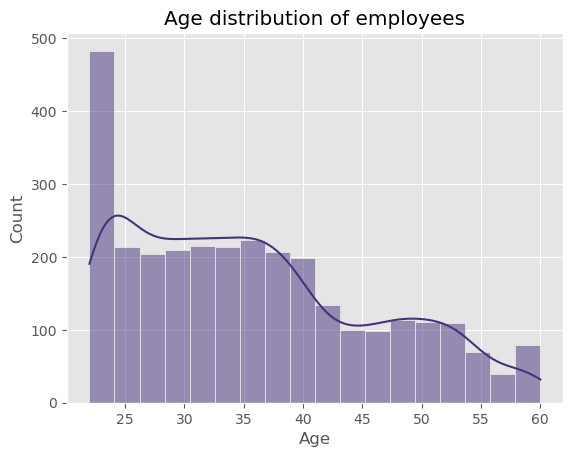

In [100]:
# 5

# What is the age distribution for the empoyees
sns.histplot(data=df, x = "Age",kde = True)
plt.title("Age distribution of employees")
plt.show()

- There is hign number of employees with age < 25 , showing young employees population is much greater than employees with age >50
- Not much difference in the population of employees btw the age of 25-40 

#### **Experience**

In [104]:
# 6 

# What is the highest population of employyes base on the experiece
df["Experience"].value_counts().head(10)

Experience
2     254
1     246
3     186
4     171
6     170
0     159
7     154
5     151
10    135
9     134
Name: count, dtype: int64

- most of the employees in the industry are having a experice from 1- 4 yrs

In [105]:
# 7

# What is the total number of freshers (0-4 yrs of experiece)
df["Experience"].value_counts().head(4).sum()

857

- Out of 3025 employees 857 employees are freshers or with a experice of < 5 yrs.

In [109]:
# 8 

# What is the number of employees with maximum experience 
df["Experience"].value_counts().tail(5)

Experience
25    33
26    25
27    23
28    15
29    10
Name: count, dtype: int64

- The maximum experice employees in the industry is btw 25 - 29 yrs.

In [110]:
# 9

# What is the sum of all the employees with the experiece range of 25 - 29 yrs.
df["Experience"].value_counts().tail(5).sum()

106

- Out of 3025 employees 106 employees are with a experiece range of 25- 29 yrs in the industry.

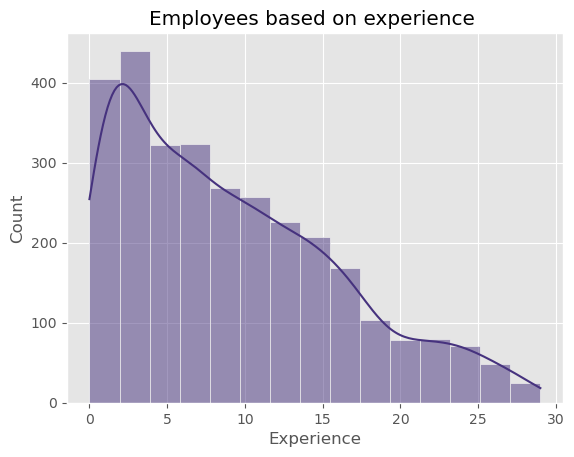

In [111]:
# 10

# What is the distribution of empoyees with Experience
sns.histplot(data=df, x = "Experience",kde = True, bins = 15)
plt.title("Employees based on experience ")
plt.show()

- Right tail plot which means most of the employyes are having much larger experiece level , more than 5 years in the industry.
- The largest population of employees are in btw 0-5 yrs
- Second largest population of employees in btw 5-15 yrs
- There are some employees with much greater experiece ie 25+ yrs

 #### **Physical_Activity_Hr**

In [118]:
# 11

# What is the highest population of employyes based on the physical activities they are invloved in with.
df["Physical_Activity_Hr"].value_counts().head(5)

Physical_Activity_Hr
2.000    125
2.800    123
2.100    121
1.800    119
2.500    118
Name: count, dtype: int64

- majority of the employyes are involved in the physical activities with 2 hrs 

In [122]:
# 12

# What is the number of employees invloved in the maximum phsical activities by hours.
df["Physical_Activity_Hr"].value_counts().sort_values().head(10)

Physical_Activity_Hr
4.700     1
4.900     2
5.000     2
4.800     2
4.500     3
4.600     3
4.300     4
4.400     6
4.200    11
4.100    14
Name: count, dtype: int64

- only few employees are engaged in physical activities of 4 - 5 hrs.

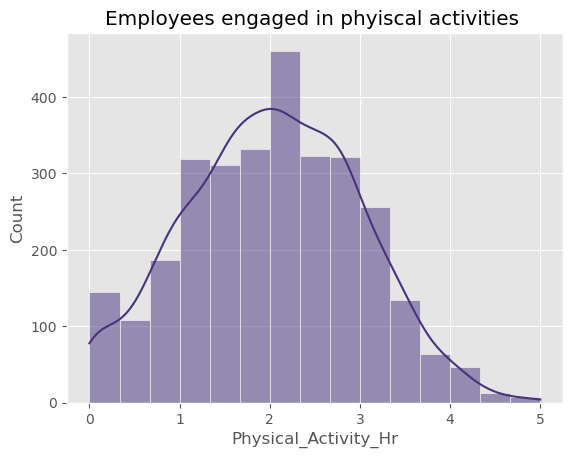

In [123]:
# 13

# What is the distribution for the empoyees with Physical Activity Hr
sns.histplot(data=df, x = "Physical_Activity_Hr",kde = True, bins = 15)
plt.title("Employees engaged in phyiscal activities ")
plt.show()

- Slightly left tail graph shows that most of the employees are engaged in physical activities of less than 2.5 hrs
- Some employees are having more than 3.5 hrs of phyical activities.
- A large number of employees are having phyical activities in btw 2-3 hrs.

#### **Work_Env_Rating**

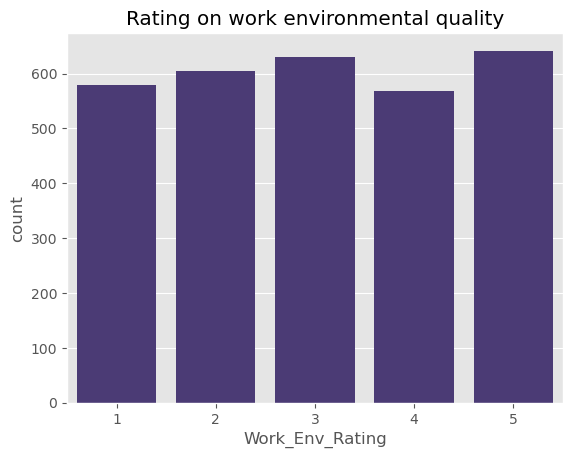

In [172]:
#14

# What is the Work Environment rating for the empoyees
sns.countplot(data=df, x = "Work_Env_Rating")
plt.title("Rating on work environmental quality")
plt.show()

- A large number of employees are having low work environmental rating which shows that a large number of employees don't getting impacted by the work environment 
- employees with 3 rating is almost equal to the employees with a rating of 5 
- some employees get affter by the work environment on a large scale as majority show with a 5 rating

In [125]:
#15

# What is the number of employees based on the work  enviropnment rating
df["Work_Env_Rating"].value_counts()

Work_Env_Rating
5    642
3    631
2    604
1    580
4    568
Name: count, dtype: int64

- A large number of employees are there with a good work environment rating -- 642
- and a large number of employees are there with low work environment rating -- 580

#### **Work_Load**

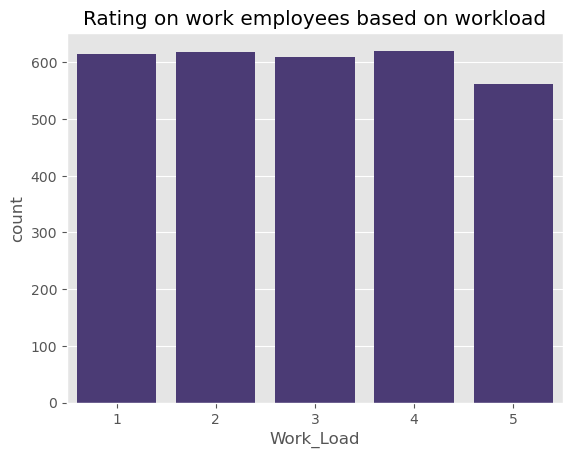

In [171]:
#16

# What is the Work load for the empoyees
sns.countplot(data=df, x = "Work_Load")
plt.title("Rating on work employees based on workload")
plt.show()

- A large number of employees dont perform well under work load.
- Employees who perfrorm good or have a good rating in work load is quite high.
- The plot shows a mix of employees who perform accodringly under workload.

In [130]:
#17

# What is the number of employees based on the work load
df["Work_Load"].value_counts()

Work_Load
4    621
2    618
1    614
3    610
5    562
Name: count, dtype: int64

- Employees with 4 rating under work load is high -- 621 employees
- Employees with 1 rating under work load is high -- 562 employees
- employees with 5 rating under work load is low as compared to 1 rating -- 562

#### *Stress*

In [132]:
# 18 

# What is the number of employees base on the stress level
df["Stress"].value_counts()

Stress
1    1809
2     535
3     426
4     179
5      76
Name: count, dtype: int64

most of the employees are highly streesed out as compared to the employees with low stress level.

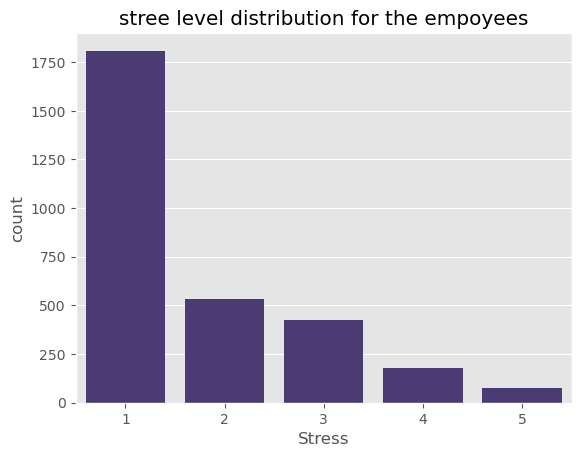

In [170]:
# 19

# What is the stree level distribution for the empoyees
sns.countplot(data=df, x = "Stress")
plt.title("stree level distribution for the empoyees")
plt.show()

- Left tail plot shows that majority of the empoyeees are under stress as compared to the employees with low stress level or the employees who are enjoying their work.

#### *Sleep_Hours*

In [137]:
# 20

# What is the number of employees base on Sleep Hours
df["Sleep_Hours"].value_counts().head (10)

Sleep_Hours
6.700    131
6.800    126
7.100    120
7.000    120
7.200    115
6.900    114
7.300    113
6.200    112
6.600    109
6.500    104
Name: count, dtype: int64

- Most of the employess are having maximum sleep hour of 6 - 7 hrs 

In [140]:
# 21

# What is the number of employees base on Sleep Hours who takes less sleep
df["Sleep_Hours"].value_counts().tail(10)

Sleep_Hours
4.000     5
9.600     5
4.600     4
10.000    4
4.100     3
4.500     2
4.300     2
9.900     2
9.800     1
4.400     1
Name: count, dtype: int64

Few employees are sleep deprived with a sleep hour of 4 

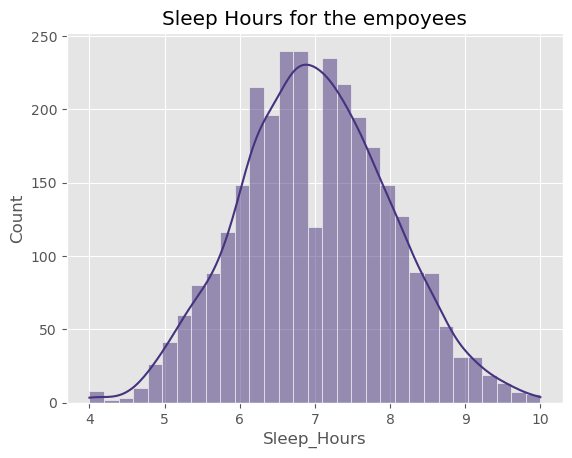

In [141]:
# 22

# What is the stree level distribution for the empoyees
sns.histplot(data=df, x = "Sleep_Hours",kde = True)
plt.title("Sleep Hours for the empoyees")
plt.show()

- Few employees take less sleep as compared to few who sleep more than 10 hours 
- employees who sleep for 7 hours are comparatevely less.

In [144]:
# 23

# What is the skewness of the sleep hour 
df["Sleep_Hours"].skew()

0.0769197593110805

the distribution of data is very close to symetry.or normally distributed
with only a slight tendency toward being right-skewed (positively skewed).

**Commute_Distance**

In [152]:
# 24

# What is the number of employees base on Commute Distance
df["Commute_Distance"].value_counts().sort_values()

Commute_Distance
3      56
25     65
4      69
27     75
28     80
20     85
29     85
26     85
15     86
23     87
11     91
18     91
22     93
14     94
21     95
12     97
16     99
19     99
24     99
17    101
13    102
6     121
7     124
5     131
9     139
8     142
10    150
1     190
2     194
Name: count, dtype: int64

- Most of the employees lives in the range of 1- 2 kms 
- employees who live 10 km far is high
- employees who live in 3-4 km is comparetevely less
- employees who live lives btw 6-9 km is also high 
- there may be some kind of issue with 3 - 4 km

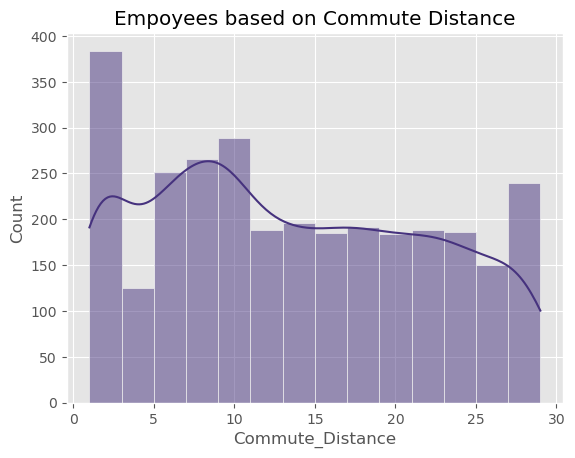

In [154]:
# 25

# What is the Commute Distance distribution for the empoyees
sns.histplot(data=df, x = "Commute_Distance",kde = True)
plt.title("Empoyees based on Commute Distance")
plt.show()

- Most of the employees live nearby the office with a range of 1- 2 kms
- Employees who live far from the office is also high 25-30 kms
- right tail plot shows that most of the employees are live far from the office.

#### *Training_Hr_Yr*

In [157]:
# 26

# What is the Training Hr Yr for the employees 
df["Training_Hr_Yr"].value_counts()

Training_Hr_Yr
21.000    120
10.000    104
10.500     98
21.500     90
20.500     85
         ... 
39.500     11
57.500     10
57.000      9
40.000      9
64.500      5
Name: count, Length: 79, dtype: int64

- Most of the employees (120 )are having a traning hours of 21
- employees (5) have done the tranning for 64 hrs

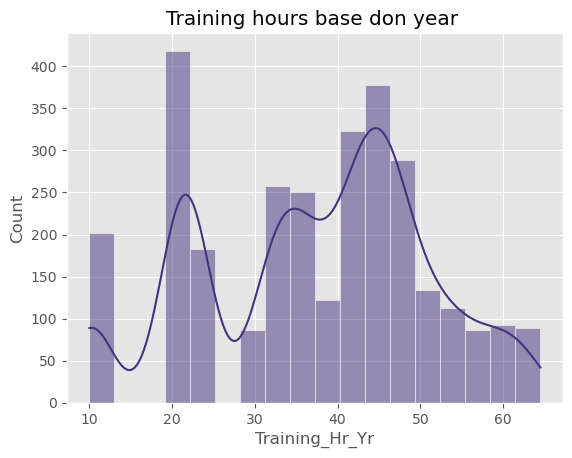

In [161]:
# 27

# What is the Training hours base don year for the empoyees
sns.histplot(data=df, x = "Training_Hr_Yr",kde = True)
plt.title("Training hours base don year ")
plt.show()

- Employees who have done the tranning for 20 ours is quite high.
- Employees who did the traaning btw 40 - 50 hours was high
- Very less number of employees in btw the range of 10-20 hrs of tranning time

#### *Job_Satisfaction*

In [163]:
# 28

# What is the Job Satisfaction rating for the employees 
df["Job_Satisfaction"].value_counts()

Job_Satisfaction
4    1249
3     566
5     516
1     417
2     277
Name: count, dtype: int64

Employees who have a good job satisfaction(1249) is high but not 5 (high) 516 

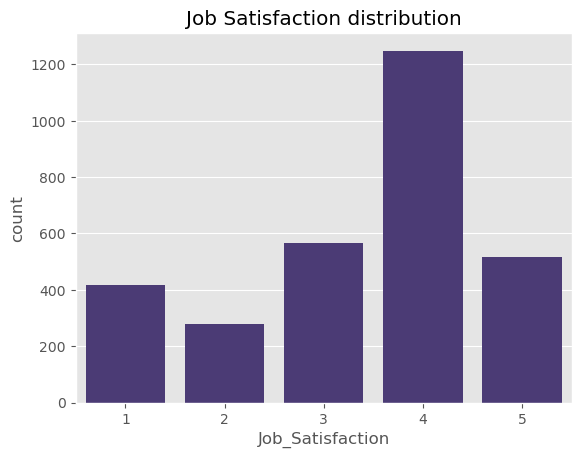

In [169]:
# 29

# What is the Job Satisfaction distribution for the empoyees
sns.countplot(data=df, x = "Job_Satisfaction")
plt.title("Job Satisfaction distribution")
plt.show()

- Emplloyees who are just satisfied with the work is high as compared to the one with low job satisfaction level.
- employees who have a less job satisfaction is also high more than 400

**Univariate analysis** **Count Variables**

#### *Job_Level*

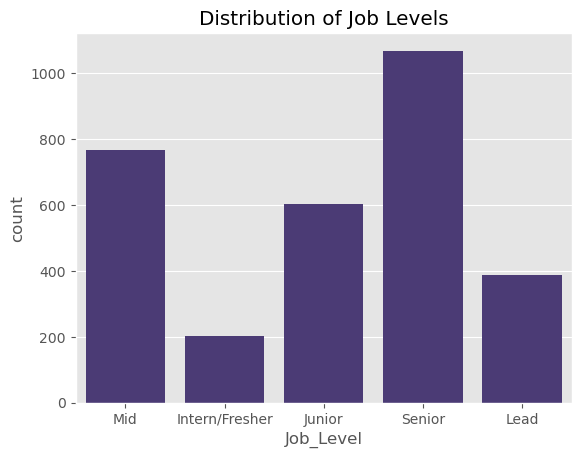

In [174]:
# 30 

# What is the distribution of various job levels.
sns.countplot(data=df, x="Job_Level")
plt.title("Distribution of Job Levels")
plt.show()

- Majority of the employees belongs to the senior level more than 1000 
- The number of interns or freshers are low (approx - 200) as compared to other job levels.

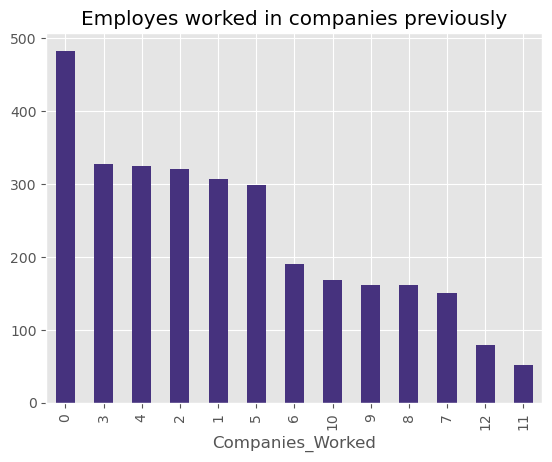

In [195]:
# 31 

# What is the distribution of various Companies Worked
df["Companies_Worked"].value_counts().plot(kind="bar")
plt.title("Employes worked in companies previously")
plt.show()

- A large number of employees have not yet worked in any other comany earlier.
- employyes who have wroked in companies range from (1-4) is between 300 - 340.
- Few wmployees have worked in more than 12 coamnanies work experiece.

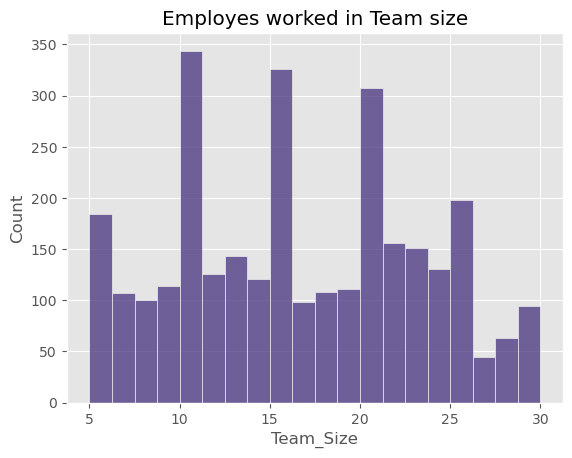

In [196]:
# 32

# What is the distribution of Team Size
sns.histplot(data=df, x="Team_Size", bins=20)
plt.title("Employes worked in Team size")
plt.show()

- employees usually preffer to work on large teams.
- there is a sudden increase in  number hike in the teams like 11,16,21,26

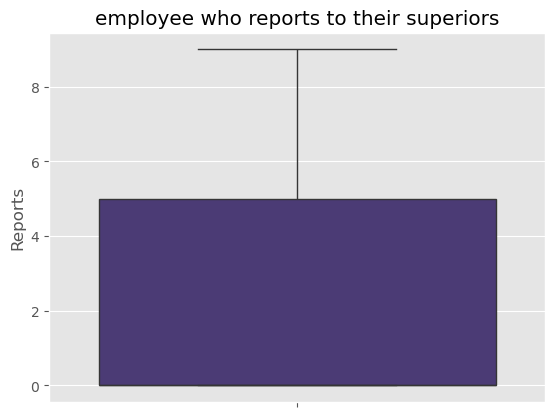

In [200]:
# 33

# What is the distribution of Reports for the employees
sns.boxplot(data=df, y="Reports")
plt.title("employee who reports to their superiors")
plt.show()

**Univariate analysis Catehorical variables**

#### **Gender**

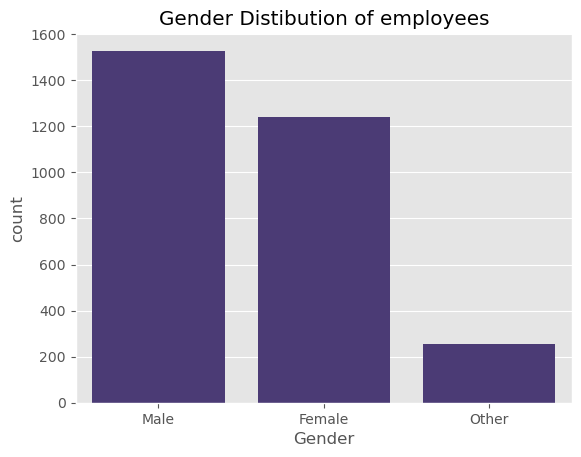

In [201]:
# 34

# What is the gender distribution for the employees 
sns.countplot( x = "Gender", data = df )
plt.title("Gender Distibution of employees")
plt.show()

- Male employees are high as compared to female 
- some employees belongs to LGBTQ

#### **Marita Status**

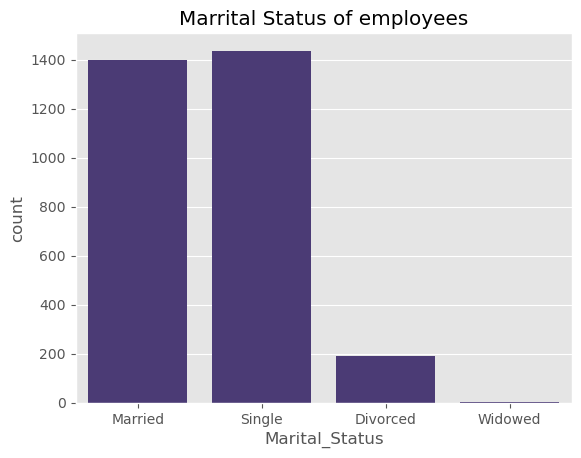

In [202]:
# 35

# What is the Marital Status distribution for the employees 
sns.countplot( x = "Marital_Status", data = df )
plt.title("Marrital Status of employees")
plt.show()

- Most of the employyes are single 
- a alrge number of employees are married
- few widow employees are there and divorced.

#### **Department**

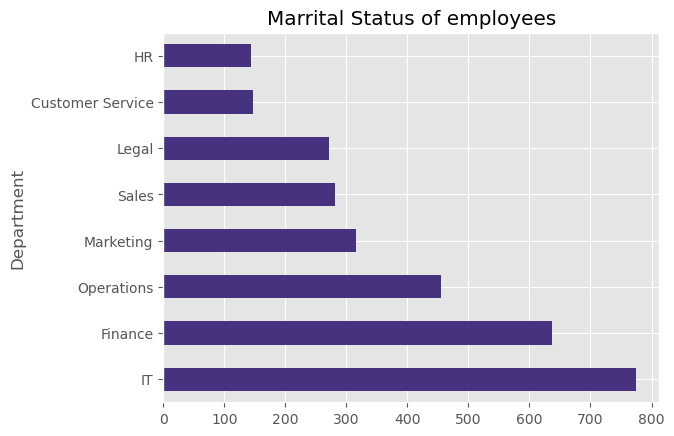

In [203]:
# 36

# What is the Department distribution for the employees 
df["Department"].value_counts().plot(kind="barh")
plt.title("Department of employees")
plt.show()

- Large number of employees are from it sectors , more than 700
- few are from Hr department , more than 100 
- second largest number of employees are from finance sector.

#### **Employement_Type**

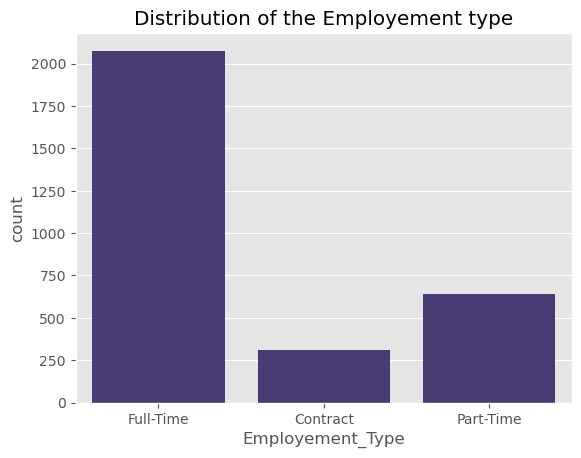

In [204]:
# 37

# What is the Employement Type distribution for the employees 
sns.countplot( x = "Employement_Type", data = df )
plt.title("Distribution of the Employement type")
plt.show()

- Most of the employees are working as a full time employyes (more than 2000)
- Few are on contract basis (near about 300)
- about 700 employees are doing part time 

#### **Commute_Mode**

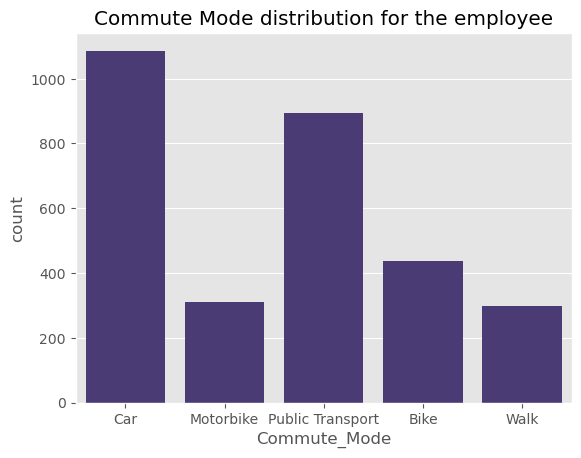

In [205]:
# 38

# What is the Commute Mode distribution for the employees 
sns.countplot( x = "Commute_Mode", data = df )
plt.title("Commute Mode distribution for the employee")
plt.show()

- MOst epmoyees preffer their own cars.
- employee using punlic transport is aslo high.
more than 300 employees come with motorbike which is amlost equal to the employee who preffer to walk.

#### **Edu Level**

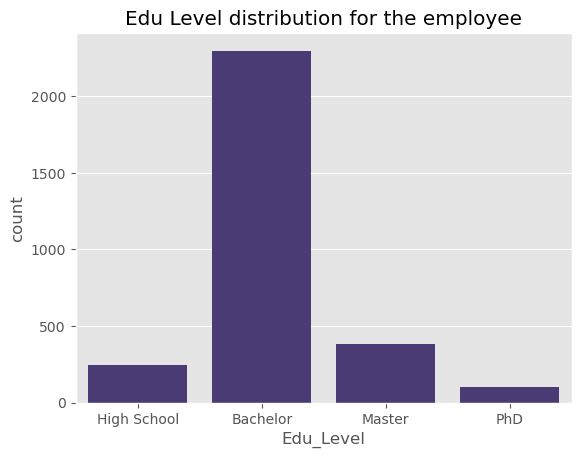

In [206]:
# 39

# What is the Edu Level distribution for the employees 
edu_order = ["High School", "Bachelor", "Master", "PhD"]
sns.countplot(data=df, x="Edu_Level", order=edu_order)
plt.title("Edu Level distribution for the employee")
plt.show()

- Majority of the employees are habing batchelors as their highest degree.
- few are having Phd
- Few are highshool passout

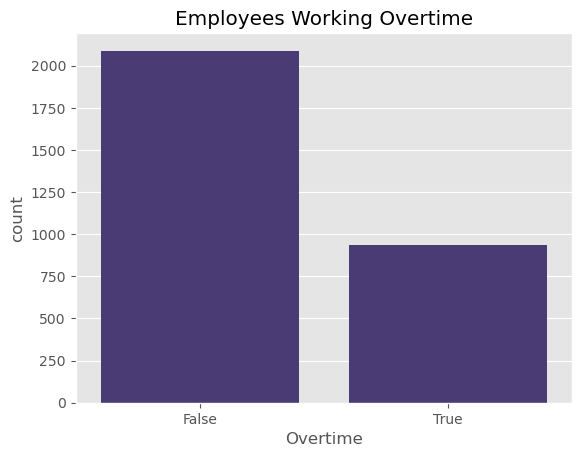

In [207]:
# 40

# What is the  Overtime distribution for the employees 
sns.countplot(data=df, x="Overtime")
plt.title("Employees Working Overtime")
plt.show()

- Only few employees work over time (less than 1000)

### *Bivariate analysis*

**Continous vs Continous**

In [209]:
# 41

# What is the corelation bwtween Age and Experiece 
corr_value = df['Age'].corr(df['Experience'])
print(f'Correlation between Age and Experience: {corr_value}')

Correlation between Age and Experience: 0.6878886798035018


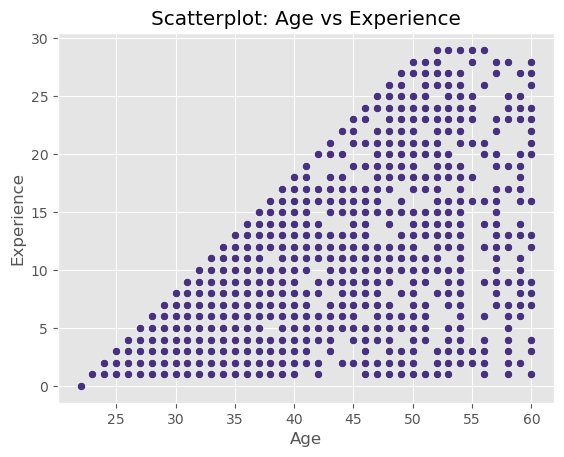

In [210]:
# 42

# What is the relationship between Age and experiece
sns.scatterplot(x='Age', y='Experience', data=df)
plt.title('Scatterplot: Age vs Experience')
plt.show()

In [211]:
# 43

# What is the corelation bwtween Age and Physical_Activity_Hr 
corr_value = df['Age'].corr(df['Physical_Activity_Hr'])
print(f'Correlation between Age and Physical_Activity_Hr: {corr_value}')

Correlation between Age and Physical_Activity_Hr: 0.02815446265396983


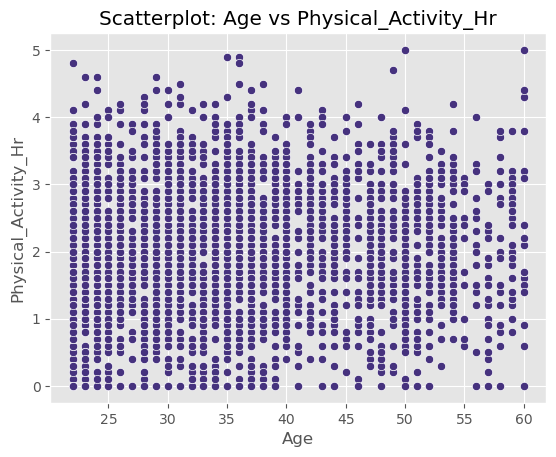

In [213]:
# 44

# What is the relationship between Age and Physical_Activity_Hr
sns.scatterplot(x='Age', y='Physical_Activity_Hr', data=df)
plt.title('Scatterplot: Age vs Physical_Activity_Hr')
plt.show()

In [214]:
# 45

# What is the corelation bwtween Age and Work_Env_Rating 
corr_value = df['Age'].corr(df['Work_Env_Rating'])
print(f'Correlation between Age and Work_Env_Rating: {corr_value}')

Correlation between Age and Work_Env_Rating: 0.0320658694494576


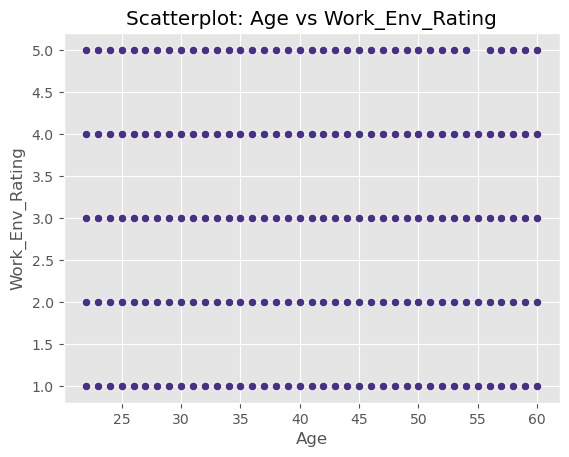

In [215]:
# 46

# What is the relationship between Age and Work_Env_Rating
sns.scatterplot(x='Age', y='Work_Env_Rating', data=df)
plt.title('Scatterplot: Age vs Work_Env_Rating')
plt.show()

In [216]:
# 47

# What is the corelation bwtween Age and Work_Load 
corr_value = df['Age'].corr(df['Work_Load'])
print(f'Correlation between Age and Work_Load: {corr_value}')

Correlation between Age and Work_Load: -0.020236087924855473


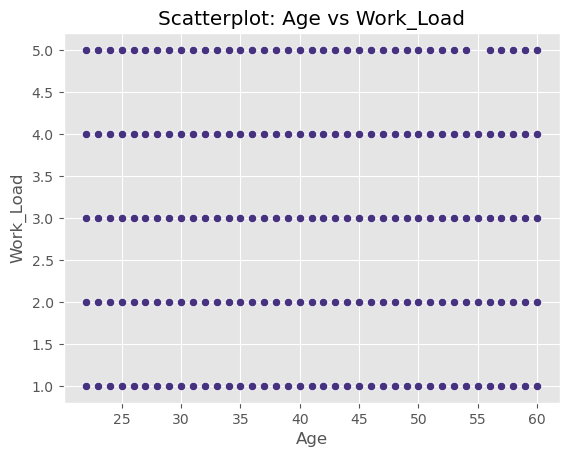

In [217]:
# 48

# What is the relationship between Age and Work_Load
sns.scatterplot(x='Age', y='Work_Load', data=df)
plt.title('Scatterplot: Age vs Work_Load')
plt.show()

In [220]:
# 49

# What is the corelation bwtween Age and Stress 
corr_value = df['Age'].corr(df['Stress'])
print(f'Correlation between Age and Stress: {corr_value}')

Correlation between Age and Stress: -0.01057227145432553


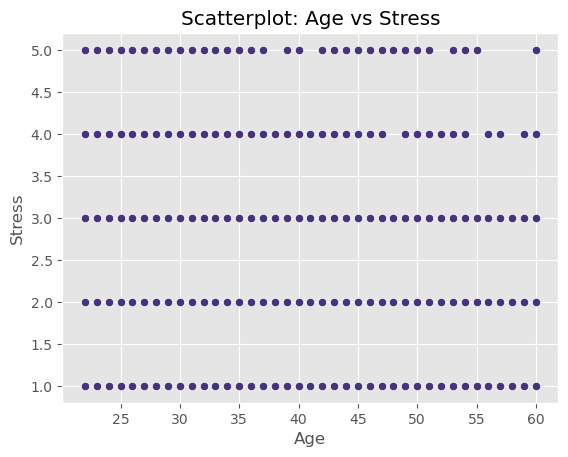

In [221]:
# 50

# What is the relationship between Age and Stress
sns.scatterplot(x='Age', y='Stress', data=df)
plt.title('Scatterplot: Age vs Stress')
plt.show()

In [222]:
# 51

# What is the corelation bwtween Age and Sleep_Hours 
corr_value = df['Age'].corr(df['Sleep_Hours'])
print(f'Correlation between Age and Sleep_Hours: {corr_value}')

Correlation between Age and Sleep_Hours: -0.017378474242471114


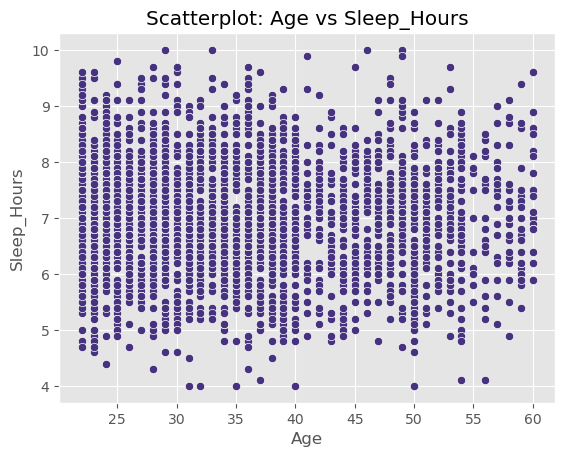

In [223]:
# 52

# What is the relationship between Age and Sleep_Hours
sns.scatterplot(x='Age', y='Sleep_Hours', data=df)
plt.title('Scatterplot: Age vs Sleep_Hours')
plt.show()

In [225]:
# 53

# What is the corelation bwtween Age and Commute_Distance 
corr_value = df['Age'].corr(df['Commute_Distance'])
print(f'Correlation between Age and Commute_Distance: {corr_value}')

Correlation between Age and Commute_Distance: 0.01310946252652604


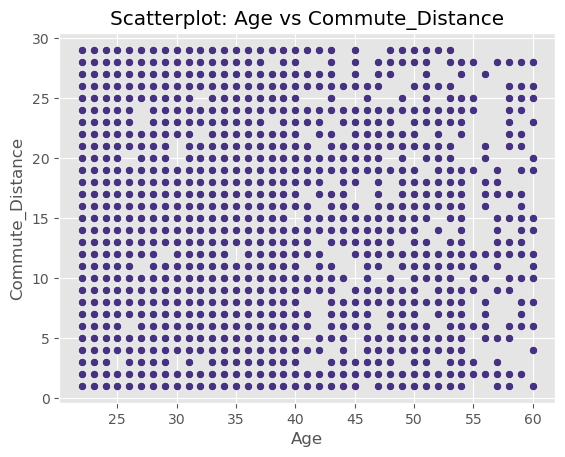

In [227]:
# 54

# What is the relationship between Age and Commute_Distance
sns.scatterplot(x='Age', y='Commute_Distance', data=df)
plt.title('Scatterplot: Age vs Commute_Distance')
plt.show()

In [228]:
# 55

# What is the corelation bwtween Age and Training_Hr_Yr 
corr_value = df['Age'].corr(df['Training_Hr_Yr'])
print(f'Correlation between Age and Training_Hr_Yr: {corr_value}')

Correlation between Age and Training_Hr_Yr: 0.806954820124521


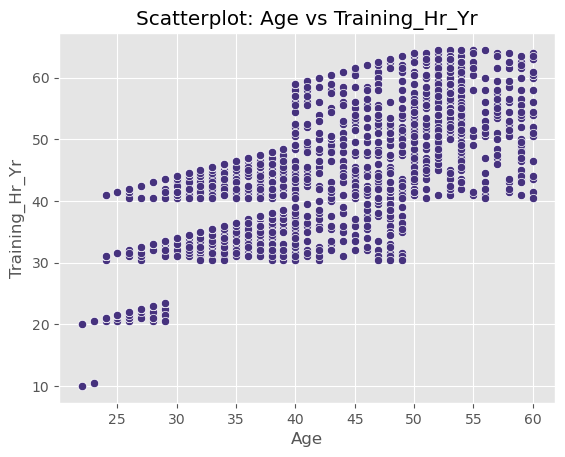

In [229]:
# 56

# What is the relationship between Age and Training_Hr_Yr
sns.scatterplot(x='Age', y='Training_Hr_Yr', data=df)
plt.title('Scatterplot: Age vs Training_Hr_Yr')
plt.show()

In [231]:
# 57

# What is the corelation bwtween Age and Job_Satisfaction 
corr_value = df['Age'].corr(df['Job_Satisfaction'])
print(f'Correlation between Age and Job_Satisfaction: {corr_value}')

Correlation between Age and Job_Satisfaction: -0.00643283574247412


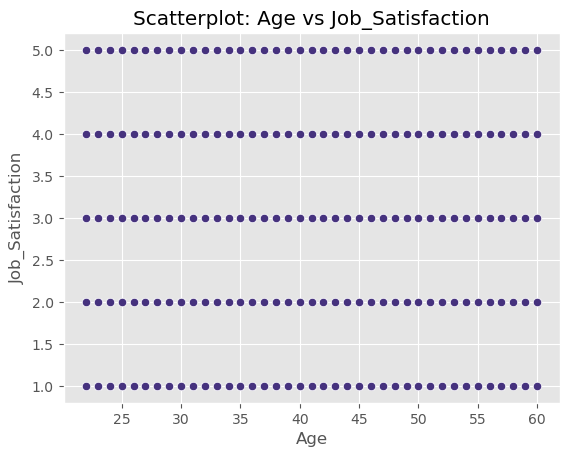

In [232]:
# 58

# What is the relationship between Age and Job_Satisfaction
sns.scatterplot(x='Age', y='Job_Satisfaction', data=df)
plt.title('Scatterplot: Age vs Job_Satisfaction')
plt.show()

In [233]:
# 59

# What is the corelation btw Experience and Physical_Activity_Hr 
corr_value = df['Experience'].corr(df['Physical_Activity_Hr'])
print(f'Correlation between Experience and Physical_Activity_Hr: {corr_value}')

Correlation between Experience and Physical_Activity_Hr: -0.009669772647087536


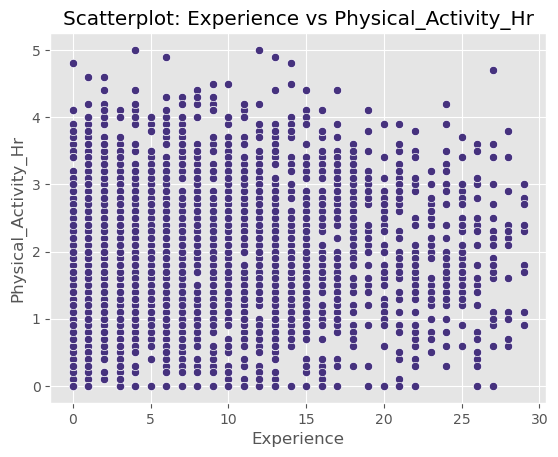

In [234]:
# 60

# What is the relationship between Experience and Physical_Activity_Hr
sns.scatterplot(x='Experience', y='Physical_Activity_Hr', data=df)
plt.title('Scatterplot: Experience vs Physical_Activity_Hr')
plt.show()

In [235]:
# 61

# What is the corelation btw Experience and Work_Env_Rating 
corr_value = df['Experience'].corr(df['Work_Env_Rating'])
print(f'Correlation between Experience and Work_Env_Rating: {corr_value}')

Correlation between Experience and Work_Env_Rating: 0.00639927184065404


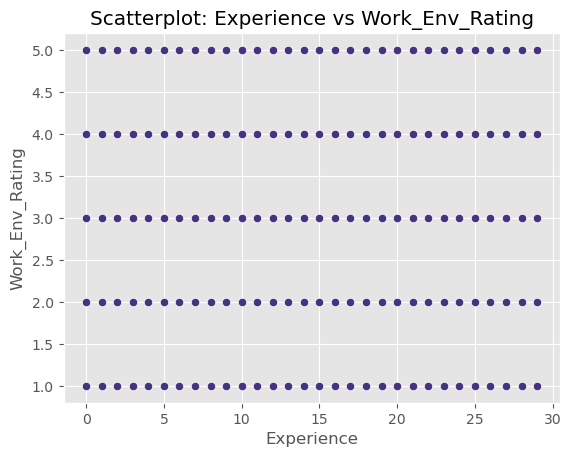

In [236]:
# 62

# What is the relationship between Experience and Work_Env_Rating
sns.scatterplot(x='Experience', y='Work_Env_Rating', data=df)
plt.title('Scatterplot: Experience vs Work_Env_Rating')
plt.show()

In [237]:
# 63

# What is the corelation btw Experience and Work_Load 
corr_value = df['Experience'].corr(df['Work_Load'])
print(f'Correlation between Experience and Work_Load: {corr_value}')

Correlation between Experience and Work_Load: -0.0016896976181923447


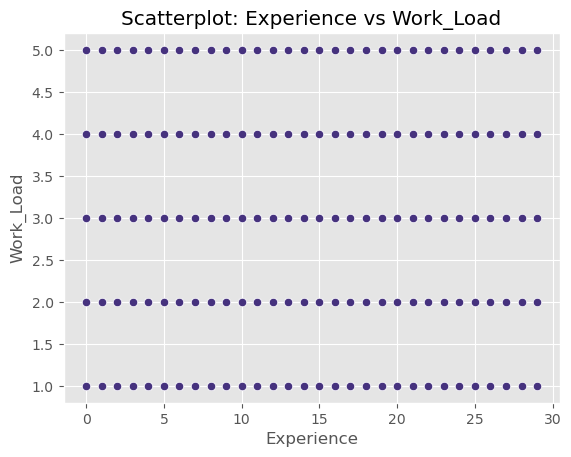

In [239]:
# 64

# What is the relationship between Experience and Work_Load
sns.scatterplot(x='Experience', y='Work_Load', data=df)
plt.title('Scatterplot: Experience vs Work_Load')
plt.show()

In [240]:
# 65

# What is the corelation btw Experience and Stress 
corr_value = df['Experience'].corr(df['Stress'])
print(f'Correlation between Experience and Stress: {corr_value}')

Correlation between Experience and Stress: -0.003344427355758946


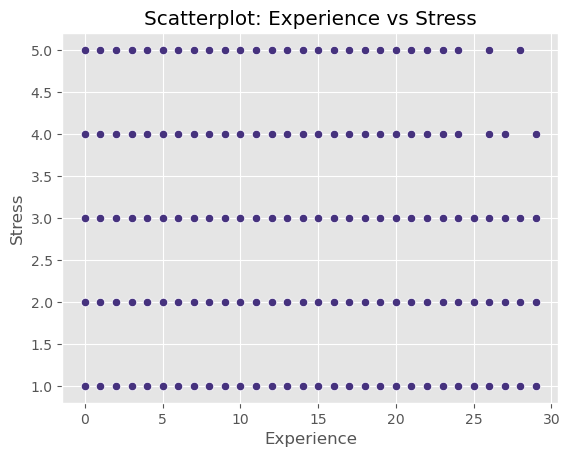

In [241]:
# 66

# What is the relationship between Experience and Stress
sns.scatterplot(x='Experience', y='Stress', data=df)
plt.title('Scatterplot: Experience vs Stress')
plt.show()

In [242]:
# 67

# What is the corelation btw Experience and Sleep_Hours 
corr_value = df['Experience'].corr(df['Sleep_Hours'])
print(f'Correlation between Experience and Sleep_Hours: {corr_value}')

Correlation between Experience and Sleep_Hours: -0.019494811114099876


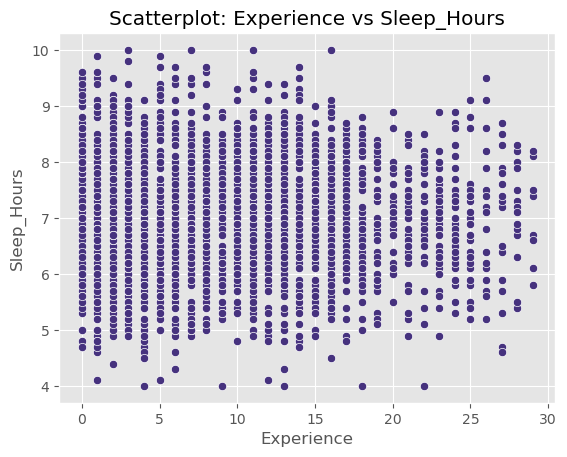

In [243]:
# 68

# What is the relationship between Experience and Sleep_Hours
sns.scatterplot(x='Experience', y='Sleep_Hours', data=df)
plt.title('Scatterplot: Experience vs Sleep_Hours')
plt.show()

In [244]:
# 69

# What is the corelation btw Experience and Commute_Distance 
corr_value = df['Experience'].corr(df['Commute_Distance'])
print(f'Correlation between Experience and Commute_Distance: {corr_value}')

Correlation between Experience and Commute_Distance: 0.004948249952056841


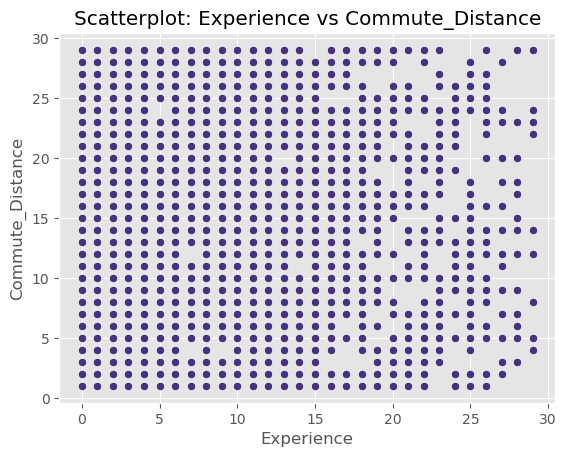

In [246]:
# 70

# What is the relationship between Experience and Commute_Distance
sns.scatterplot(x='Experience', y='Commute_Distance', data=df)
plt.title('Scatterplot: Experience vs Commute_Distance')
plt.show()

In [247]:
# 71

# What is the corelation btw Experience and Training_Hr_Yr 
corr_value = df['Experience'].corr(df['Training_Hr_Yr'])
print(f'Correlation between Experience and Training_Hr_Yr: {corr_value}')

Correlation between Experience and Training_Hr_Yr: 0.7421367063506984


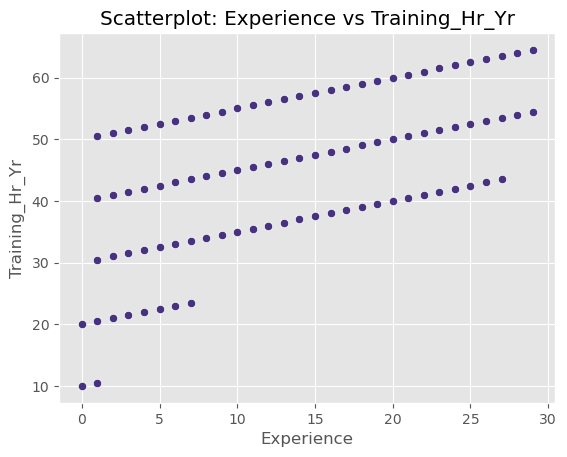

In [248]:
# 72

# What is the relationship between Experience and Training_Hr_Yr
sns.scatterplot(x='Experience', y='Training_Hr_Yr', data=df)
plt.title('Scatterplot: Experience vs Training_Hr_Yr')
plt.show()

In [249]:
# 73

# What is the corelation btw Experience and Job_Satisfaction 
corr_value = df['Experience'].corr(df['Job_Satisfaction'])
print(f'Correlation between Experience and Job_Satisfaction: {corr_value}')

Correlation between Experience and Job_Satisfaction: -0.011893440307596162


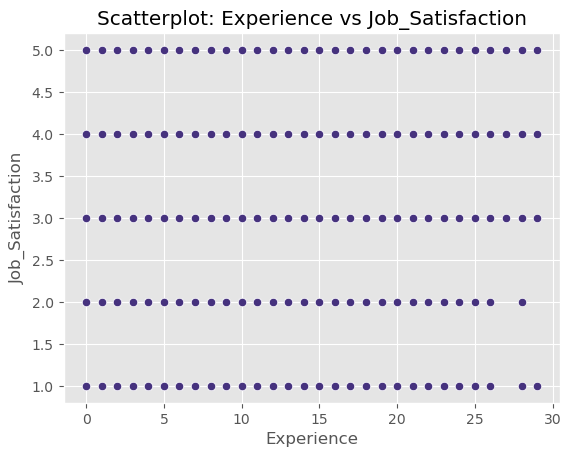

In [250]:
# 74

# What is the relationship between Experience and Job_Satisfaction
sns.scatterplot(x='Experience', y='Job_Satisfaction', data=df)
plt.title('Scatterplot: Experience vs Job_Satisfaction')
plt.show()

In [251]:
# 75

# What is the corelation btw Physical_Activity_Hr and Work_Env_Rating 
corr_value = df['Physical_Activity_Hr'].corr(df['Work_Env_Rating'])
print(f'Correlation between Physical_Activity_Hr and Work_Env_Rating: {corr_value}')

Correlation between Physical_Activity_Hr and Work_Env_Rating: -0.01086152315396979


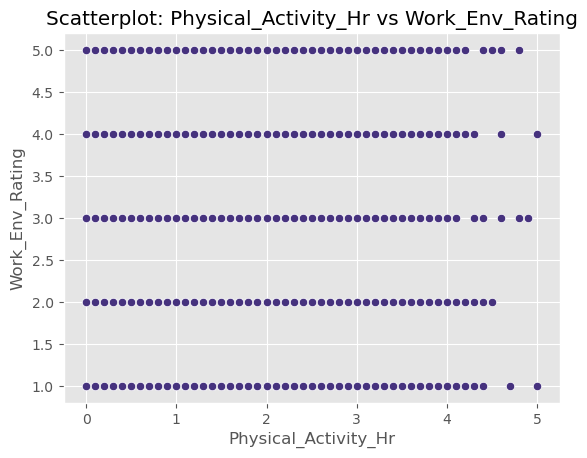

In [252]:
# 76

# What is the relationship between Physical_Activity_Hr and Work_Env_Rating
sns.scatterplot(x='Physical_Activity_Hr', y='Work_Env_Rating', data=df)
plt.title('Scatterplot: Physical_Activity_Hr vs Work_Env_Rating')
plt.show()

In [253]:
# 77

# What is the corelation btw Physical_Activity_Hr and Work_Load 
corr_value = df['Physical_Activity_Hr'].corr(df['Work_Load'])
print(f'Correlation between Physical_Activity_Hr and Work_Load: {corr_value}')

Correlation between Physical_Activity_Hr and Work_Load: 0.00837594510294186


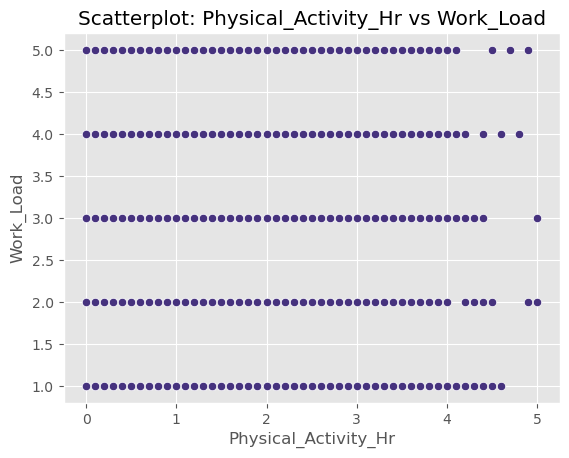

In [254]:
# 78

# What is the relationship between Physical_Activity_Hr and Work_Load
sns.scatterplot(x='Physical_Activity_Hr', y='Work_Load', data=df)
plt.title('Scatterplot: Physical_Activity_Hr vs Work_Load')
plt.show()

In [255]:
# 79

# What is the corelation btw Physical_Activity_Hr and Stress 
corr_value = df['Physical_Activity_Hr'].corr(df['Stress'])
print(f'Correlation between Physical_Activity_Hr and Stress: {corr_value}')

Correlation between Physical_Activity_Hr and Stress: -0.011802598172823473


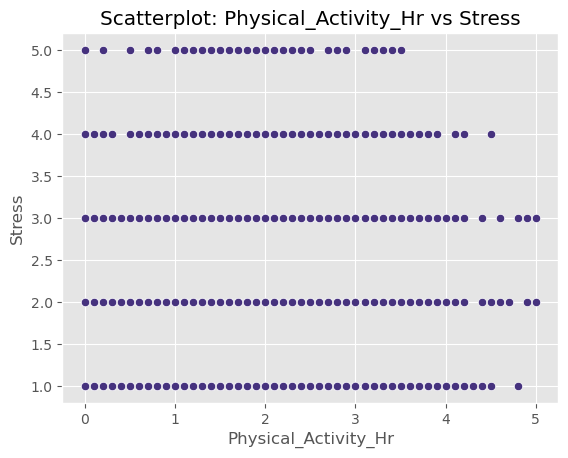

In [256]:
# 80

# What is the relationship between Physical_Activity_Hr and Stress
sns.scatterplot(x='Physical_Activity_Hr', y='Stress', data=df)
plt.title('Scatterplot: Physical_Activity_Hr vs Stress')
plt.show()

In [257]:
# 81

# What is the corelation btw Physical_Activity_Hr and Sleep_Hours 
corr_value = df['Physical_Activity_Hr'].corr(df['Sleep_Hours'])
print(f'Correlation between Physical_Activity_Hr and Sleep_Hours: {corr_value}')

Correlation between Physical_Activity_Hr and Sleep_Hours: -0.009899752117225647


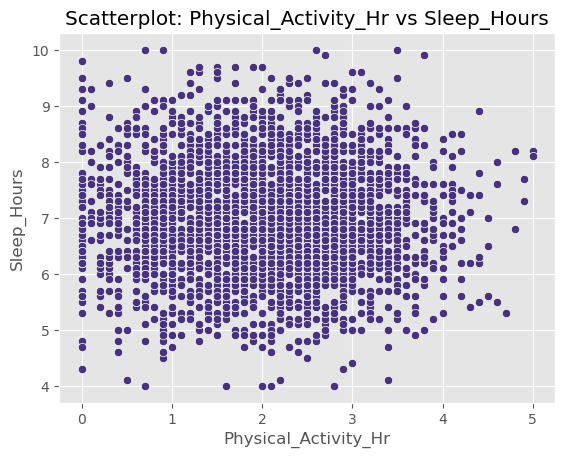

In [259]:
# 82

# What is the relationship between Physical_Activity_Hr and Sleep_Hours
sns.scatterplot(x='Physical_Activity_Hr', y='Sleep_Hours', data=df)
plt.title('Scatterplot: Physical_Activity_Hr vs Sleep_Hours')
plt.show()

In [260]:
# 83

# What is the corelation btw Physical_Activity_Hr and Commute_Distance 
corr_value = df['Physical_Activity_Hr'].corr(df['Commute_Distance'])
print(f'Correlation between Physical_Activity_Hr and Commute_Distance: {corr_value}')

Correlation between Physical_Activity_Hr and Commute_Distance: 0.009971885934779483


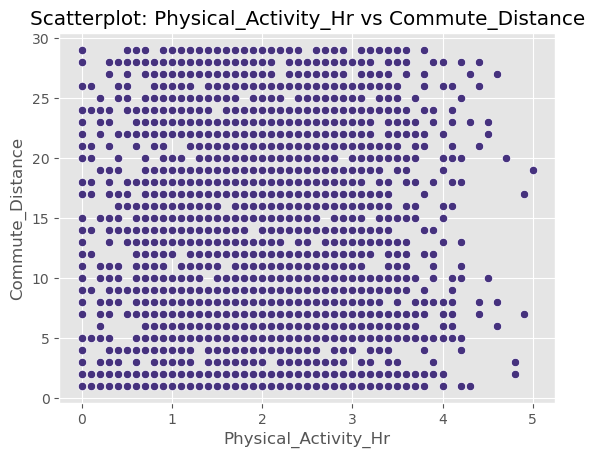

In [261]:
# 84

# What is the relationship between Physical_Activity_Hr and Commute_Distance
sns.scatterplot(x='Physical_Activity_Hr', y='Commute_Distance', data=df)
plt.title('Scatterplot: Physical_Activity_Hr vs Commute_Distance')
plt.show()

In [262]:
# 85

# What is the corelation btw Physical_Activity_Hr and Training_Hr_Yr 
corr_value = df['Physical_Activity_Hr'].corr(df['Training_Hr_Yr'])
print(f'Correlation between Physical_Activity_Hr and Training_Hr_Yr: {corr_value}')

Correlation between Physical_Activity_Hr and Training_Hr_Yr: 0.015206007142299601


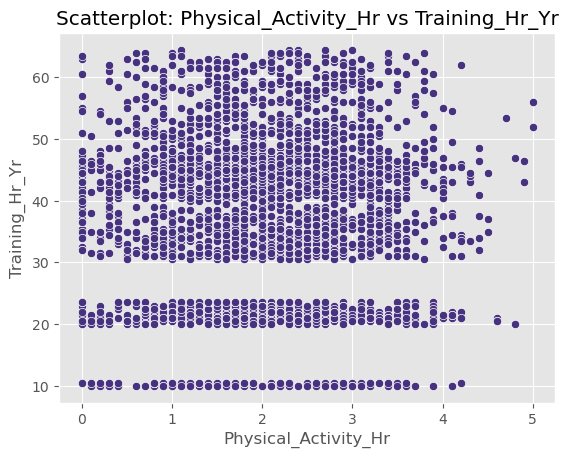

In [264]:
# 86

# What is the relationship between Physical_Activity_Hr and Training_Hr_Yr
sns.scatterplot(x='Physical_Activity_Hr', y='Training_Hr_Yr', data=df)
plt.title('Scatterplot: Physical_Activity_Hr vs Training_Hr_Yr')
plt.show()

In [265]:
# 87

# What is the corelation btw Physical_Activity_Hr and Job_Satisfaction 
corr_value = df['Physical_Activity_Hr'].corr(df['Job_Satisfaction'])
print(f'Correlation between Physical_Activity_Hr and Job_Satisfaction: {corr_value}')

Correlation between Physical_Activity_Hr and Job_Satisfaction: -0.011148742994580551


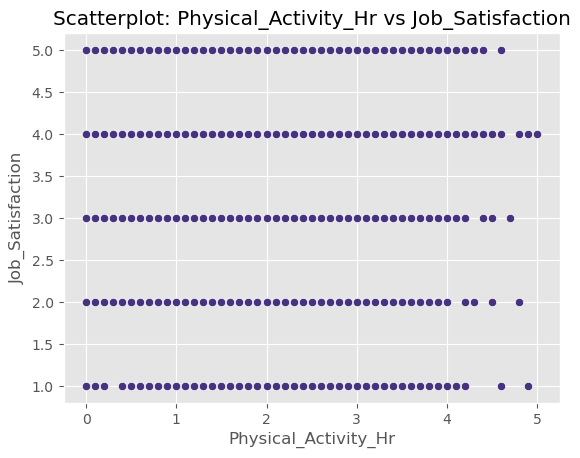

In [266]:
# 88

# What is the relationship between Physical_Activity_Hr and Job_Satisfaction
sns.scatterplot(x='Physical_Activity_Hr', y='Job_Satisfaction', data=df)
plt.title('Scatterplot: Physical_Activity_Hr vs Job_Satisfaction')
plt.show()

In [267]:
# 89

# What is the corelation btw Work_Env_Rating and Work_Load 
corr_value = df['Work_Env_Rating'].corr(df['Work_Load'])
print(f'Correlation between Work_Env_Rating and Work_Load: {corr_value}')

Correlation between Work_Env_Rating and Work_Load: 0.00032312483612127686


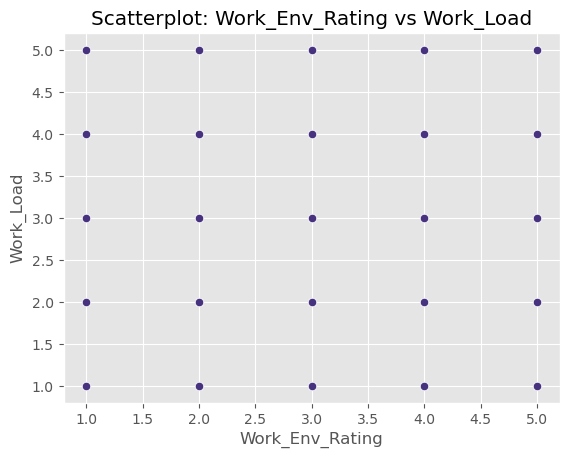

In [268]:
# 90

# What is the relationship between Work_Env_Rating and Work_Load
sns.scatterplot(x='Work_Env_Rating', y='Work_Load', data=df)
plt.title('Scatterplot: Work_Env_Rating vs Work_Load')
plt.show()

In [269]:
# 91

# What is the corelation btw Work_Env_Rating and Stress 
corr_value = df['Work_Env_Rating'].corr(df['Stress'])
print(f'Correlation between Work_Env_Rating and Stress: {corr_value}')

Correlation between Work_Env_Rating and Stress: -0.013790642926555689


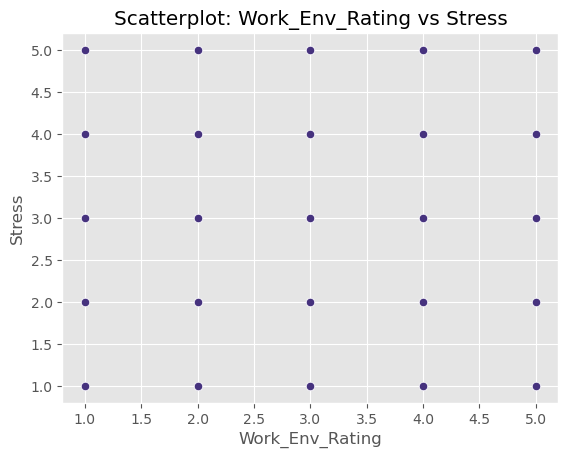

In [270]:
# 92

# What is the relationship between Work_Env_Rating and Stress
sns.scatterplot(x='Work_Env_Rating', y='Stress', data=df)
plt.title('Scatterplot: Work_Env_Rating vs Stress')
plt.show()

In [271]:
# 93

# What is the corelation btw Work_Env_Rating and Sleep_Hours 
corr_value = df['Work_Env_Rating'].corr(df['Sleep_Hours'])
print(f'Correlation between Work_Env_Rating and Sleep_Hours: {corr_value}')

Correlation between Work_Env_Rating and Sleep_Hours: -0.019231267400349427


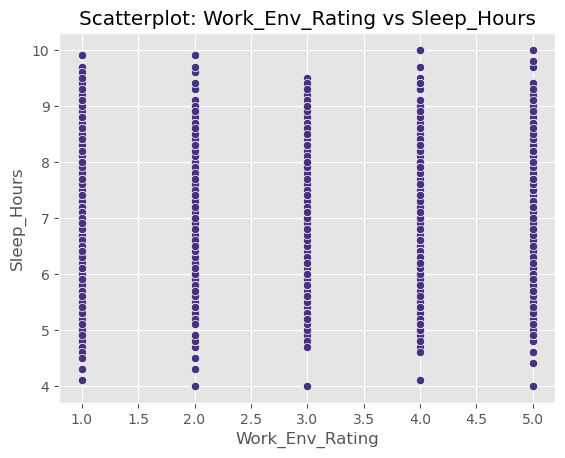

In [272]:
# 94

# What is the relationship between Work_Env_Rating and Sleep_Hours
sns.scatterplot(x='Work_Env_Rating', y='Sleep_Hours', data=df)
plt.title('Scatterplot: Work_Env_Rating vs Sleep_Hours')
plt.show()

In [273]:
# 95

# What is the corelation btw Work_Env_Rating and Commute_Distance 
corr_value = df['Work_Env_Rating'].corr(df['Commute_Distance'])
print(f'Correlation between Work_Env_Rating and Commute_Distance: {corr_value}')

Correlation between Work_Env_Rating and Commute_Distance: -0.03152397440861403


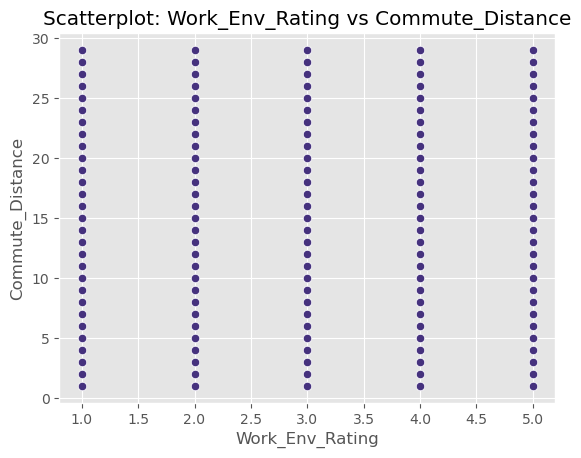

In [274]:
# 96

# What is the relationship between Work_Env_Rating and Commute_Distance
sns.scatterplot(x='Work_Env_Rating', y='Commute_Distance', data=df)
plt.title('Scatterplot: Work_Env_Rating vs Commute_Distance')
plt.show()

In [275]:
# 97

# What is the corelation btw Work_Env_Rating and Training_Hr_Yr 
corr_value = df['Work_Env_Rating'].corr(df['Training_Hr_Yr'])
print(f'Correlation between Work_Env_Rating and Training_Hr_Yr: {corr_value}')

Correlation between Work_Env_Rating and Training_Hr_Yr: 0.021074499758603902


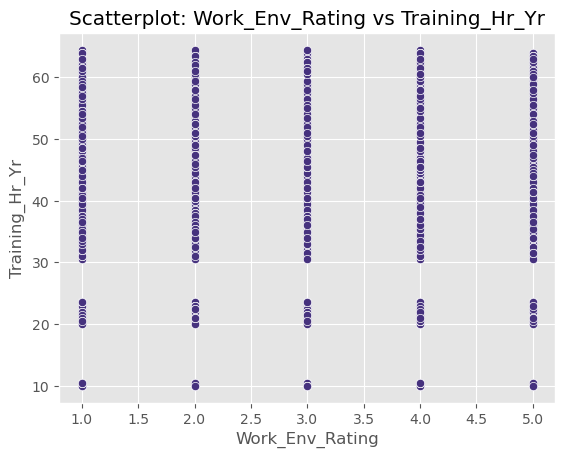

In [277]:
# 98

# What is the relationship between Work_Env_Rating and Training_Hr_Yr
sns.scatterplot(x='Work_Env_Rating', y='Training_Hr_Yr', data=df)
plt.title('Scatterplot: Work_Env_Rating vs Training_Hr_Yr')
plt.show()

In [278]:
# 99

# What is the corelation btw Work_Env_Rating and Job_Satisfaction 
corr_value = df['Work_Env_Rating'].corr(df['Job_Satisfaction'])
print(f'Correlation between Work_Env_Rating and Job_Satisfaction: {corr_value}')

Correlation between Work_Env_Rating and Job_Satisfaction: 0.24873001927225805


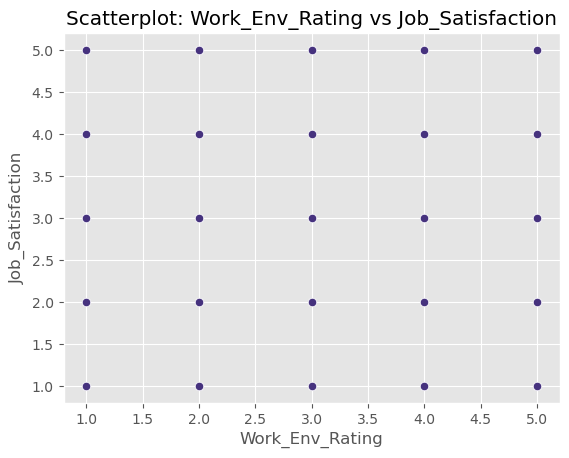

In [276]:
# 100

# What is the relationship between Work_Env_Rating and Job_Satisfaction
sns.scatterplot(x='Work_Env_Rating', y='Job_Satisfaction', data=df)
plt.title('Scatterplot: Work_Env_Rating vs Job_Satisfaction')
plt.show()

In [279]:
# 101

# What is the corelation btw Work_Load and Stress 
corr_value = df['Work_Load'].corr(df['Stress'])
print(f'Correlation between Work_Load and Stress: {corr_value}')

Correlation between Work_Load and Stress: 0.009619956273341541


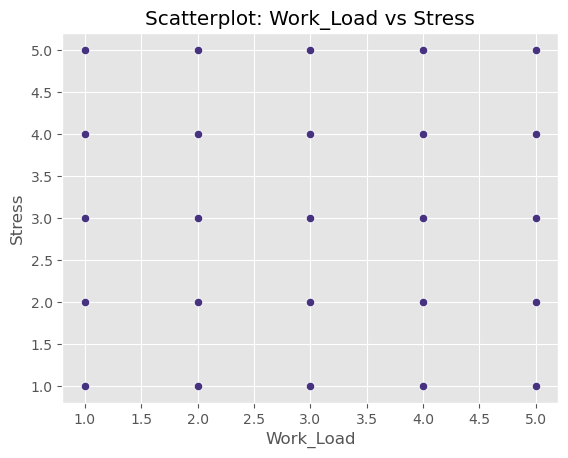

In [281]:
# 102

# What is the relationship between Work_Load and Stress
sns.scatterplot(x='Work_Load', y='Stress', data=df)
plt.title('Scatterplot: Work_Load vs Stress')
plt.show()

In [282]:
# 103

# What is the corelation btw Work_Load and Sleep_Hours 
corr_value = df['Work_Load'].corr(df['Sleep_Hours'])
print(f'Correlation between Work_Load and Sleep_Hours: {corr_value}')

Correlation between Work_Load and Sleep_Hours: 0.015909396415761994


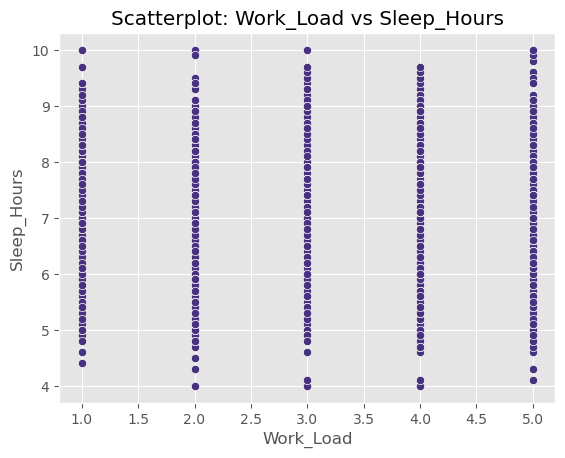

In [283]:
# 104

# What is the relationship between Work_Load and Sleep_Hours
sns.scatterplot(x='Work_Load', y='Sleep_Hours', data=df)
plt.title('Scatterplot: Work_Load vs Sleep_Hours')
plt.show()

In [285]:
# 105

# What is the corelation btw Work_Load and Commute_Distance 
corr_value = df['Work_Load'].corr(df['Commute_Distance'])
print(f'Correlation between Work_Load and Commute_Distance: {corr_value}')

Correlation between Work_Load and Commute_Distance: -0.015434421051337605


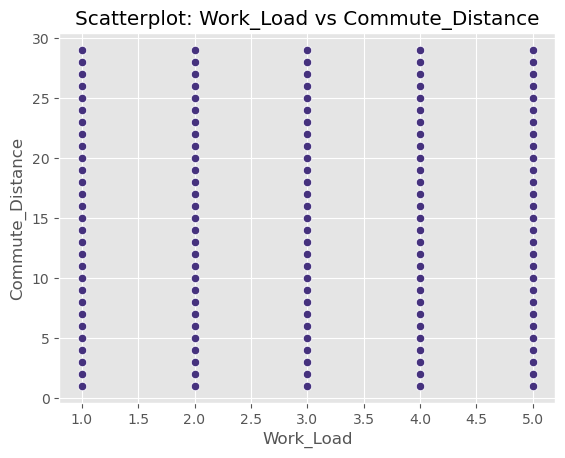

In [287]:
# 106

# What is the relationship between Work_Load and Commute_Distance
sns.scatterplot(x='Work_Load', y='Commute_Distance', data=df)
plt.title('Scatterplot: Work_Load vs Commute_Distance')
plt.show()

In [288]:
# 107

# What is the corelation btw Work_Load and Training_Hr_Yr 
corr_value = df['Work_Load'].corr(df['Training_Hr_Yr'])
print(f'Correlation between Work_Load and Training_Hr_Yr: {corr_value}')

Correlation between Work_Load and Training_Hr_Yr: -0.0011568962549760521


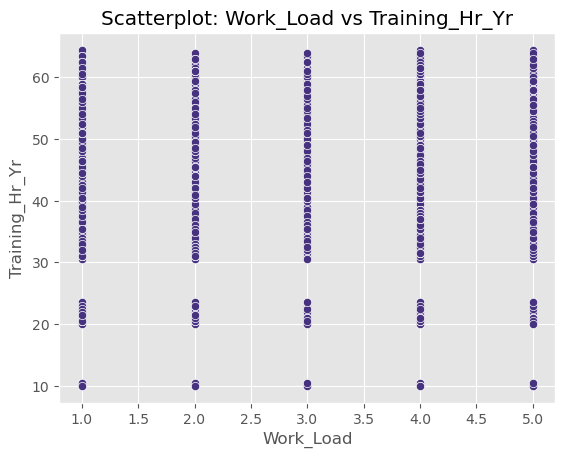

In [289]:
# 108

# What is the relationship between Work_Load and Training_Hr_Yr
sns.scatterplot(x='Work_Load', y='Training_Hr_Yr', data=df)
plt.title('Scatterplot: Work_Load vs Training_Hr_Yr')
plt.show()

In [290]:
# 109

# What is the corelation btw Work_Load and Job_Satisfaction 
corr_value = df['Work_Load'].corr(df['Job_Satisfaction'])
print(f'Correlation between Work_Load and Job_Satisfaction: {corr_value}')

Correlation between Work_Load and Job_Satisfaction: -0.25342554507079773


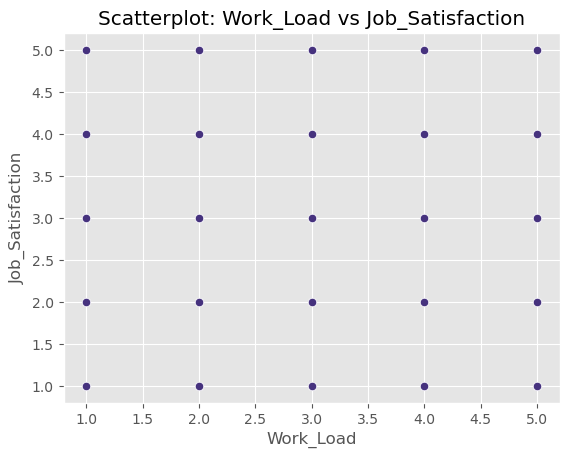

In [291]:
# 110

# What is the relationship between Work_Load and Job_Satisfaction
sns.scatterplot(x='Work_Load', y='Job_Satisfaction', data=df)
plt.title('Scatterplot: Work_Load vs Job_Satisfaction')
plt.show()

In [293]:
# 111

# What is the corelation btw Stress and Sleep_Hours 
corr_value = df['Stress'].corr(df['Sleep_Hours'])
print(f'Correlation between Stress and Sleep_Hours: {corr_value}')

Correlation between Stress and Sleep_Hours: 0.011890665714817018


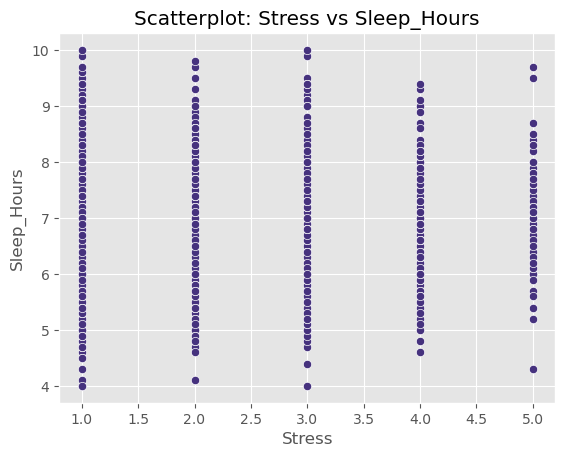

In [294]:
# 112

# What is the relationship between Stress and Sleep_Hours
sns.scatterplot(x='Stress', y='Sleep_Hours', data=df)
plt.title('Scatterplot: Stress vs Sleep_Hours')
plt.show()

In [295]:
# 113

# What is the corelation btw Stress and Commute_Distance 
corr_value = df['Stress'].corr(df['Commute_Distance'])
print(f'Correlation between Stress and Commute_Distance: {corr_value}')

Correlation between Stress and Commute_Distance: -0.005568328665053195


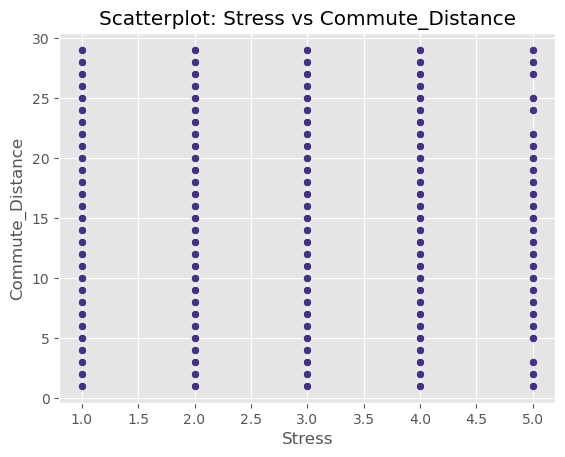

In [296]:
# 114

# What is the relationship between Stress and Commute_Distance
sns.scatterplot(x='Stress', y='Commute_Distance', data=df)
plt.title('Scatterplot: Stress vs Commute_Distance')
plt.show()

In [297]:
# 115

# What is the corelation btw Stress and Training_Hr_Yr 
corr_value = df['Stress'].corr(df['Training_Hr_Yr'])
print(f'Correlation between Stress and Training_Hr_Yr: {corr_value}')

Correlation between Stress and Training_Hr_Yr: 0.010348190586355397


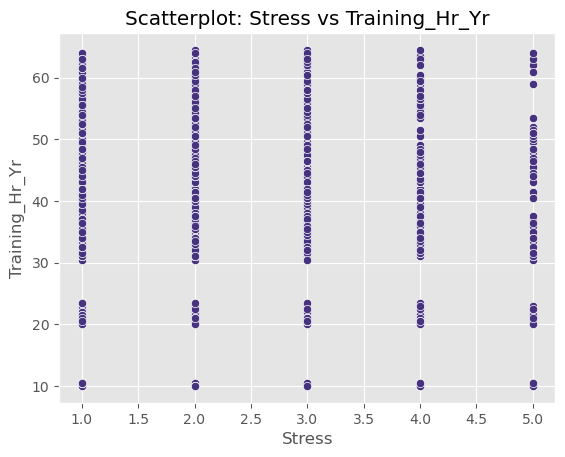

In [298]:
# 116

# What is the relationship between Stress and Training_Hr_Yr
sns.scatterplot(x='Stress', y='Training_Hr_Yr', data=df)
plt.title('Scatterplot: Stress vs Training_Hr_Yr')
plt.show()

In [299]:
# 117

# What is the corelation btw Stress and Job_Satisfaction 
corr_value = df['Stress'].corr(df['Job_Satisfaction'])
print(f'Correlation between Stress and Job_Satisfaction: {corr_value}')

Correlation between Stress and Job_Satisfaction: -0.21438269956302386


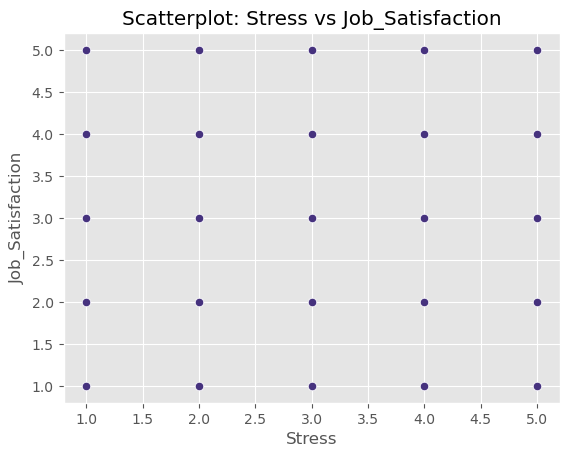

In [301]:
# 118

# What is the relationship between Stress and Job_Satisfaction
sns.scatterplot(x='Stress', y='Job_Satisfaction', data=df)
plt.title('Scatterplot: Stress vs Job_Satisfaction')
plt.show()

In [302]:
# 119

# What is the corelation btw Sleep_Hours and Commute_Distance 
corr_value = df['Sleep_Hours'].corr(df['Commute_Distance'])
print(f'Correlation between Sleep_Hours and Commute_Distance: {corr_value}')

Correlation between Sleep_Hours and Commute_Distance: 0.03610062313731221


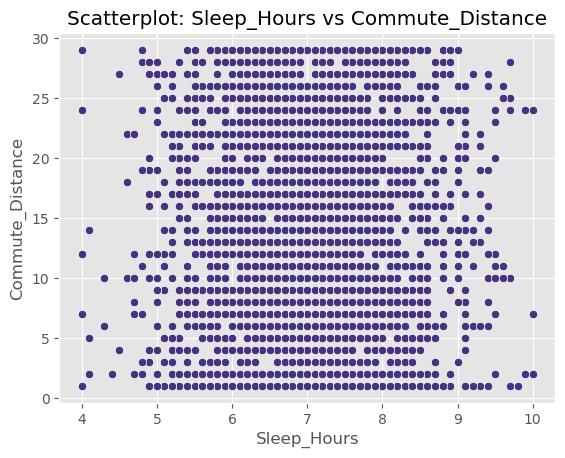

In [304]:
# 120

# What is the relationship between Sleep_Hours and Commute_Distance
sns.scatterplot(x='Sleep_Hours', y='Commute_Distance', data=df)
plt.title('Scatterplot: Sleep_Hours vs Commute_Distance')
plt.show()

In [305]:
# 121

# What is the corelation btw Sleep_Hours and Training_Hr_Yr 
corr_value = df['Sleep_Hours'].corr(df['Training_Hr_Yr'])
print(f'Correlation between Sleep_Hours and Training_Hr_Yr: {corr_value}')

Correlation between Sleep_Hours and Training_Hr_Yr: -0.008409765644969988


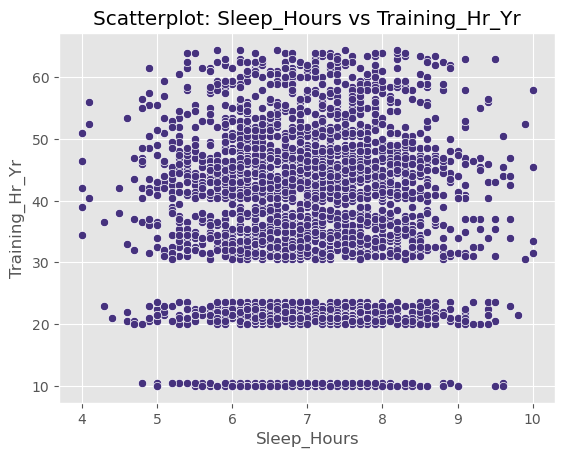

In [306]:
# 122

# What is the relationship between Sleep_Hours and Training_Hr_Yr
sns.scatterplot(x='Sleep_Hours', y='Training_Hr_Yr', data=df)
plt.title('Scatterplot: Sleep_Hours vs Training_Hr_Yr')
plt.show()

In [307]:
# 123

# What is the corelation btw Sleep_Hours and Job_Satisfaction 
corr_value = df['Sleep_Hours'].corr(df['Job_Satisfaction'])
print(f'Correlation between Sleep_Hours and Job_Satisfaction: {corr_value}')

Correlation between Sleep_Hours and Job_Satisfaction: 0.1798718088944647


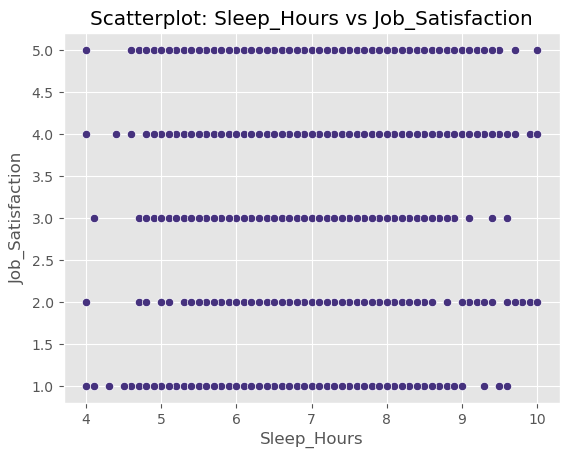

In [308]:
# 124

# What is the relationship between Sleep_Hours and Job_Satisfaction
sns.scatterplot(x='Sleep_Hours', y='Job_Satisfaction', data=df)
plt.title('Scatterplot: Sleep_Hours vs Job_Satisfaction')
plt.show()

In [310]:
# 125

# What is the corelation btw Commute_Distance and Training_Hr_Yr 
corr_value = df['Commute_Distance'].corr(df['Training_Hr_Yr'])
print(f'Correlation between Commute_Distance and Training_Hr_Yr: {corr_value}')

Correlation between Commute_Distance and Training_Hr_Yr: 0.012362101415884433


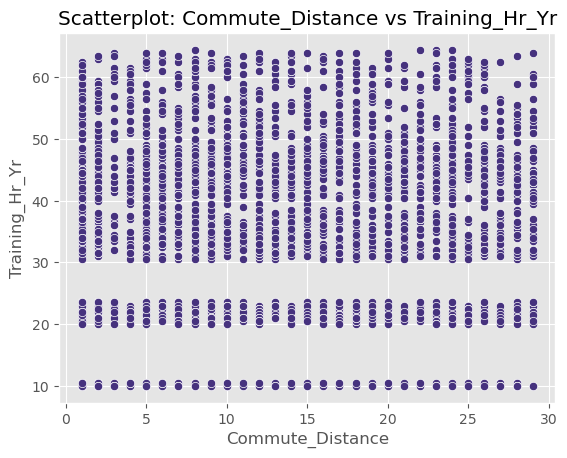

In [311]:
# 126

# What is the relationship between Commute_Distance and Training_Hr_Yr
sns.scatterplot(x='Commute_Distance', y='Training_Hr_Yr', data=df)
plt.title('Scatterplot: Commute_Distance vs Training_Hr_Yr')
plt.show()

In [312]:
# 127

# What is the corelation btw Commute_Distance and Job_Satisfaction 
corr_value = df['Commute_Distance'].corr(df['Job_Satisfaction'])
print(f'Correlation between Commute_Distance and Job_Satisfaction: {corr_value}')

Correlation between Commute_Distance and Job_Satisfaction: 0.0007733230806719408


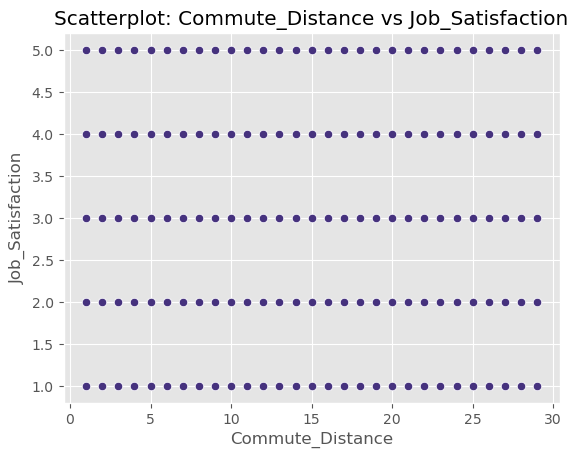

In [313]:
# 128

# What is the relationship between Commute_Distance and Job_Satisfaction
sns.scatterplot(x='Commute_Distance', y='Job_Satisfaction', data=df)
plt.title('Scatterplot: Commute_Distance vs Job_Satisfaction')
plt.show()

In [315]:
# 129

# What is the corelation btw Training_Hr_Yr and Job_Satisfaction 
corr_value = df['Training_Hr_Yr'].corr(df['Job_Satisfaction'])
print(f'Correlation between Training_Hr_Yr and Job_Satisfaction: {corr_value}')

Correlation between Training_Hr_Yr and Job_Satisfaction: -0.005604895706623474


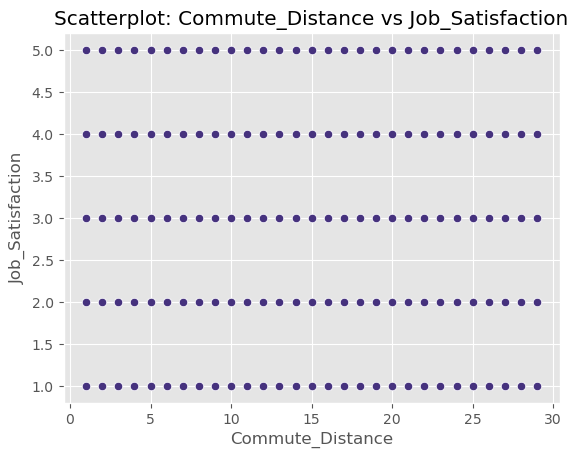

In [316]:
# 130

# What is the relationship between Commute_Distance and Job_Satisfaction
sns.scatterplot(x='Commute_Distance', y='Job_Satisfaction', data=df)
plt.title('Scatterplot: Commute_Distance vs Job_Satisfaction')
plt.show()

#### **Bivariate analysis for categorical variables**

In [317]:
# 131

# What is the Relationship btw Gender and Material_status
ct = pd.crosstab(df['Gender'], df['Marital_Status'])
print( ct )

Marital_Status  Divorced  Married  Single  Widowed
Gender                                            
Female                80      628     532        0
Male                 109      769     648        2
Other                  0        0     257        0


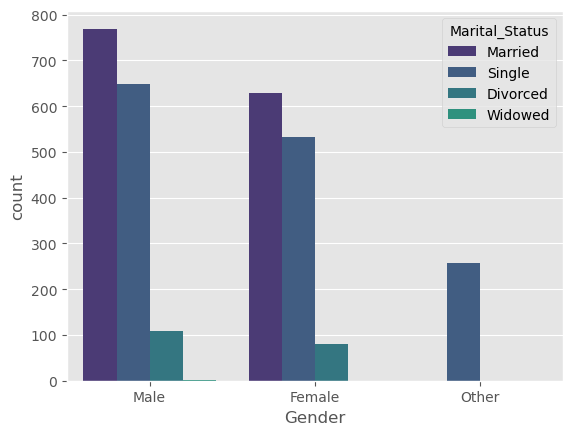

In [319]:
# 132

# is there a relationship between dender and married_status
sns.countplot(x='Gender', hue='Marital_Status', data=df)
plt.show()

In [321]:
# 133

# What is the Relationship btw Gender and Department
ct = pd.crosstab(df['Gender'], df['Department'])
print( ct )

Department  Customer Service  Finance  HR   IT  Legal  Marketing  Operations  \
Gender                                                                         
Female                    72      291  80  134    122        202         207   
Male                      65      275  50  590    127         90         203   
Other                     10       71  13   50     23         24          45   

Department  Sales  
Gender             
Female        132  
Male          128  
Other          21  


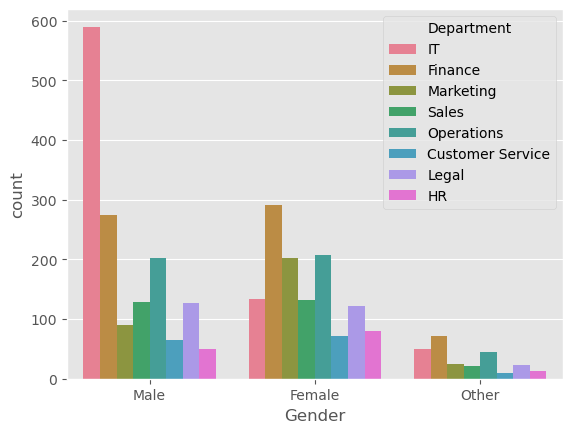

In [323]:
# 134

# is there a relationship between dender and Department
sns.countplot(x='Gender', hue='Department', data=df)
plt.show()

In [324]:
# 135

# What is the Relationship btw Gender and Employement_Type
ct = pd.crosstab(df['Gender'], df['Employement_Type'])
print( ct )

Employement_Type  Contract  Full-Time  Part-Time
Gender                                          
Female                 134        857        249
Male                   157       1041        330
Other                   17        179         61


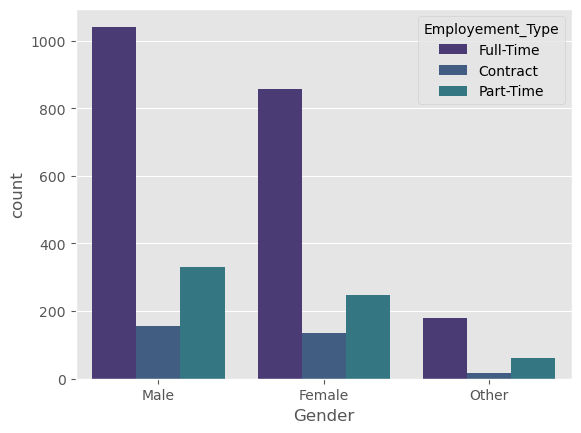

In [328]:
# 136

# is there a relationship between dender and Employement_Type
sns.countplot(x='Gender', hue='Employement_Type', data=df)
plt.show()

In [327]:
# 137

# What is the Relationship btw Gender and Commute_Mode
ct = pd.crosstab(df['Gender'], df['Commute_Mode'])
print( ct )

Commute_Mode  Bike  Car  Motorbike  Public Transport  Walk
Gender                                                    
Female         175  446        133               368   118
Male           225  553        156               437   157
Other           36   88         21                90    22


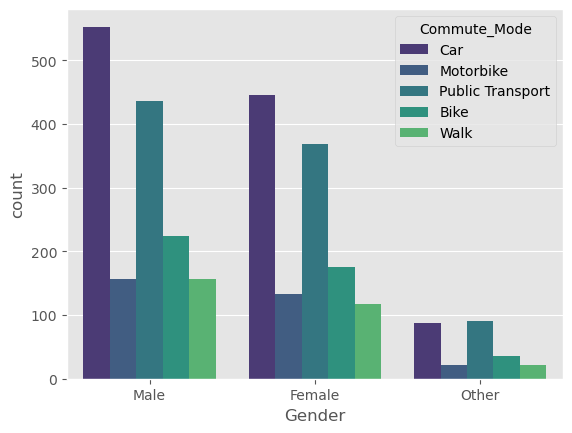

In [329]:
# 138

# is there a relationship between dender and Commute_Mode
sns.countplot(x='Gender', hue='Commute_Mode', data=df)
plt.show()

In [330]:
# 139

# What is the Relationship btw Gender and Edu_Level
ct = pd.crosstab(df['Gender'], df['Edu_Level'])
print( ct )

Edu_Level  Bachelor  High School  Master  PhD
Gender                                       
Female          961           91     150   38
Male           1147          136     196   49
Other           192           18      34   13


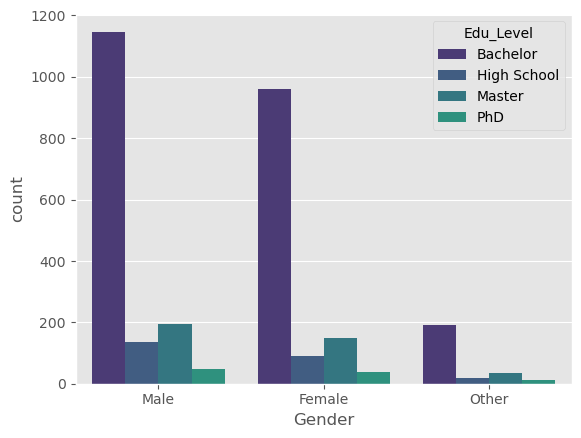

In [331]:
# 140

# is there a relationship between dender and Edu_Level
sns.countplot(x='Gender', hue='Edu_Level', data=df)
plt.show()

In [335]:
# 141

# What is the Relationship btw Gender and Overtime
ct = pd.crosstab(df['Gender'], df['Overtime'])
print( ct )

Overtime  False  True 
Gender                
Female      974    266
Male        928    600
Other       187     70


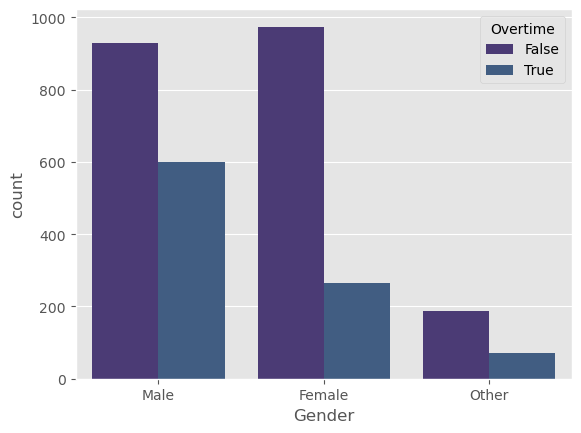

In [337]:
# 142

# is there a relationship between dender and Overtime
sns.countplot(x='Gender', hue='Overtime', data=df)
plt.show()

In [338]:
# 143

# What is the Relationship btw Marital_Status and Department
ct = pd.crosstab(df['Marital_Status'], df['Department'])
print( ct )

Department      Customer Service  Finance  HR   IT  Legal  Marketing  \
Marital_Status                                                         
Divorced                      19       36   8   48      9         21   
Married                       65      273  75  371    123        155   
Single                        63      327  60  354    140        140   
Widowed                        0        1   0    1      0          0   

Department      Operations  Sales  
Marital_Status                     
Divorced                30     18  
Married                209    126  
Single                 216    137  
Widowed                  0      0  


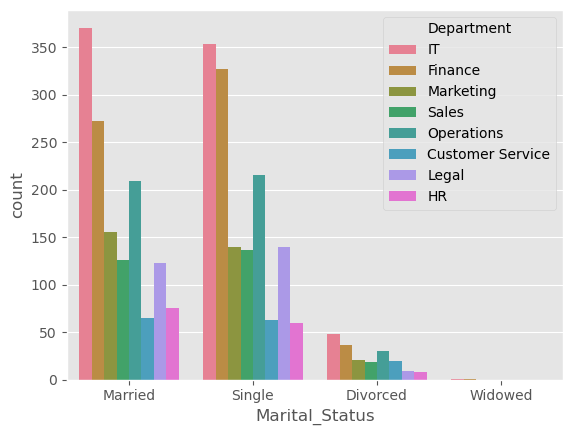

In [340]:
# 144

# is there a relationship between Marital_Status and Department
sns.countplot(x='Marital_Status', hue='Department', data=df)
plt.show()

In [341]:
# 145

# What is the Relationship btw Marital_Status and Employement_Type
ct = pd.crosstab(df['Marital_Status'], df['Employement_Type'])
print( ct )

Employement_Type  Contract  Full-Time  Part-Time
Marital_Status                                  
Divorced                22        130         37
Married                143        962        292
Single                 142        984        311
Widowed                  1          1          0


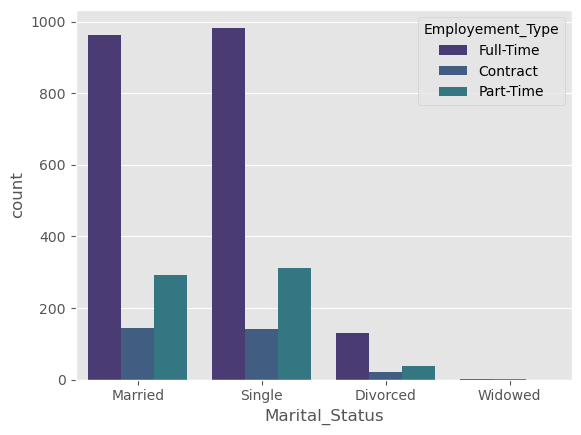

In [343]:
# 146

# is there a relationship between Marital_Status and Employement_Type
sns.countplot(x='Marital_Status', hue='Employement_Type', data=df)
plt.show()

In [344]:
# 147

# What is the Relationship btw Marital_Status and Commute_Mode
ct = pd.crosstab(df['Marital_Status'], df['Commute_Mode'])
print( ct )

Commute_Mode    Bike  Car  Motorbike  Public Transport  Walk
Marital_Status                                              
Divorced          30   65         20                51    23
Married          194  503        158               395   147
Single           212  518        132               448   127
Widowed            0    1          0                 1     0


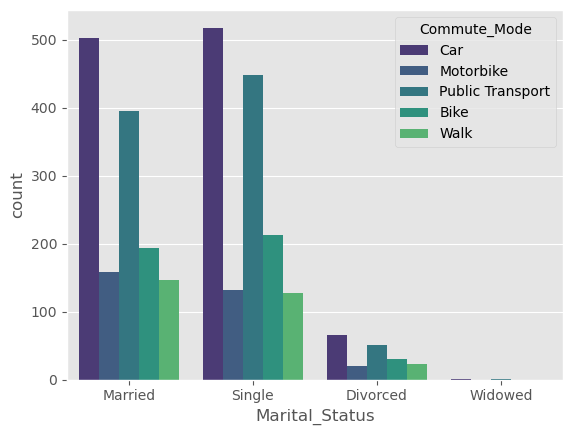

In [345]:
# 148

# is there a relationship between Marital_Status and Commute_Mode
sns.countplot(x='Marital_Status', hue='Commute_Mode', data=df)
plt.show()

In [347]:
# 149

# What is the Relationship btw Marital_Status and Edu_Level
ct = pd.crosstab(df['Marital_Status'], df['Edu_Level'])
print( ct )

Edu_Level       Bachelor  High School  Master  PhD
Marital_Status                                    
Divorced             136            0      36   17
Married             1075           14     242   66
Single              1088          231     102   16
Widowed                1            0       0    1


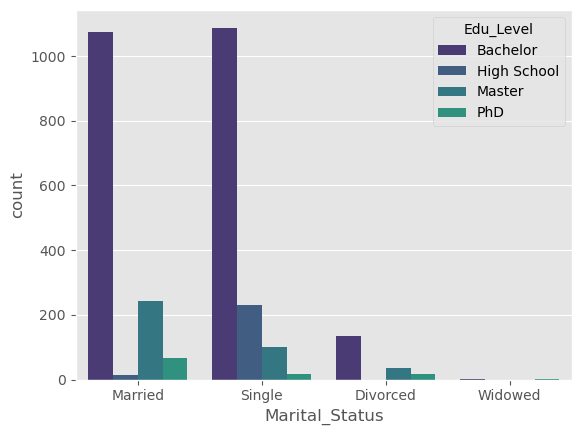

In [348]:
# 150

# is there a relationship between Marital_Status and Edu_Level
sns.countplot(x='Marital_Status', hue='Edu_Level', data=df)
plt.show()

In [350]:
# 151

# What is the Relationship btw Marital_Status and Edu_Level
ct = pd.crosstab(df['Marital_Status'], df['Overtime'])
print( ct )

Overtime        False  True 
Marital_Status              
Divorced          132     57
Married           961    436
Single            994    443
Widowed             2      0


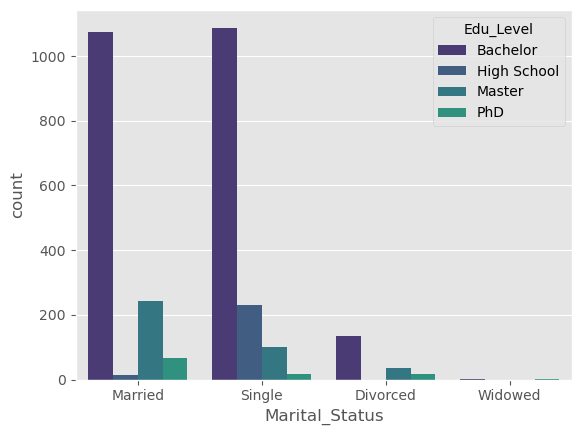

In [351]:
# 152

# is there a relationship between Marital_Status and Edu_Level
sns.countplot(x='Marital_Status', hue='Edu_Level', data=df)
plt.show()

In [353]:
# 153

# What is the Relationship btw Department and Employement_Type
ct = pd.crosstab(df['Department'], df['Employement_Type'])
print( ct )

Employement_Type  Contract  Full-Time  Part-Time
Department                                      
Customer Service        13         94         40
Finance                 69        441        127
HR                      13        107         23
IT                      78        522        174
Legal                   27        191         54
Marketing               31        228         57
Operations              46        317         92
Sales                   31        177         73


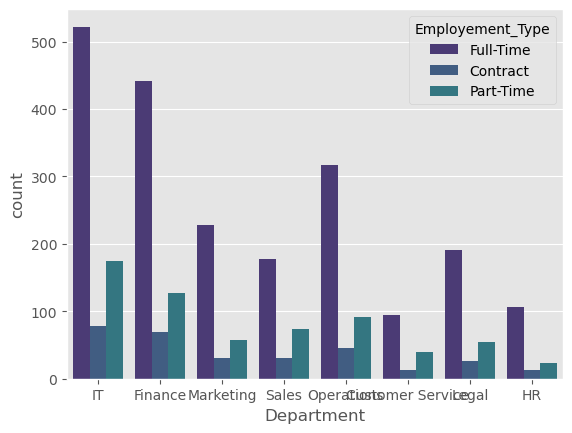

In [354]:
# 154

# is there a relationship between Department and Employement_Type
sns.countplot(x='Department', hue='Employement_Type', data=df)
plt.show()

In [355]:
# 155

# What is the Relationship btw Department and Commute_Mode
ct = pd.crosstab(df['Department'], df['Commute_Mode'])
print( ct )

Commute_Mode      Bike  Car  Motorbike  Public Transport  Walk
Department                                                    
Customer Service    21   45         21                48    12
Finance             83  230         75               184    65
HR                  19   43         12                52    17
IT                 118  295         61               224    76
Legal               42   98         34                79    19
Marketing           38  124         26                93    35
Operations          71  151         49               140    44
Sales               44  101         32                75    29


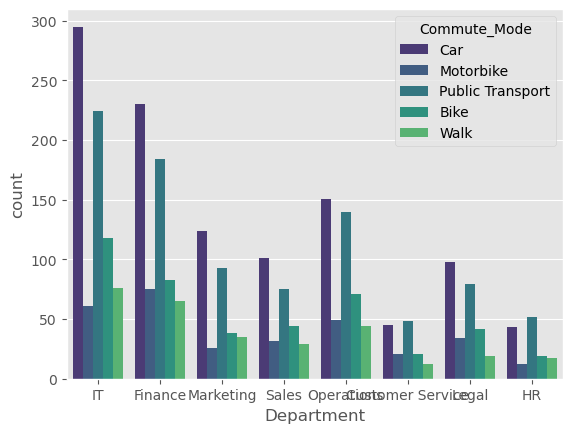

In [357]:
# 156

# is there a relationship between Department and Commute_Mode
sns.countplot(x='Department', hue='Commute_Mode', data=df)
plt.show()

In [358]:
# 157

# What is the Relationship btw Department and Edu_Level
ct = pd.crosstab(df['Department'], df['Edu_Level'])
print( ct )

Edu_Level         Bachelor  High School  Master  PhD
Department                                          
Customer Service       119            5      15    8
Finance                484           55      80   18
HR                     107            7      25    4
IT                     594           66      92   22
Legal                  201           25      38    8
Marketing              234           25      40   17
Operations             348           41      53   13
Sales                  213           21      37   10


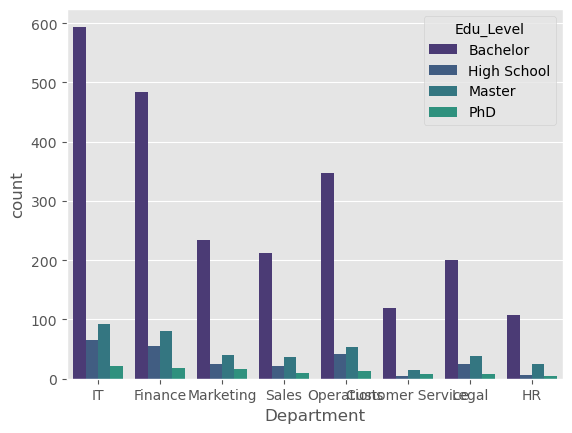

In [360]:
# 158

# is there a relationship between Department and Edu_Level
sns.countplot(x='Department', hue='Edu_Level', data=df)
plt.show()

In [361]:
# 159

# What is the Relationship btw Department and Overtime
ct = pd.crosstab(df['Department'], df['Overtime'])
print( ct )

Overtime          False  True 
Department                    
Customer Service    126     21
Finance             547     90
HR                  122     21
IT                  179    595
Legal               237     35
Marketing           274     42
Operations          379     76
Sales               225     56


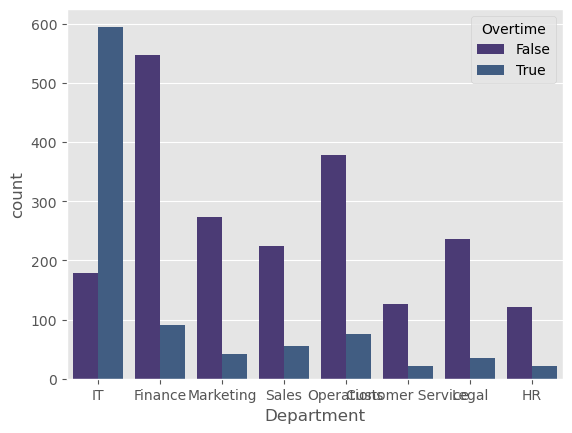

In [362]:
# 160

# is there a relationship between Department and Overtime
sns.countplot(x='Department', hue='Overtime', data=df)
plt.show()

In [365]:
# 161

# What is the Relationship btw Employement_Type and Commute_Mode
ct = pd.crosstab(df['Employement_Type'], df['Commute_Mode'])
print( ct )

Commute_Mode      Bike  Car  Motorbike  Public Transport  Walk
Employement_Type                                              
Contract            43   96         40                88    41
Full-Time          298  776        212               602   189
Part-Time           95  215         58               205    67


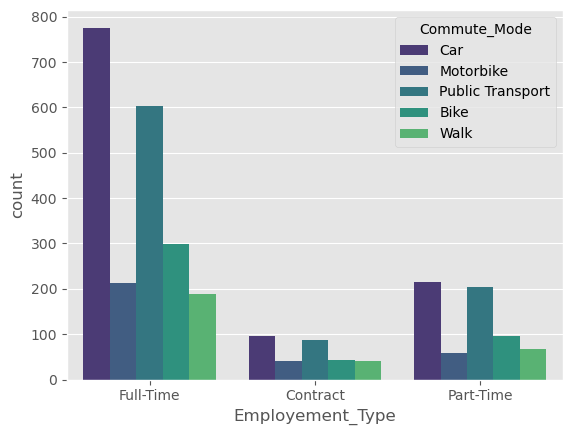

In [366]:
# 162

# is there a relationship between Employement_Type and Commute_Mode
sns.countplot(x='Employement_Type', hue='Commute_Mode', data=df)
plt.show()

In [367]:
# 163

# What is the Relationship btw Employement_Type and Edu_Level
ct = pd.crosstab(df['Employement_Type'], df['Edu_Level'])
print( ct )

Edu_Level         Bachelor  High School  Master  PhD
Employement_Type                                    
Contract               243           16      39   10
Full-Time             1553          189     264   71
Part-Time              504           40      77   19


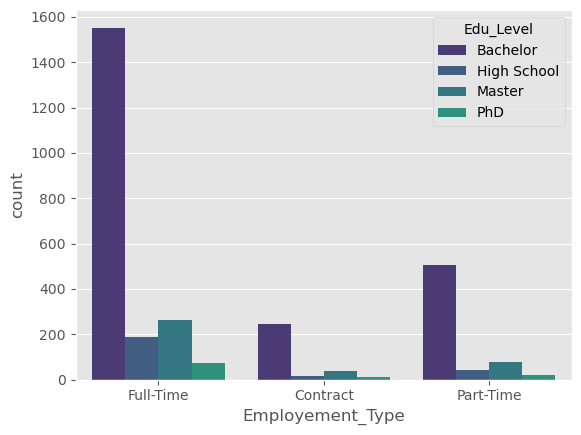

In [369]:
# 164

# is there a relationship between Employement_Type and Edu_Level
sns.countplot(x='Employement_Type', hue='Edu_Level', data=df)
plt.show()

In [370]:
# 165

# What is the Relationship btw Employement_Type and Overtime
ct = pd.crosstab(df['Employement_Type'], df['Overtime'])
print( ct )

Overtime          False  True 
Employement_Type              
Contract            214     94
Full-Time          1443    634
Part-Time           432    208


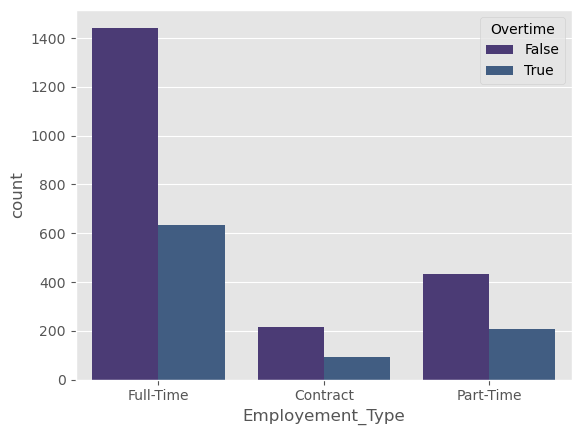

In [371]:
# 166

# is there a relationship between Employement_Type and Overtime
sns.countplot(x='Employement_Type', hue='Overtime', data=df)
plt.show()

In [372]:
# 167

# What is the Relationship btw Commute_Mode and Edu_Level
ct = pd.crosstab(df['Commute_Mode'], df['Edu_Level'])
print( ct )

Edu_Level         Bachelor  High School  Master  PhD
Commute_Mode                                        
Bike                   334           34      54   14
Car                    821           86     143   37
Motorbike              237           25      32   16
Public Transport       680           77     111   27
Walk                   228           23      40    6


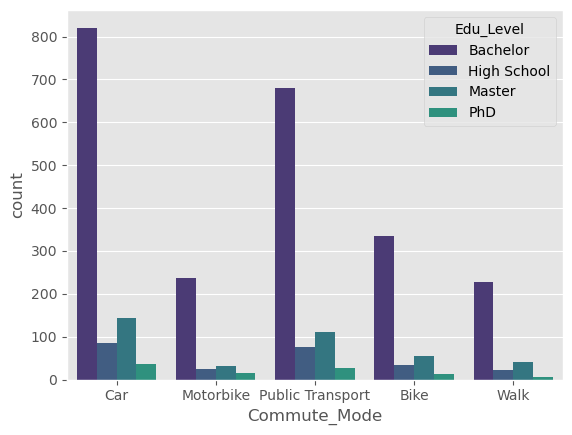

In [373]:
# 168

# is there a relationship between Commute_Mode and Edu_Level
sns.countplot(x='Commute_Mode', hue='Edu_Level', data=df)
plt.show()

In [375]:
# 169

# What is the Relationship btw Commute_Mode and Overtime
ct = pd.crosstab(df['Commute_Mode'], df['Overtime'])
print( ct )

Overtime          False  True 
Commute_Mode                  
Bike                308    128
Car                 742    345
Motorbike           226     84
Public Transport    614    281
Walk                199     98


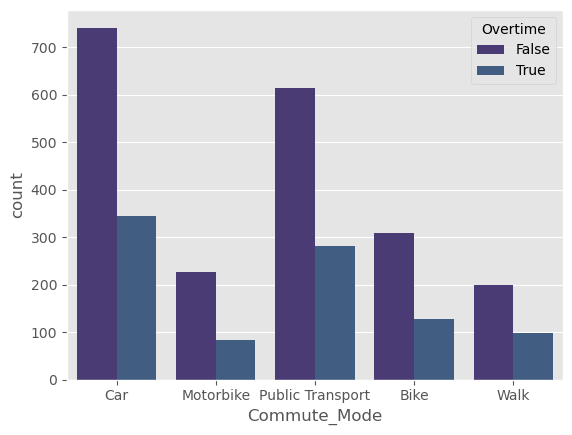

In [376]:
# 170

# is there a relationship between Commute_Mode and Overtime
sns.countplot(x='Commute_Mode', hue='Overtime', data=df)
plt.show()

In [378]:
# 171

# What is the Relationship btw Edu_Level and Overtime
ct = pd.crosstab(df['Edu_Level'], df['Overtime'])
print( ct )

Overtime     False  True 
Edu_Level                
Bachelor      1589    711
High School    172     73
Master         255    125
PhD             73     27


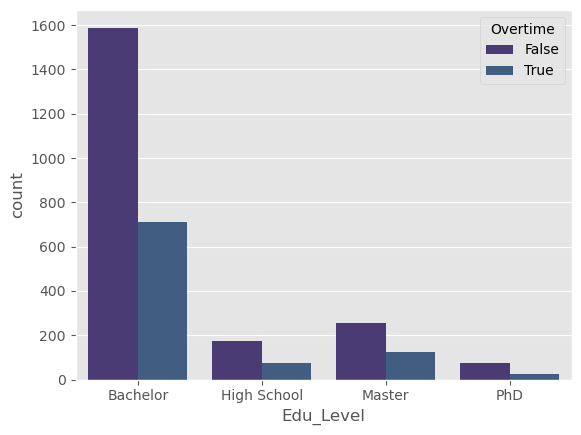

In [379]:
# 172

# is there a relationship between Edu_Level and Overtime
sns.countplot(x='Edu_Level', hue='Overtime', data=df)
plt.show()

#### *Biavriate analysis for categorical vs count plot*

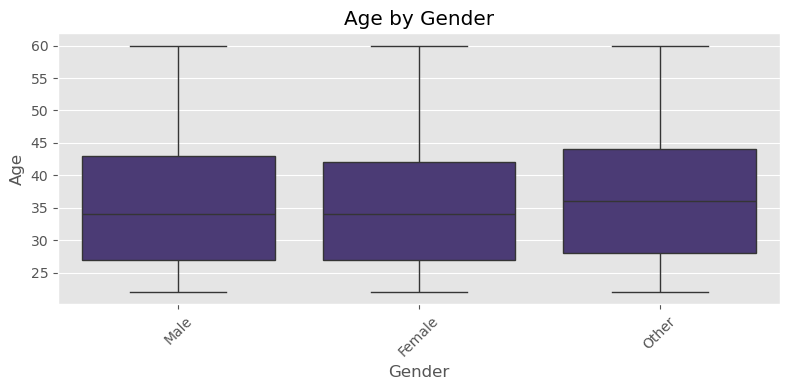

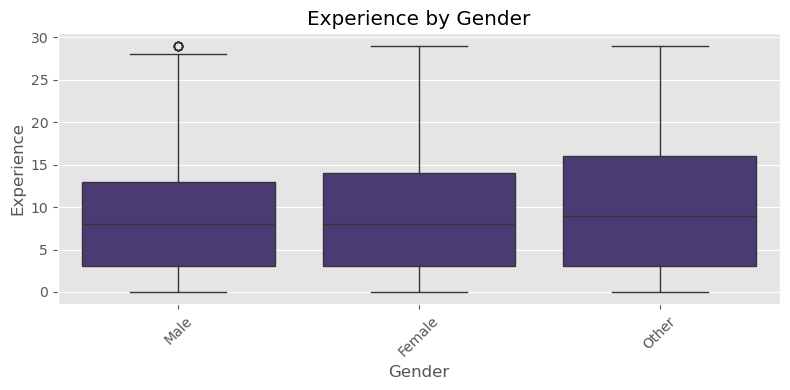

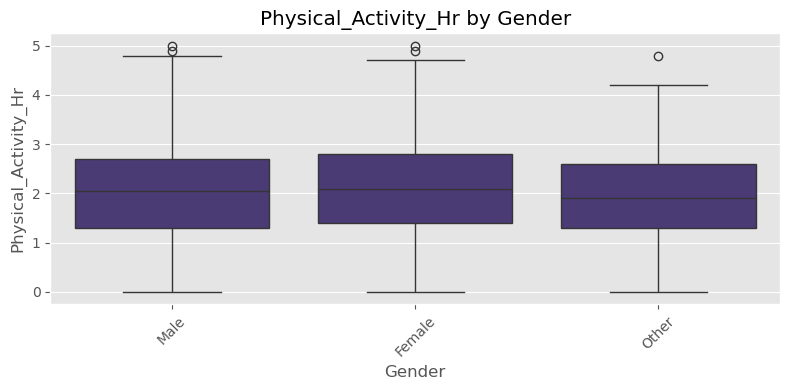

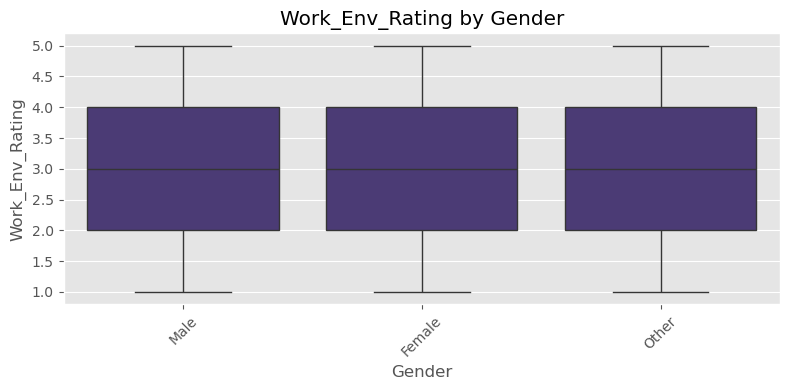

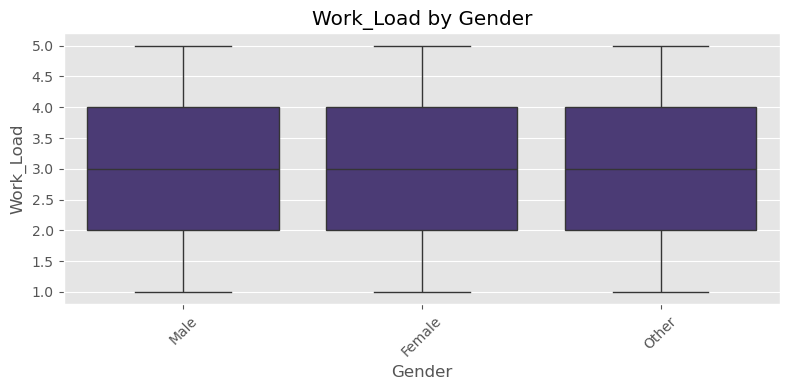

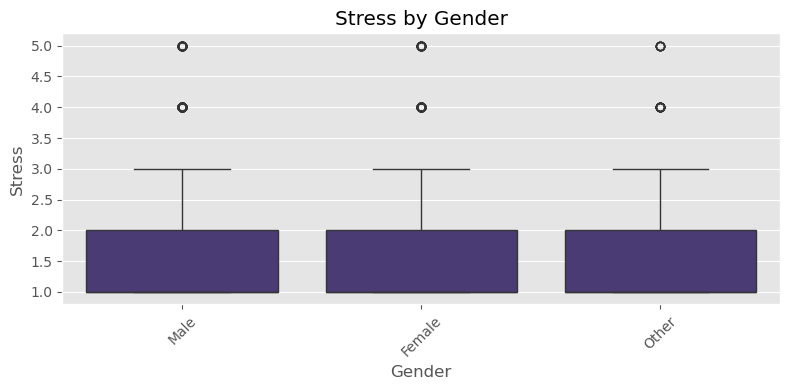

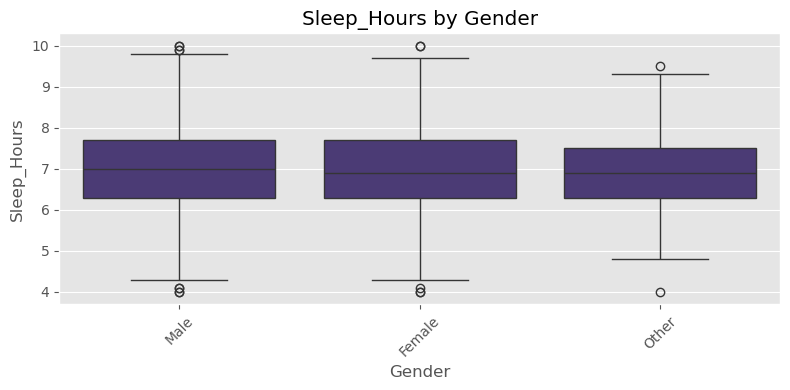

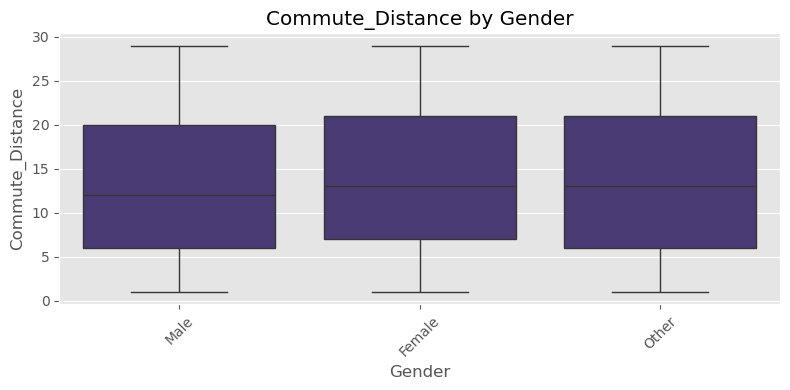

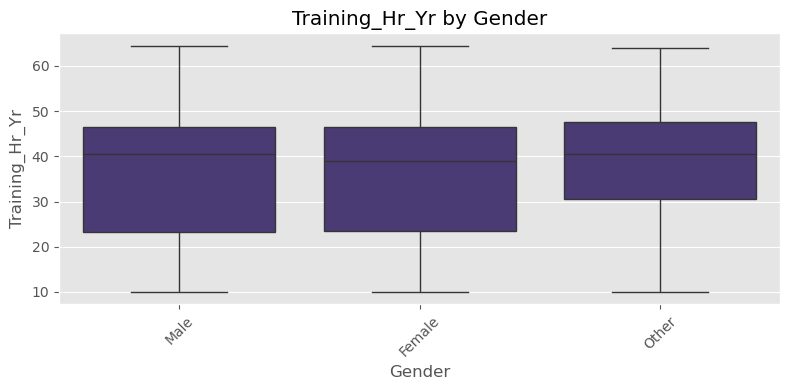

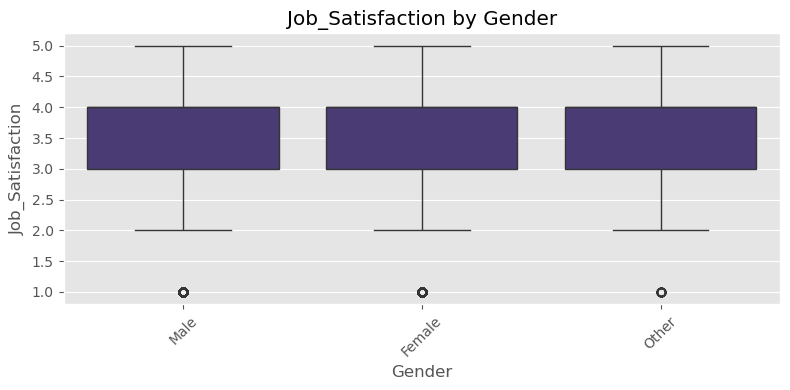

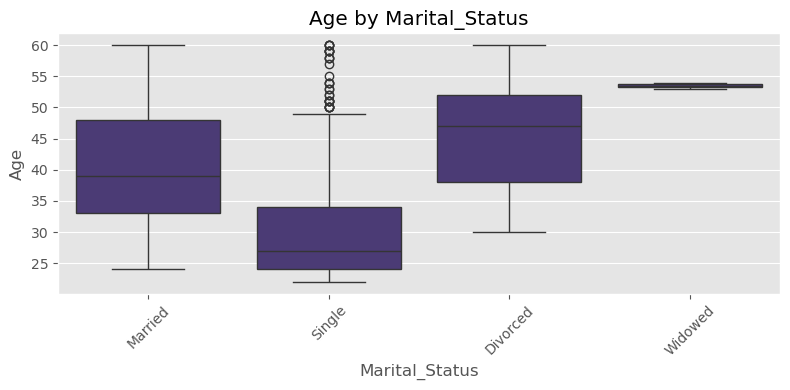

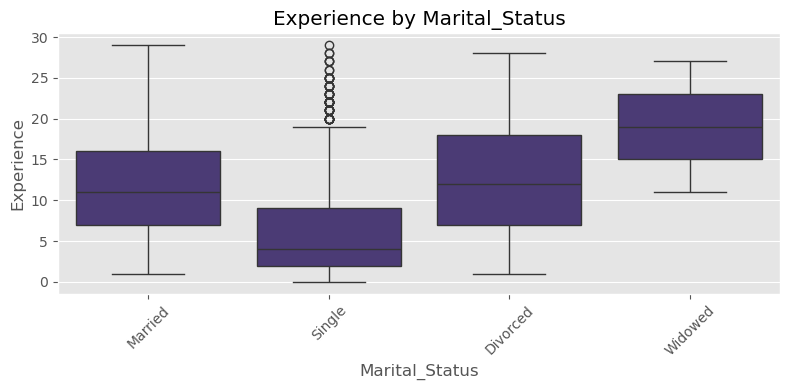

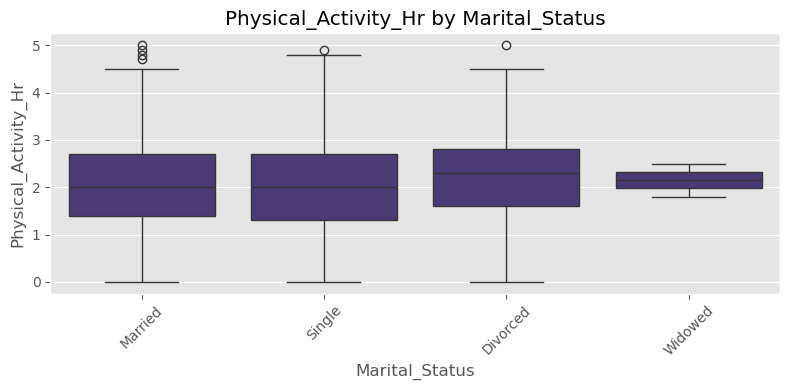

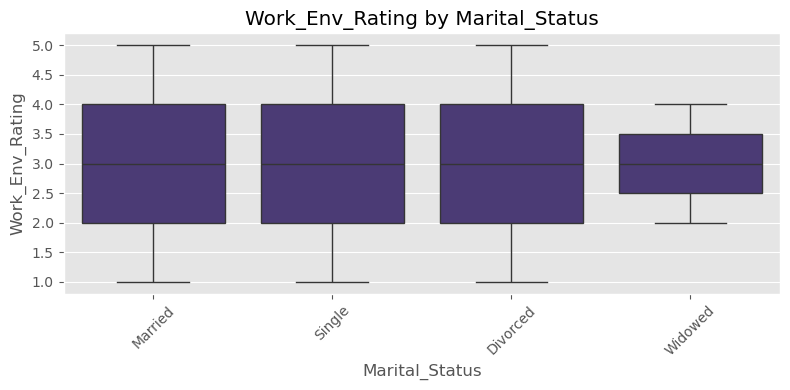

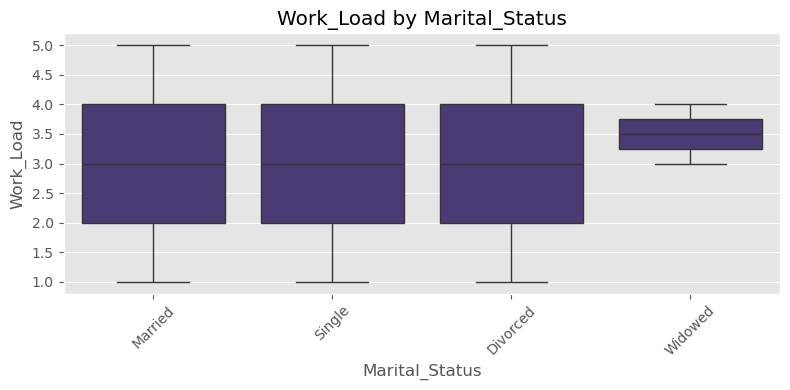

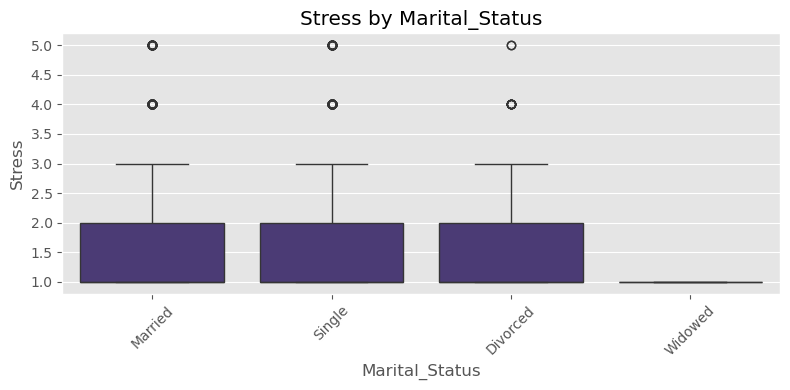

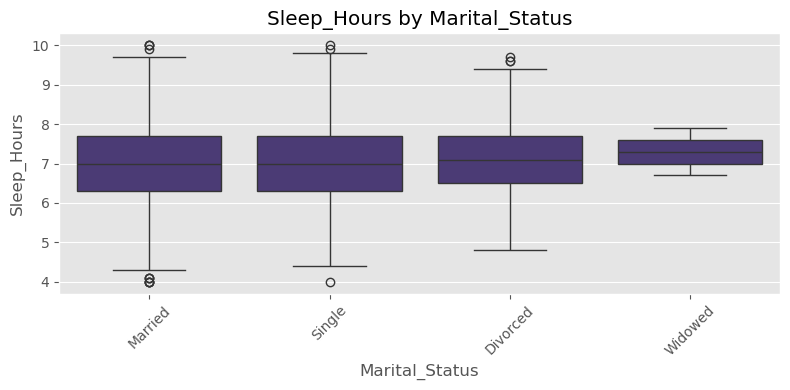

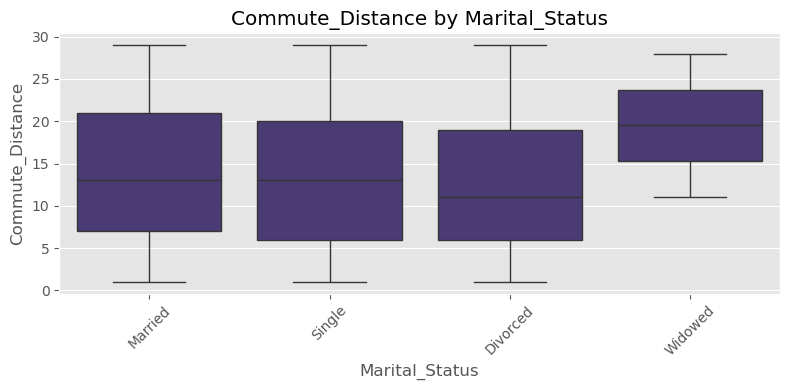

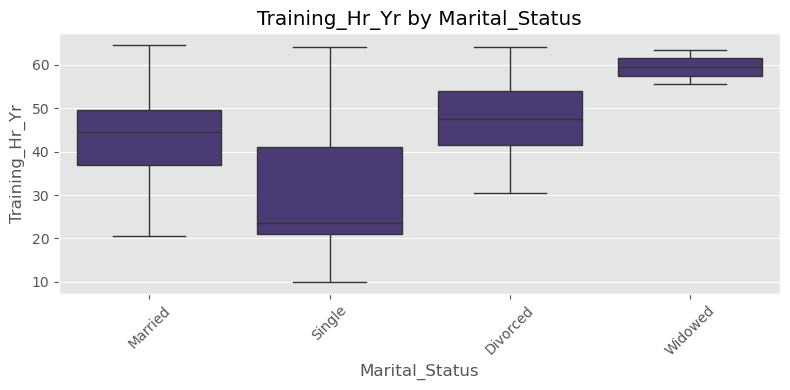

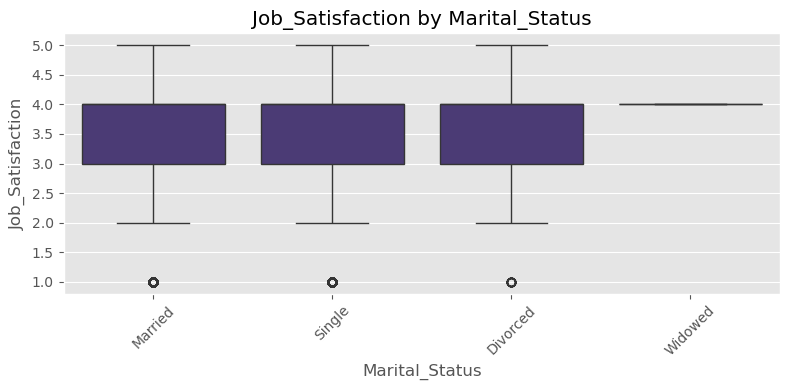

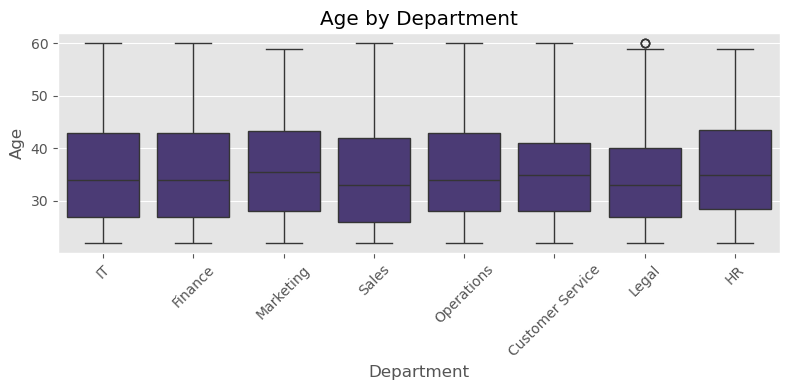

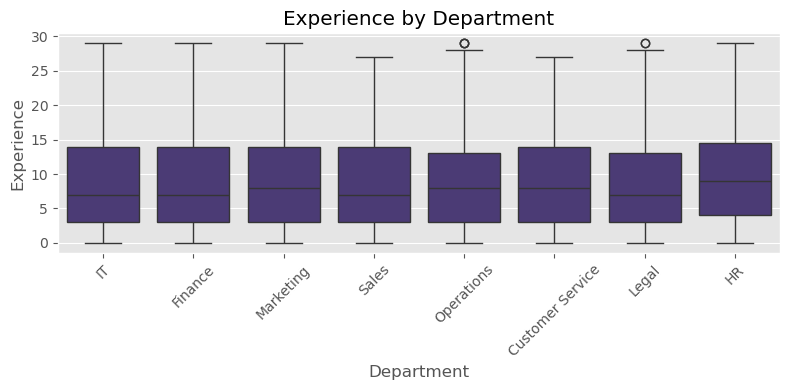

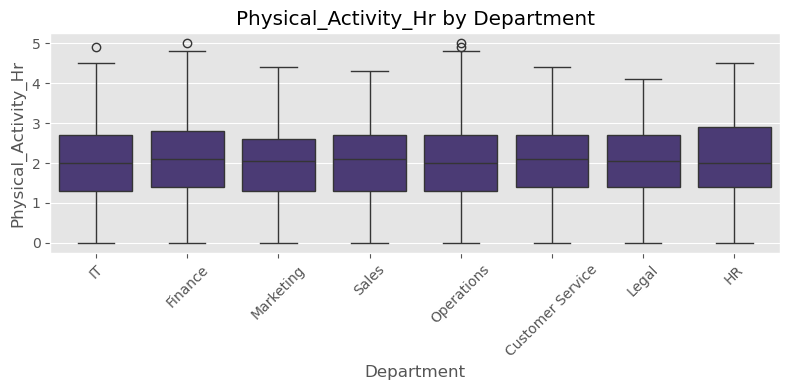

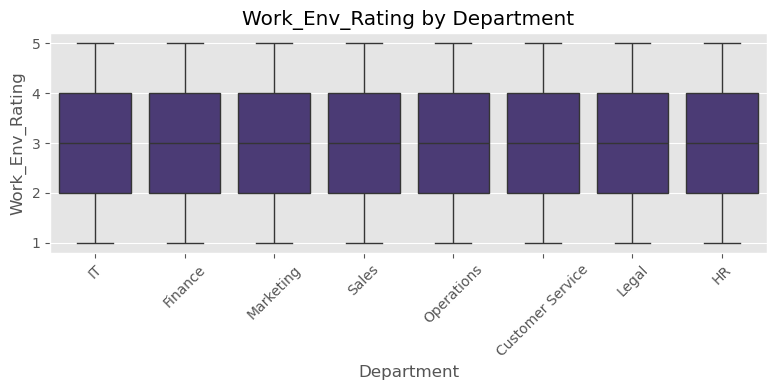

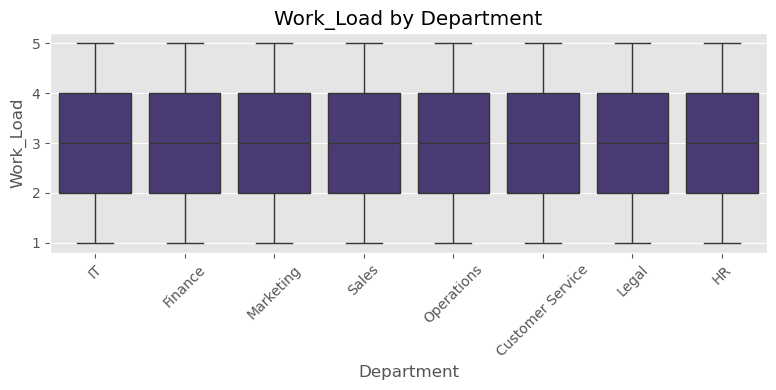

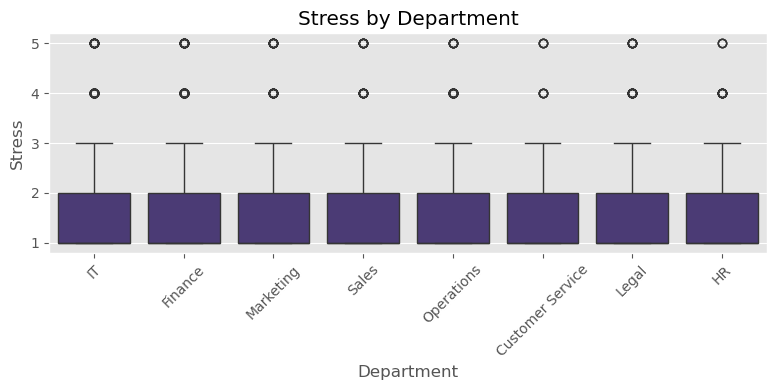

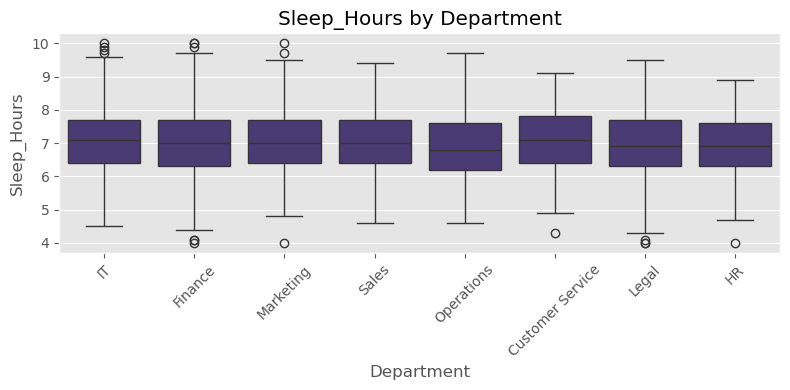

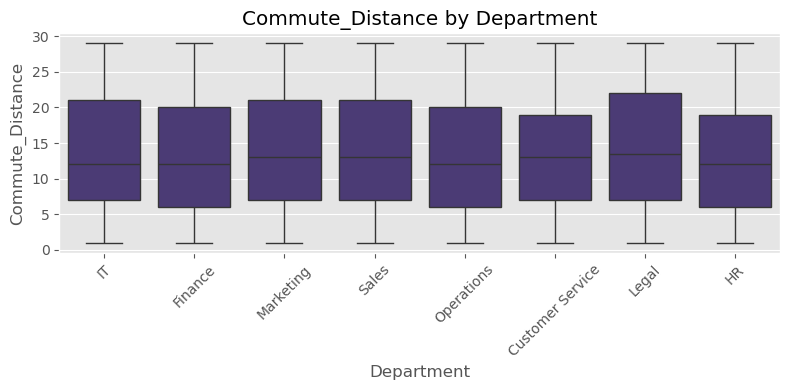

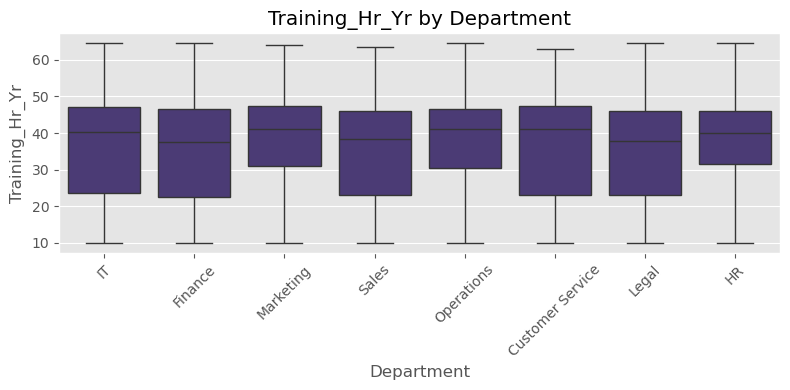

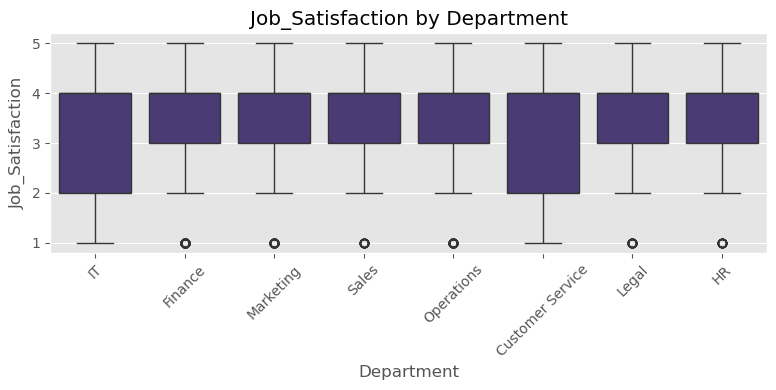

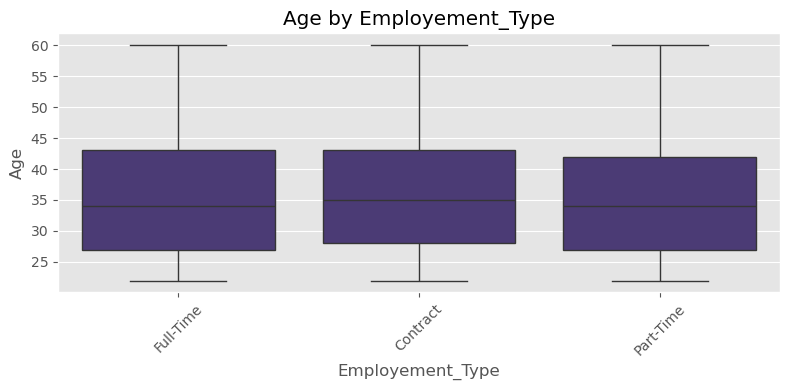

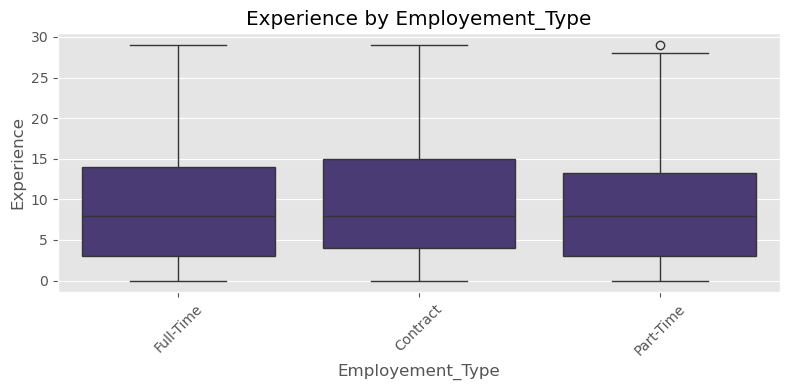

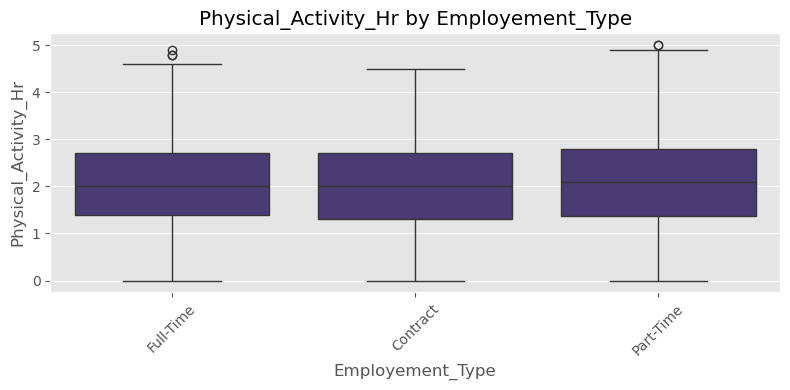

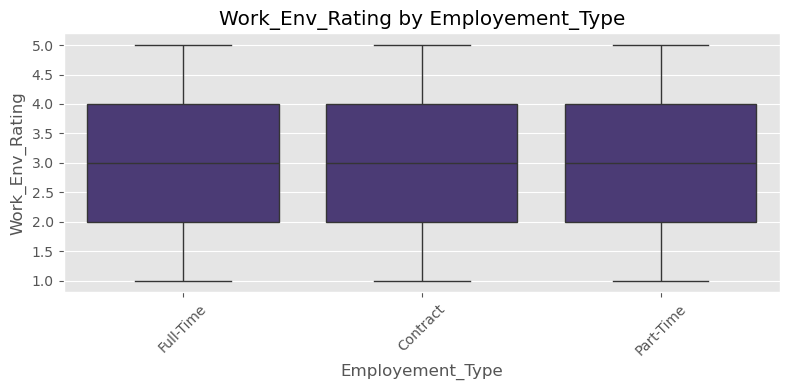

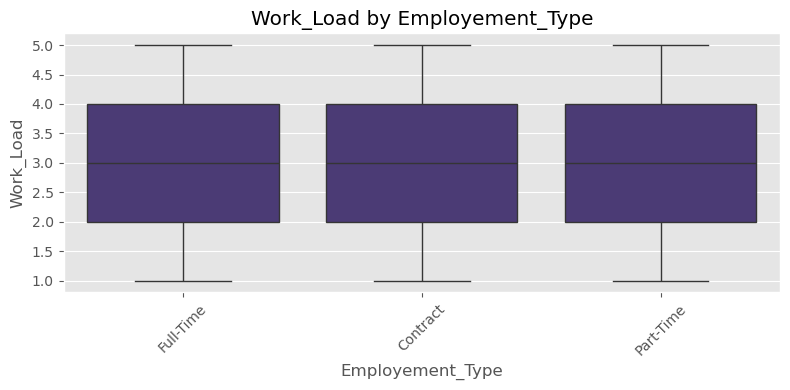

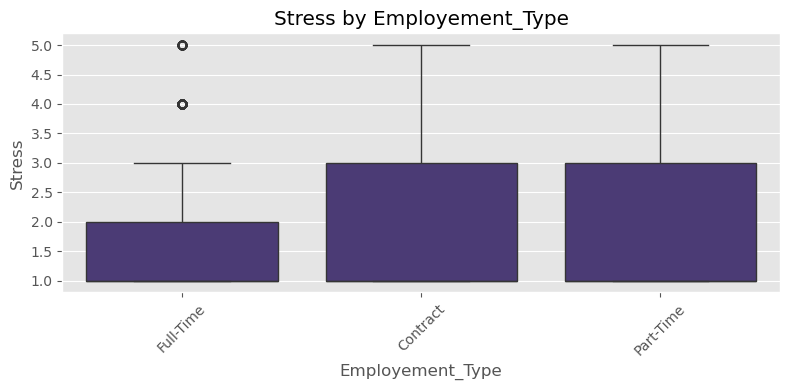

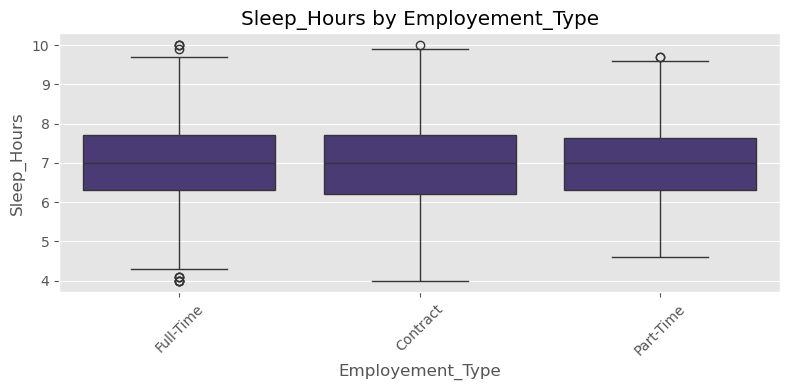

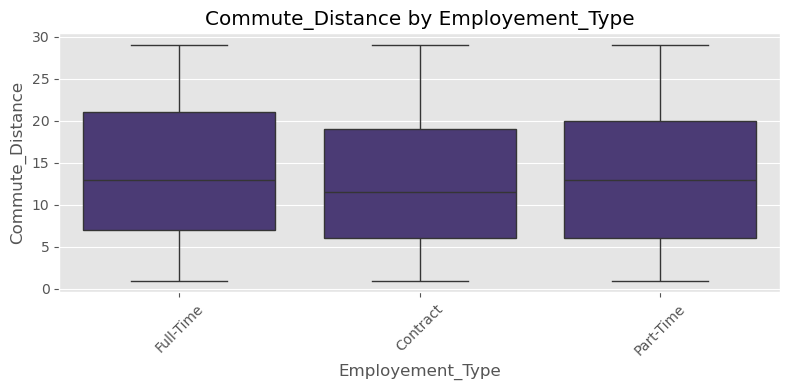

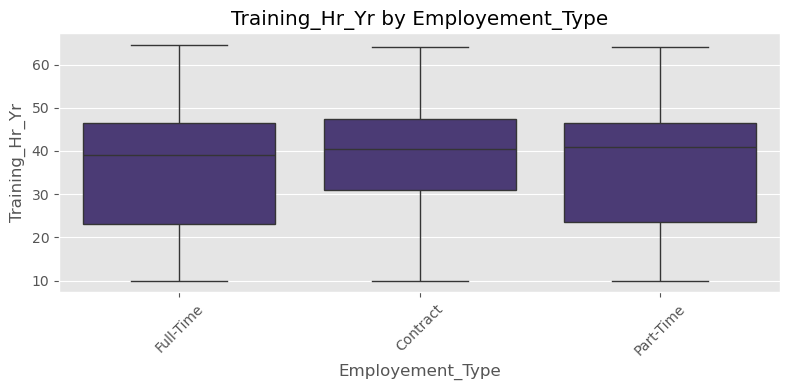

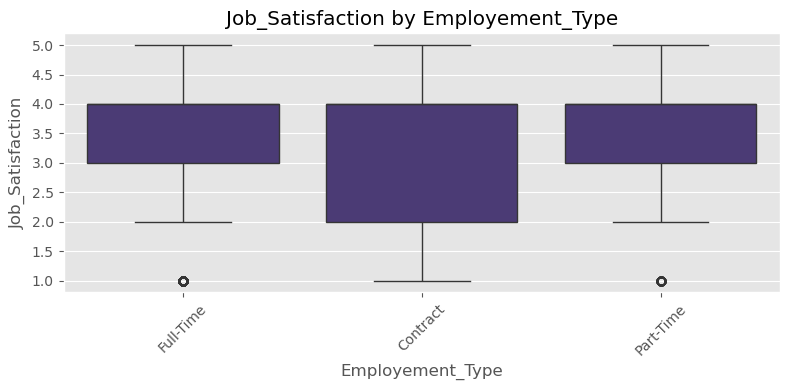

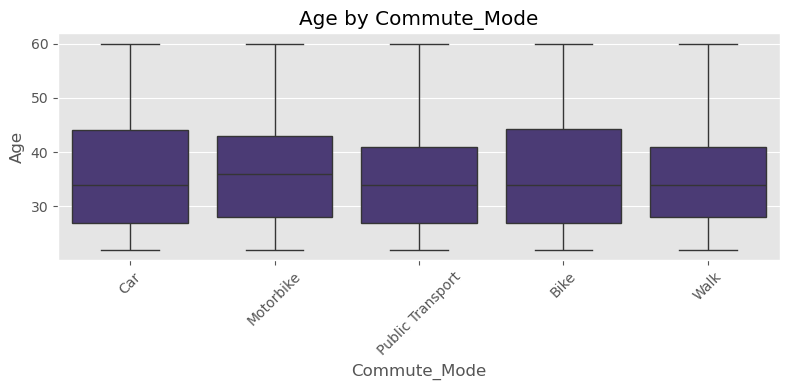

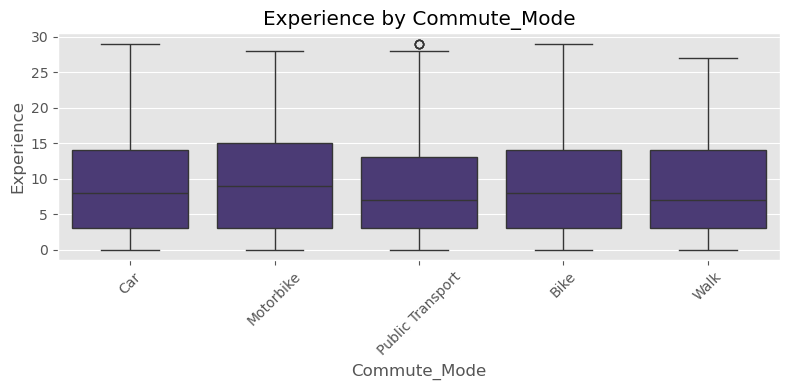

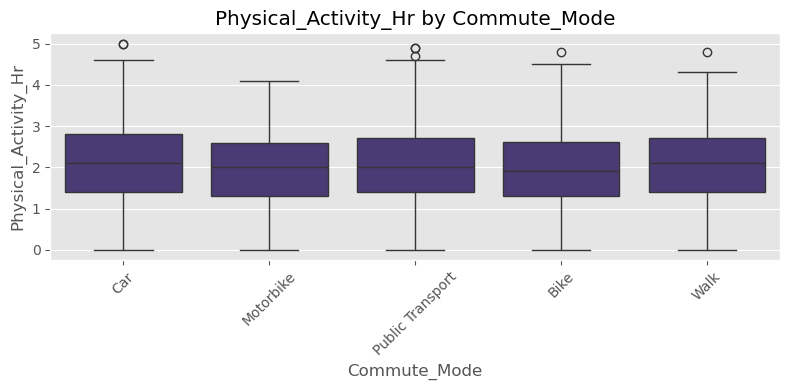

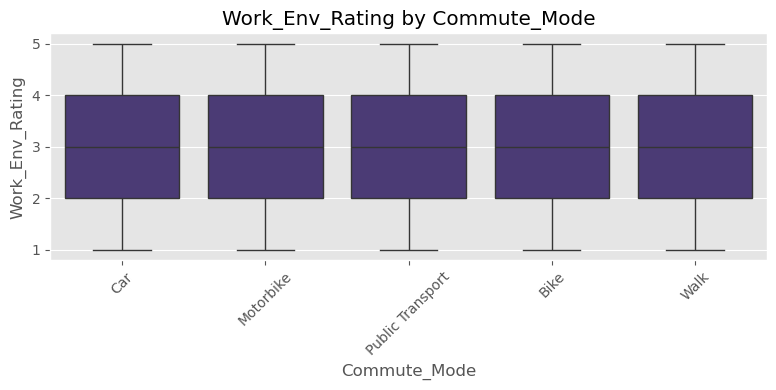

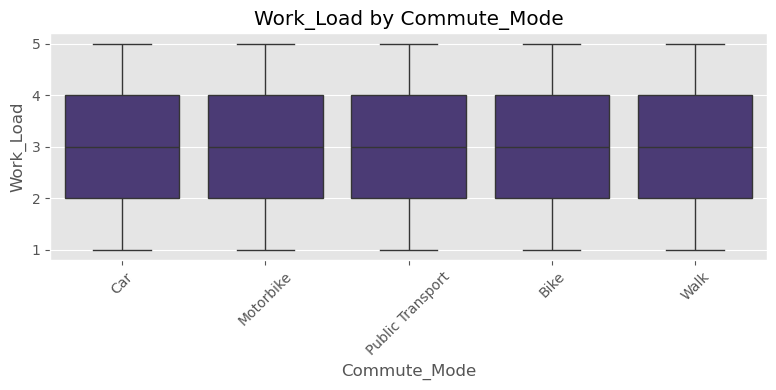

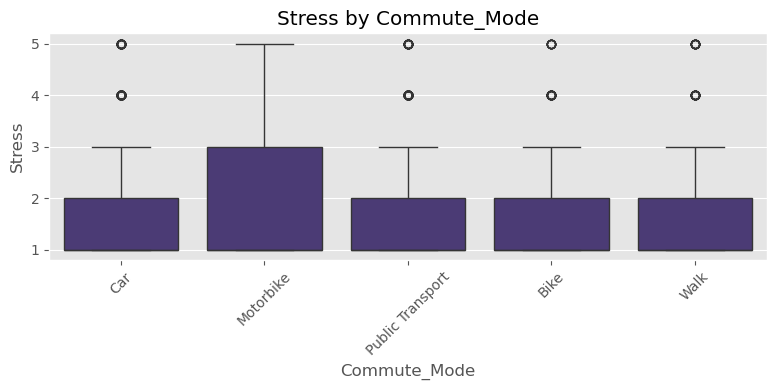

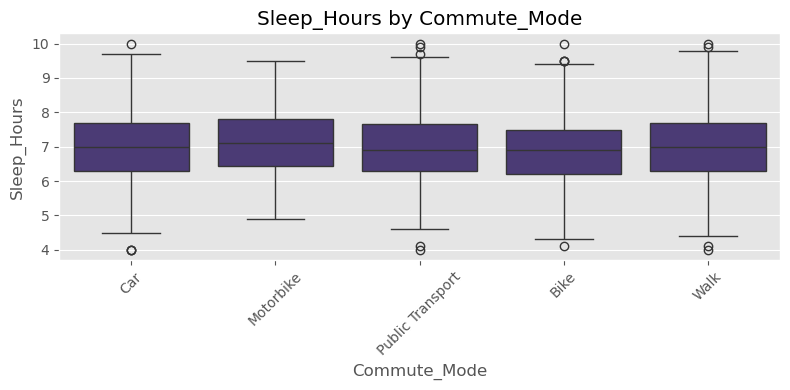

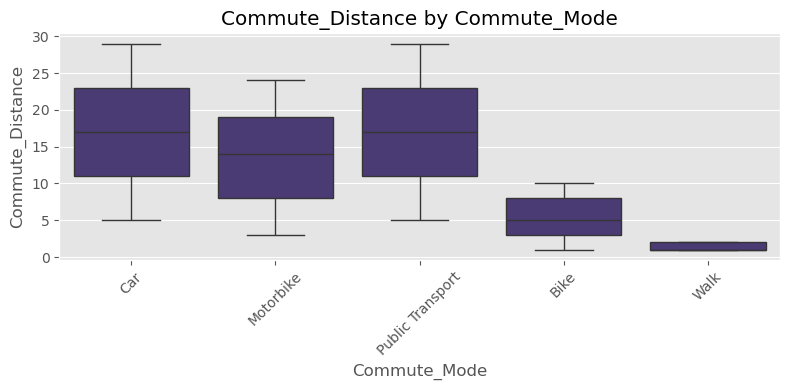

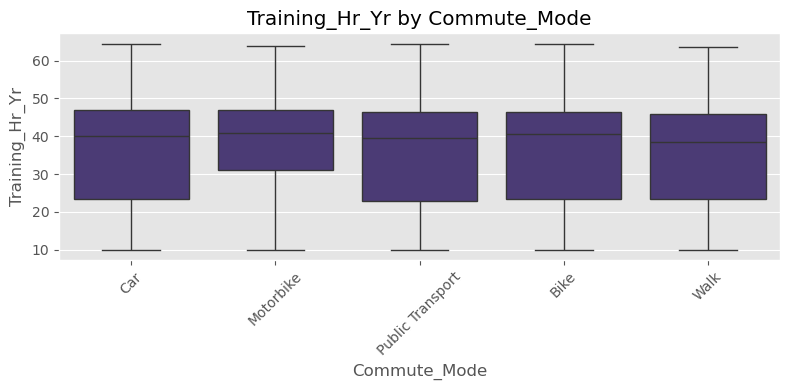

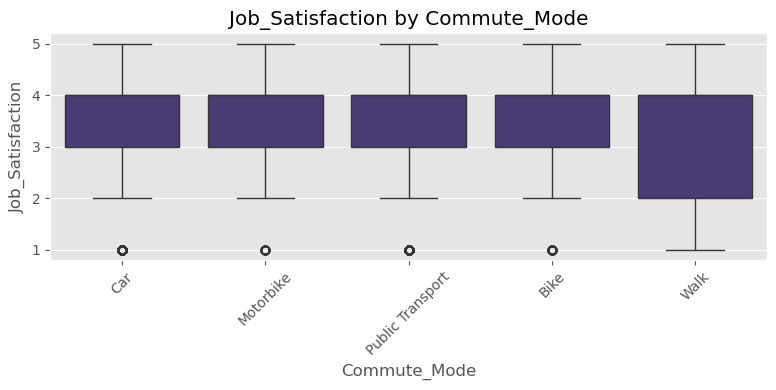

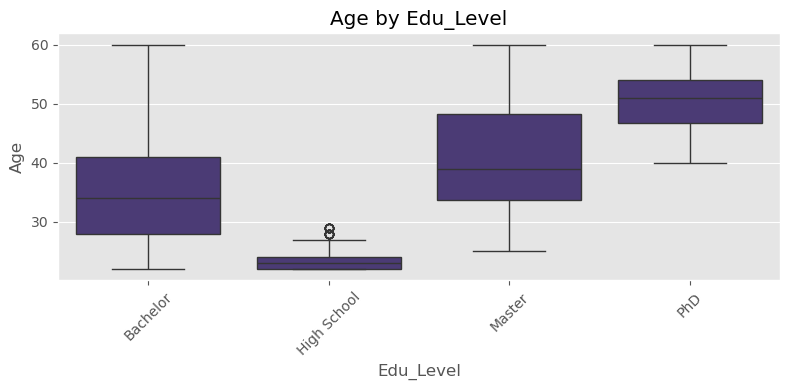

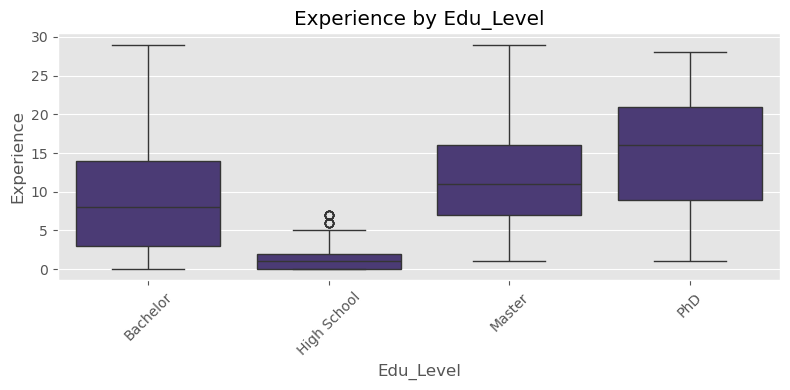

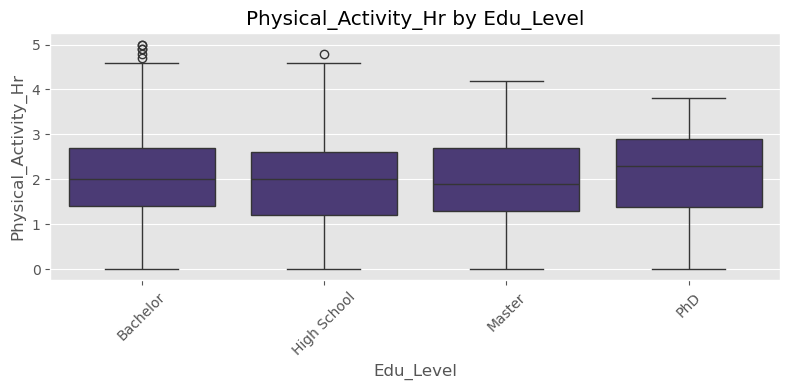

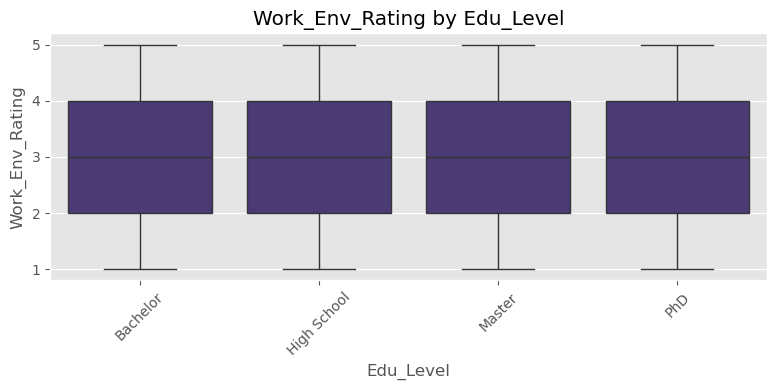

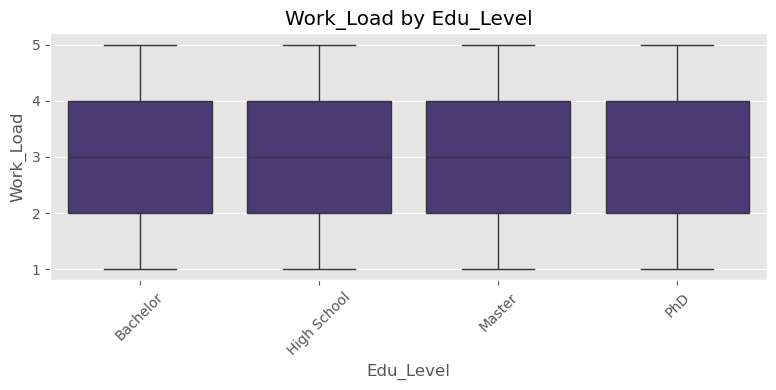

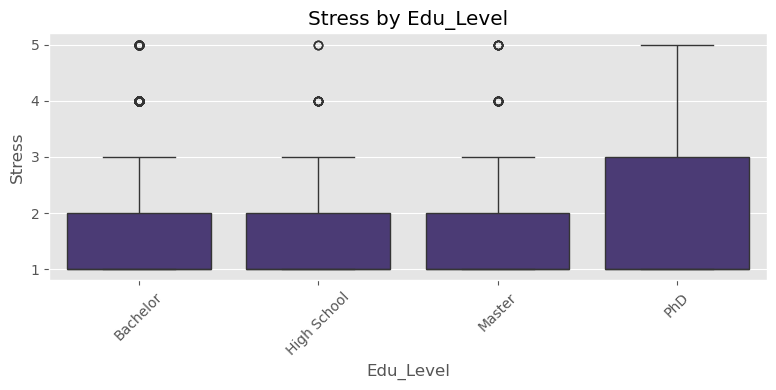

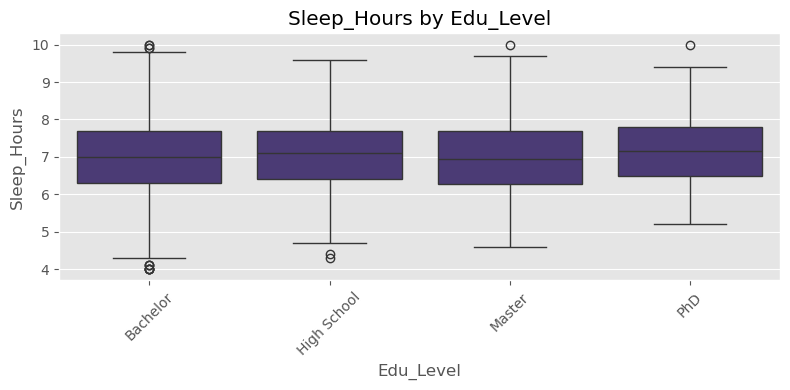

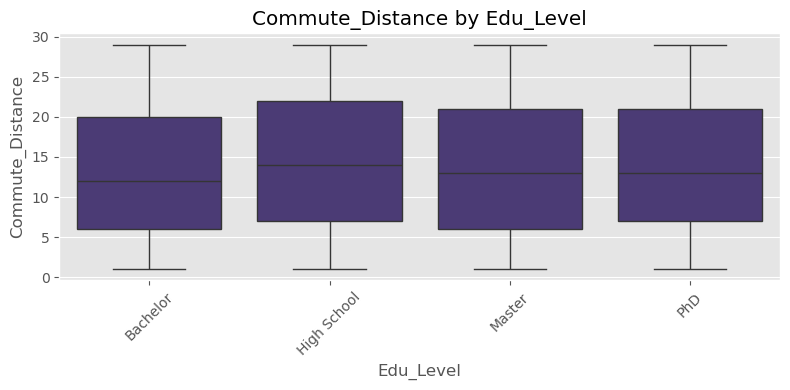

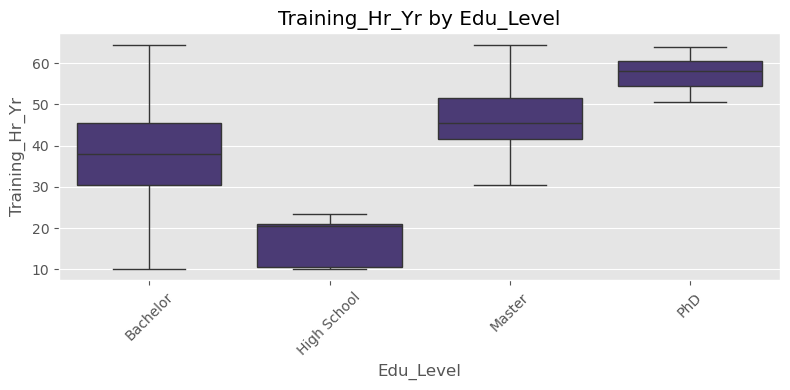

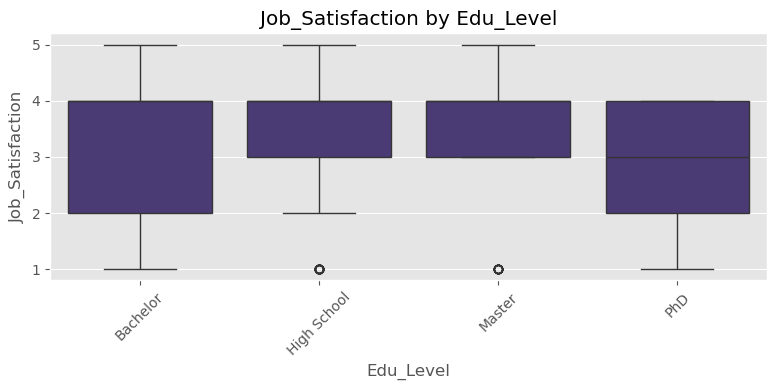

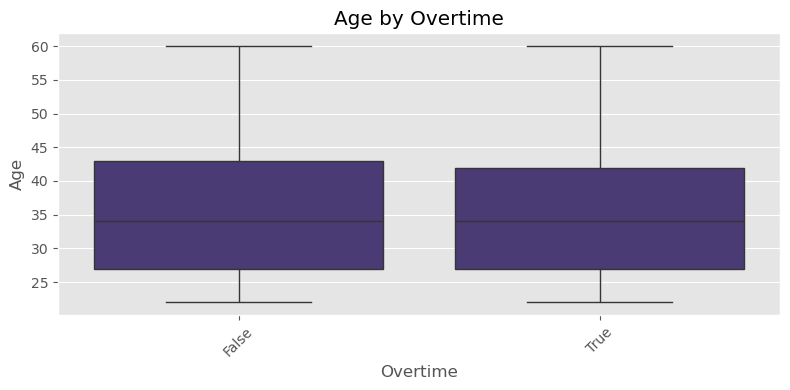

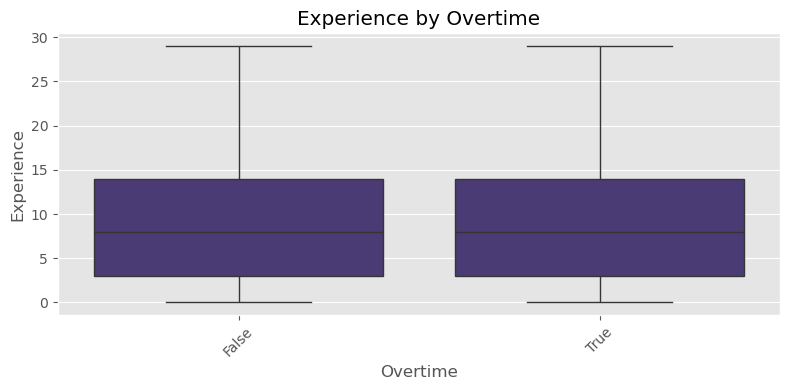

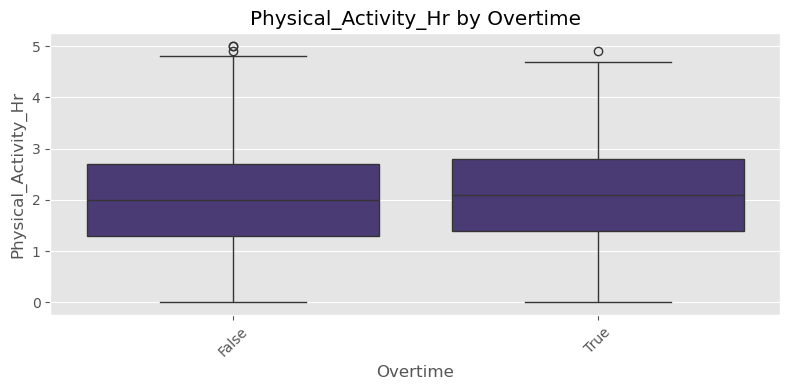

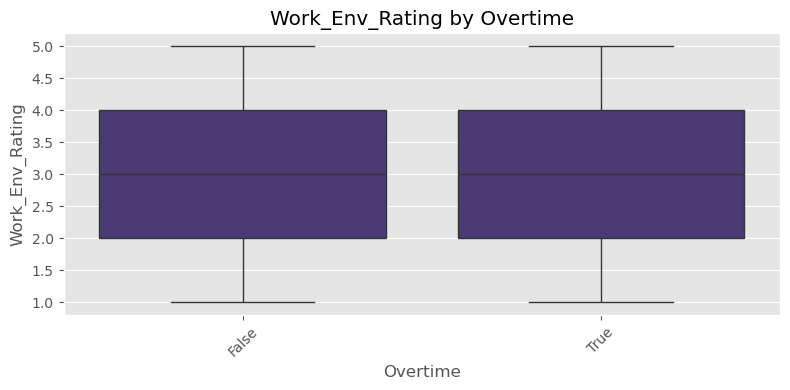

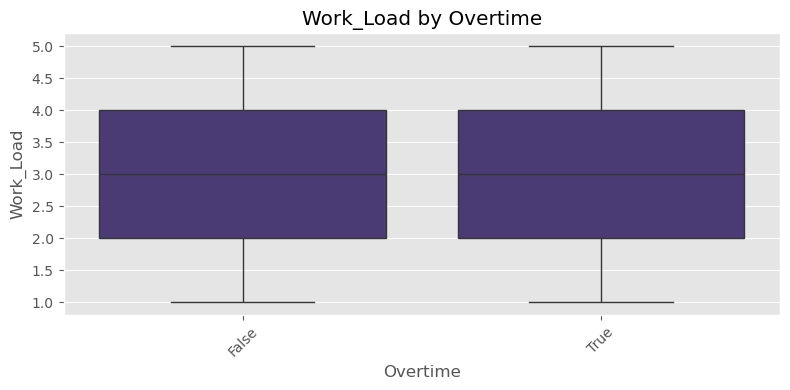

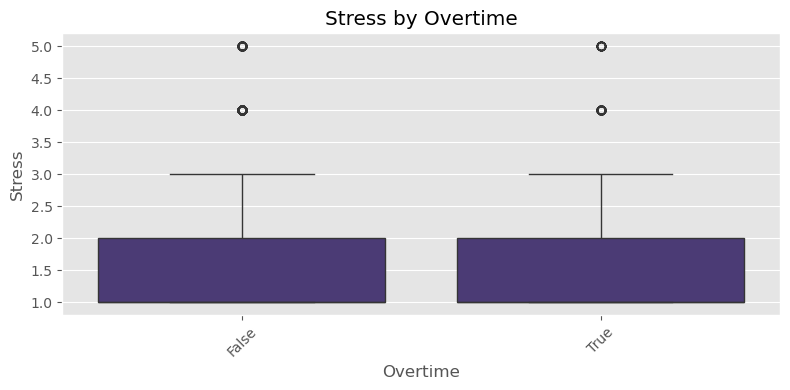

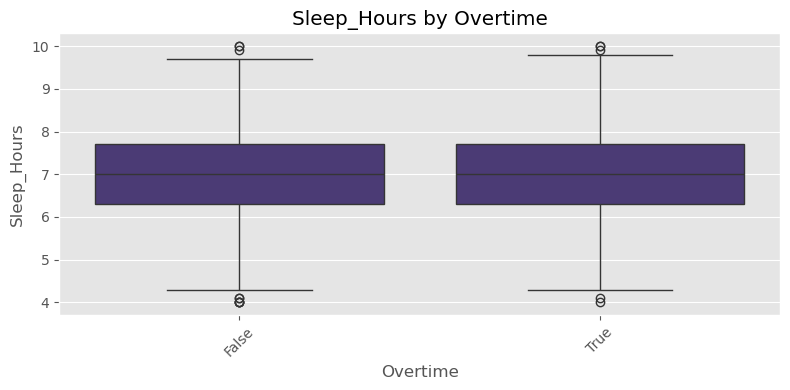

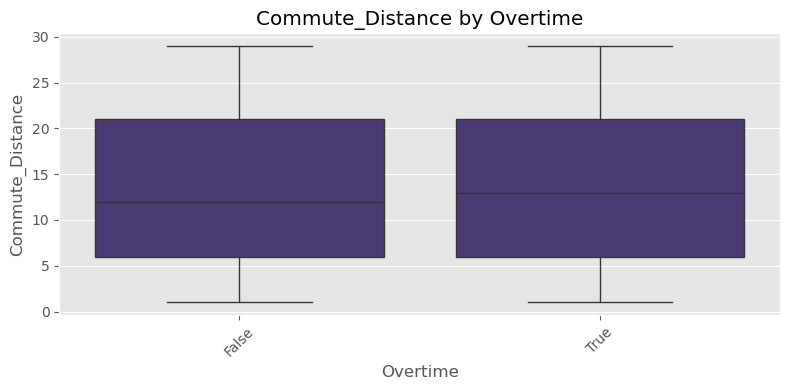

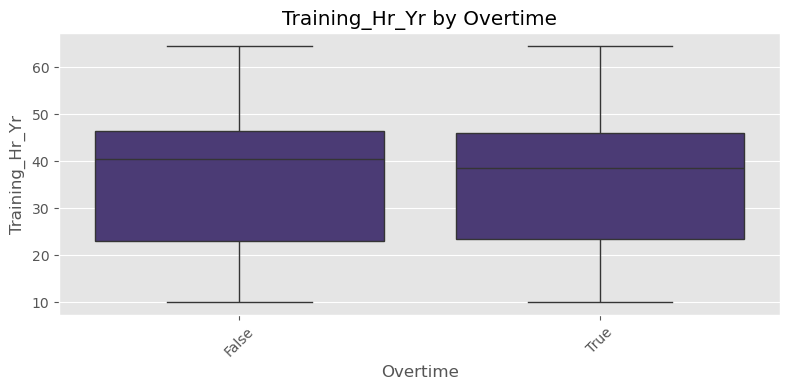

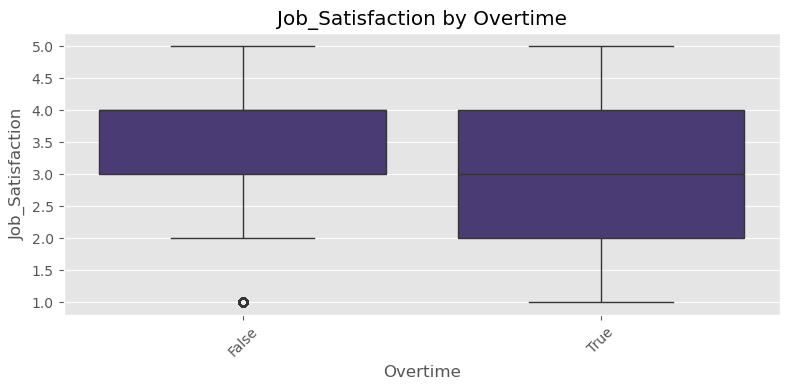

In [380]:
categorical_cols = ["Gender", "Marital_Status", "Department", "Employement_Type", "Commute_Mode", "Edu_Level", "Overtime"]
continuous_cols = ["Age", "Experience", "Physical_Activity_Hr", "Work_Env_Rating", "Work_Load", 
                   "Stress", "Sleep_Hours", "Commute_Distance", "Training_Hr_Yr", "Job_Satisfaction"]
for cat in categorical_cols:
    for con in continuous_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[cat], y=df[con])
        plt.title(f"{con} by {cat}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


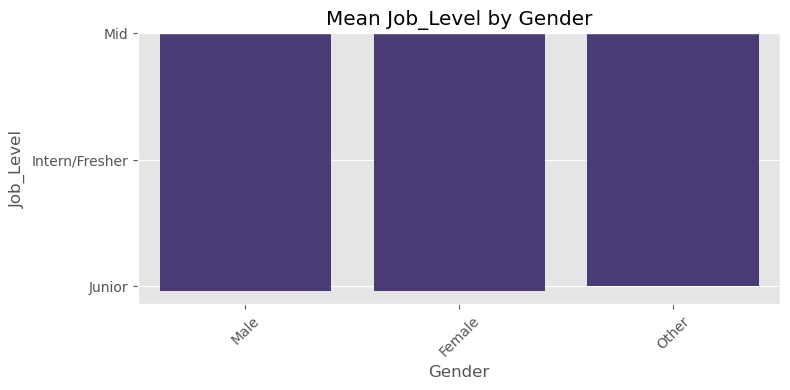

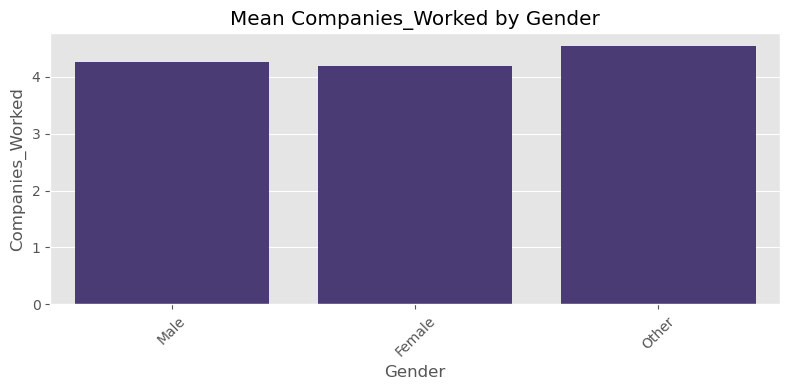

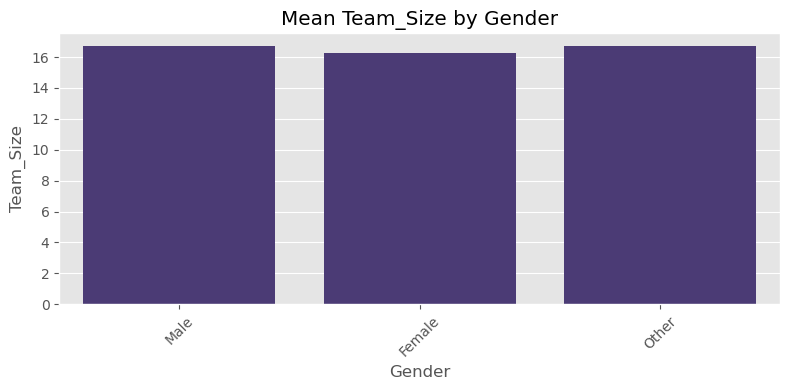

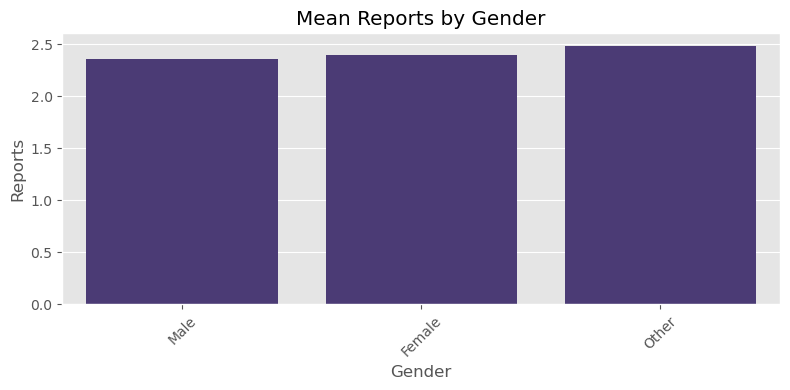

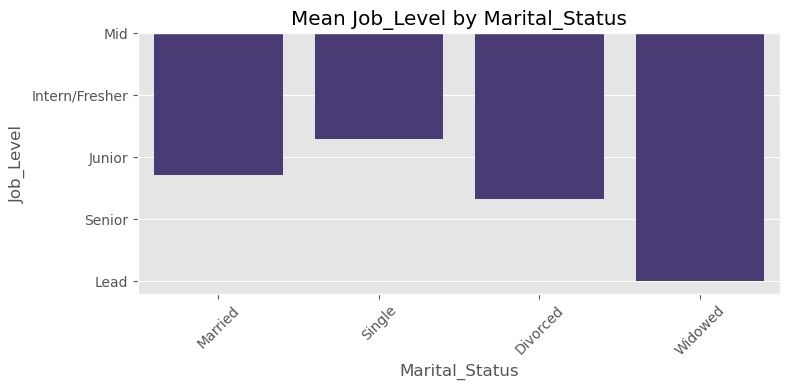

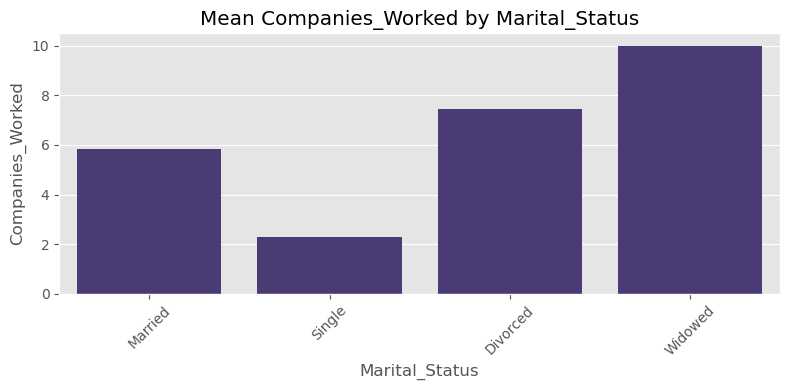

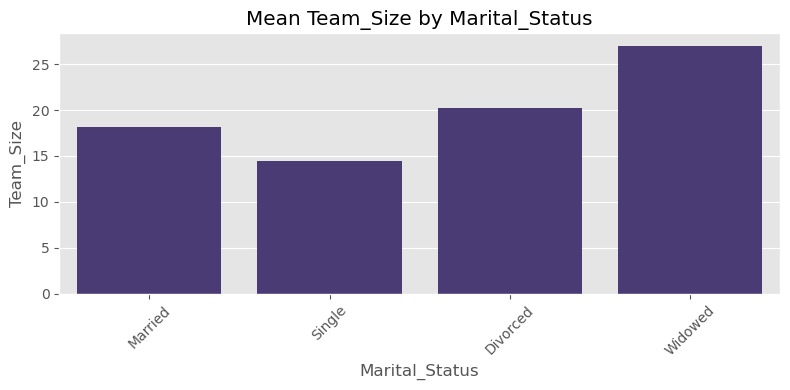

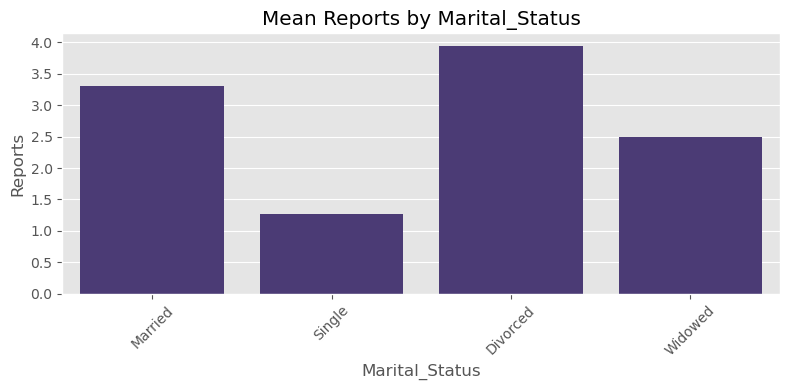

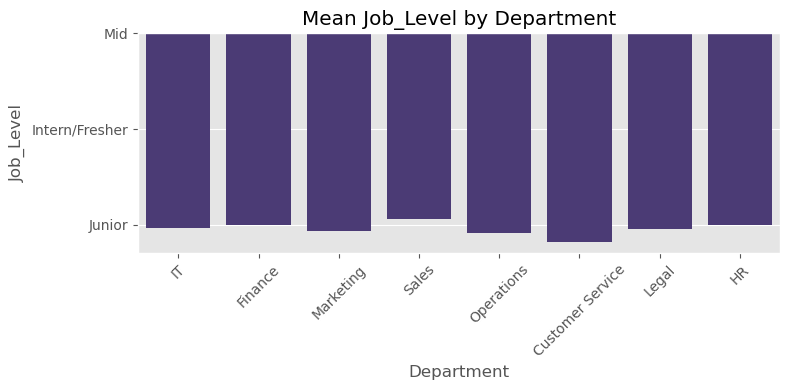

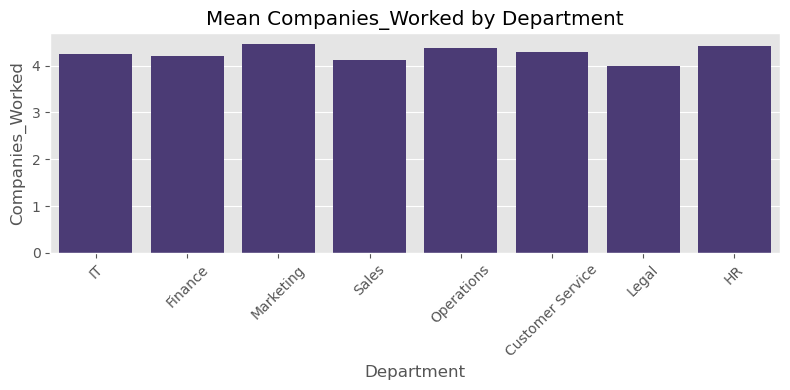

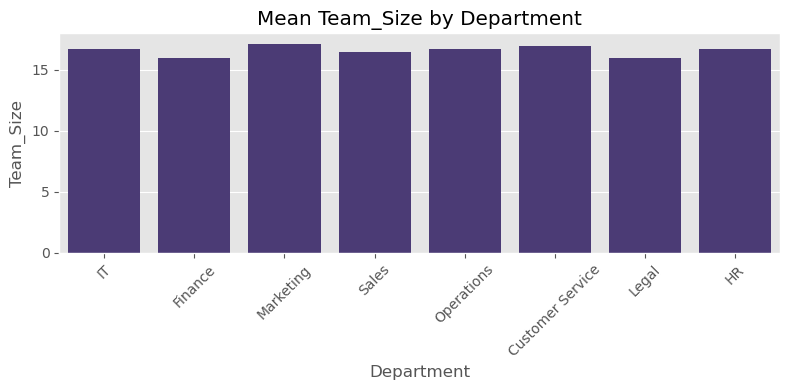

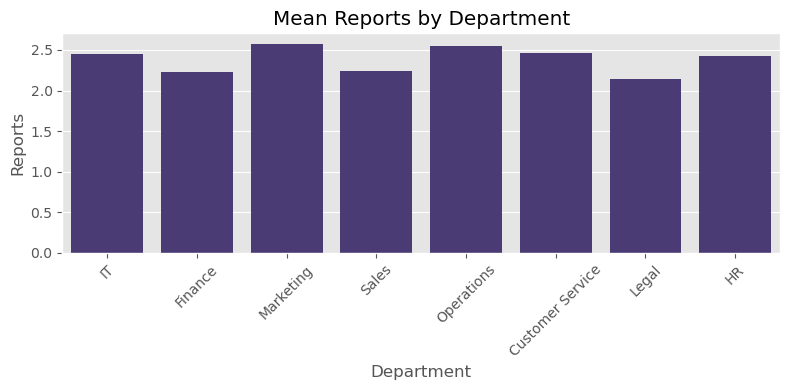

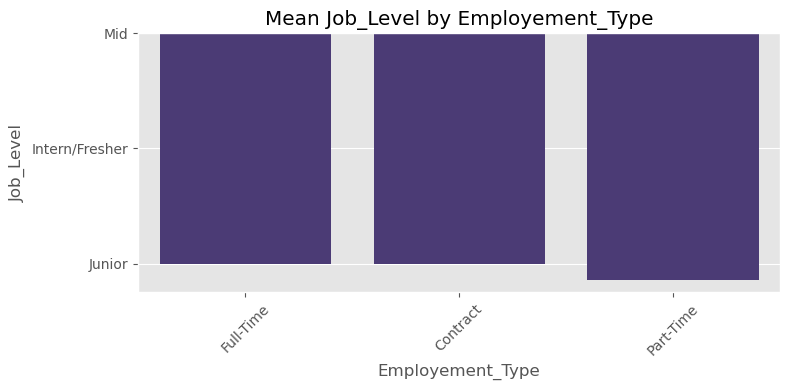

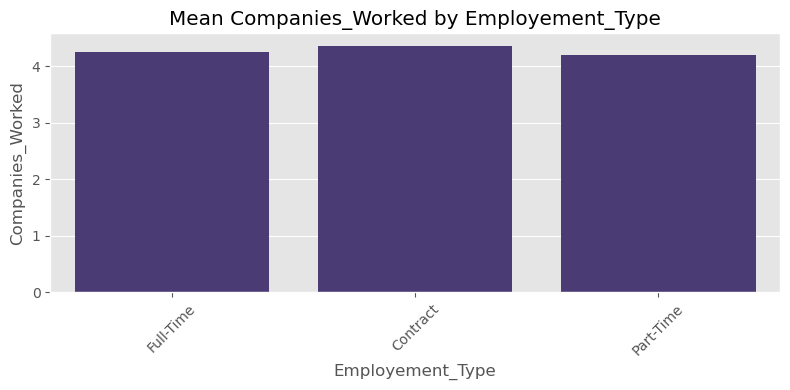

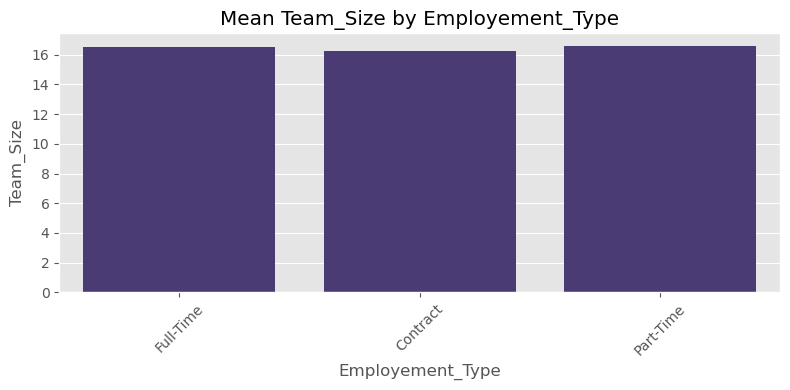

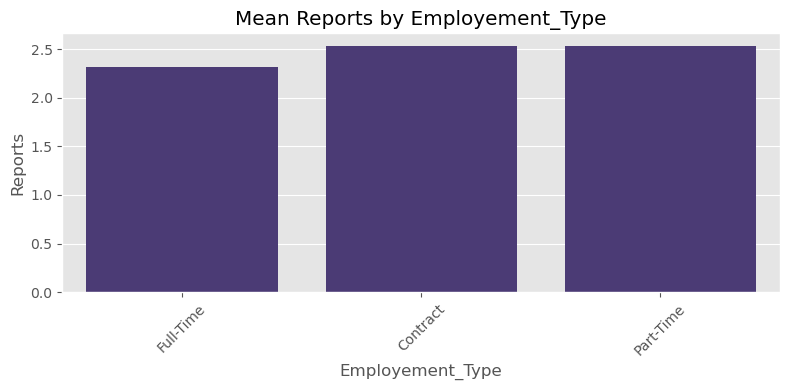

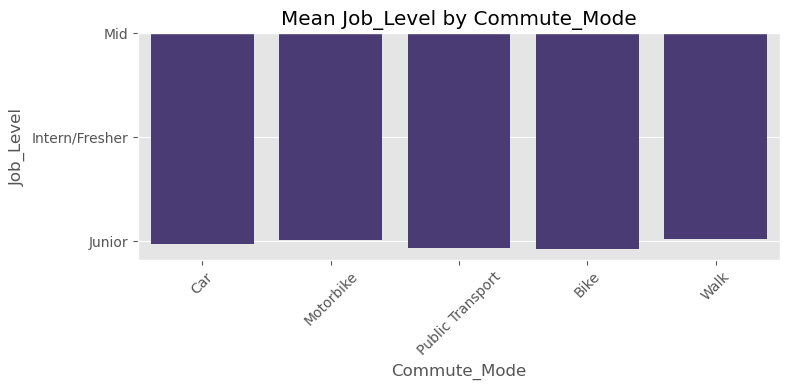

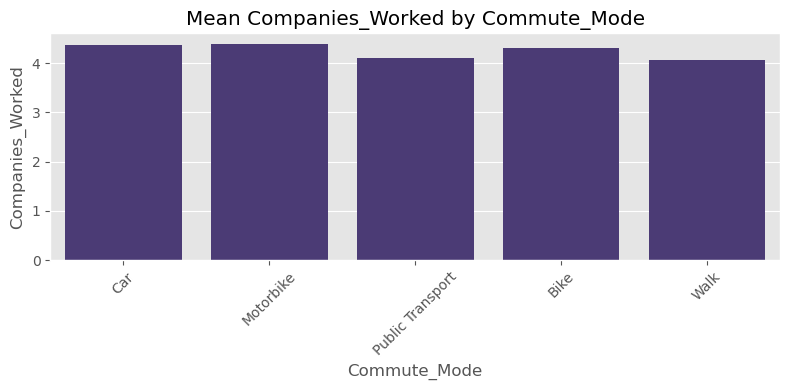

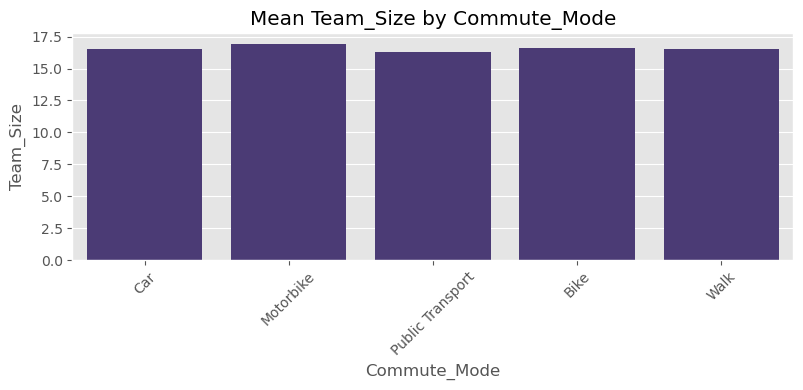

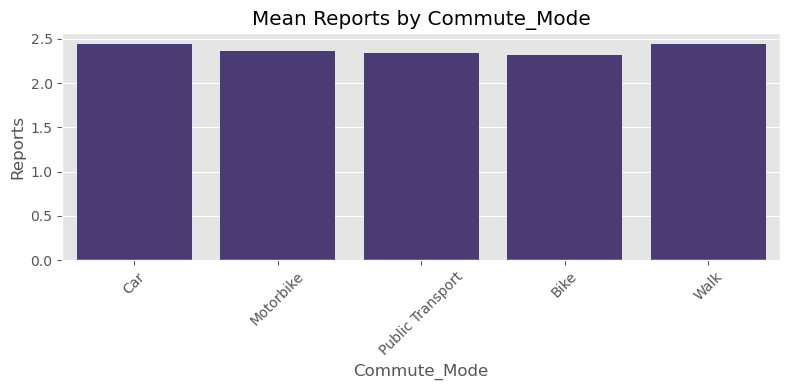

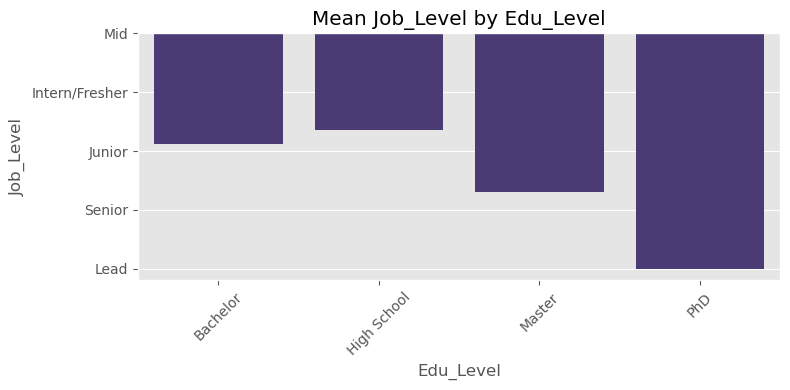

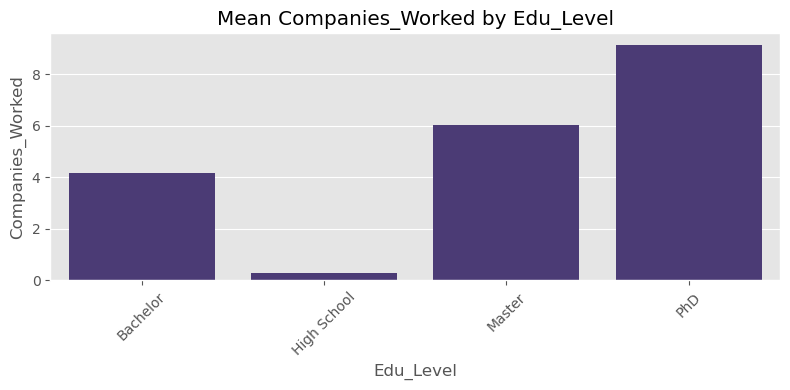

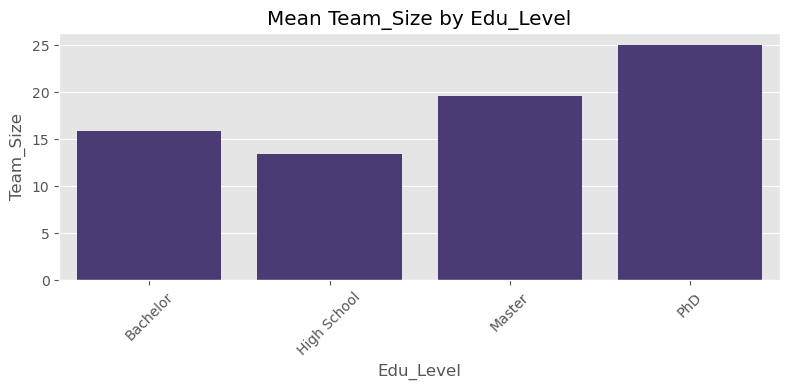

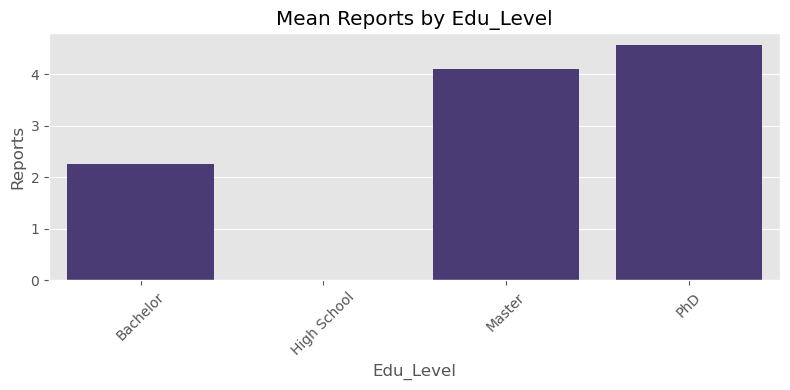

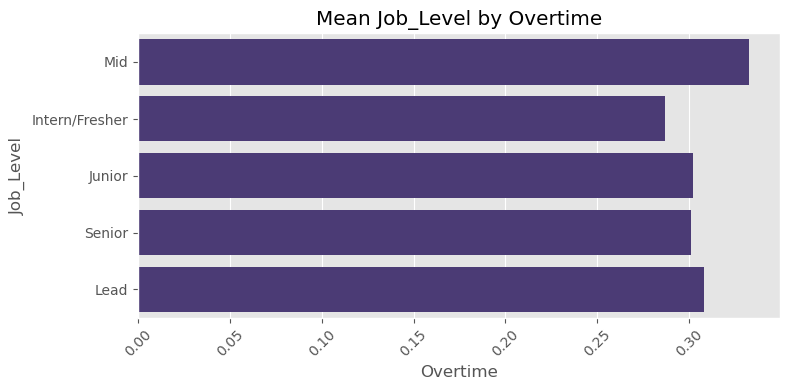

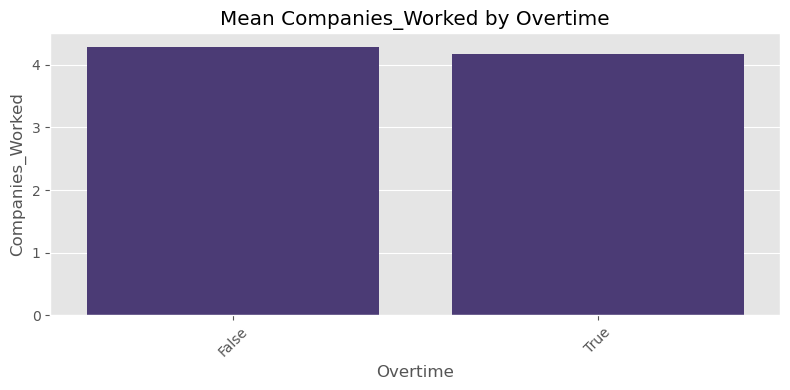

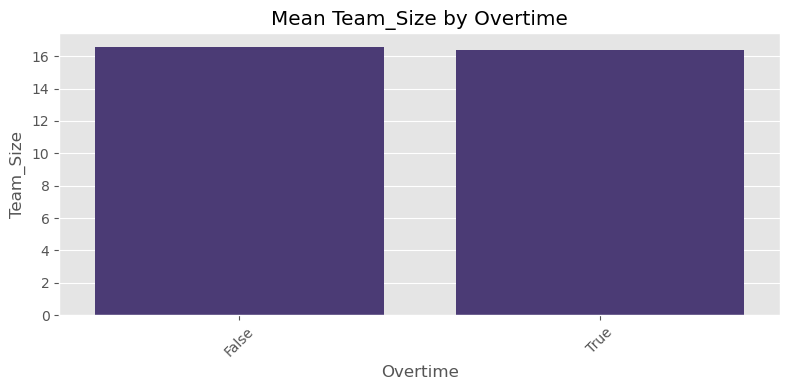

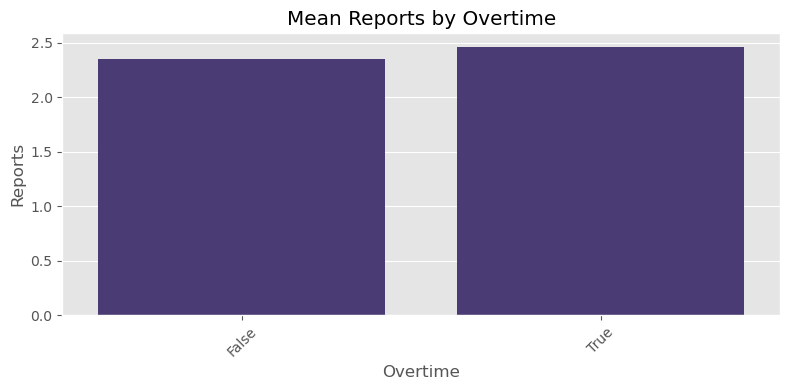

In [381]:
categorical_cols = ["Gender", "Marital_Status", "Department", "Employement_Type", 
                    "Commute_Mode", "Edu_Level", "Overtime"]

count_cols = ["Job_Level", "Companies_Worked", "Team_Size", "Reports"]

# Loop through all combinations
for cat_col in categorical_cols:
    for count_col in count_cols:
        plt.figure(figsize=(8, 4))
        sns.barplot(x=cat_col, y=count_col, data=df, estimator='mean', errorbar=None)
        plt.title(f'Mean {count_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


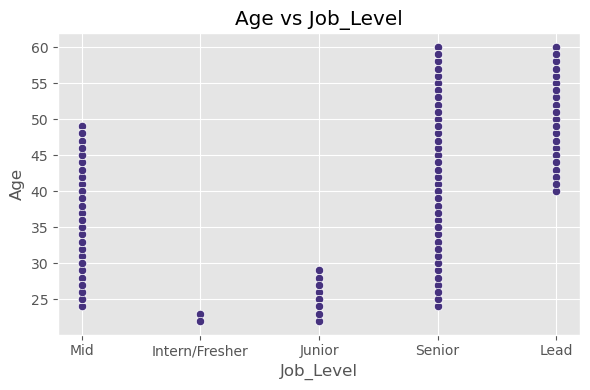

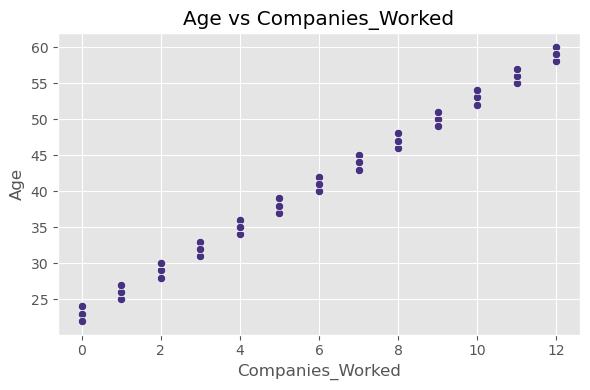

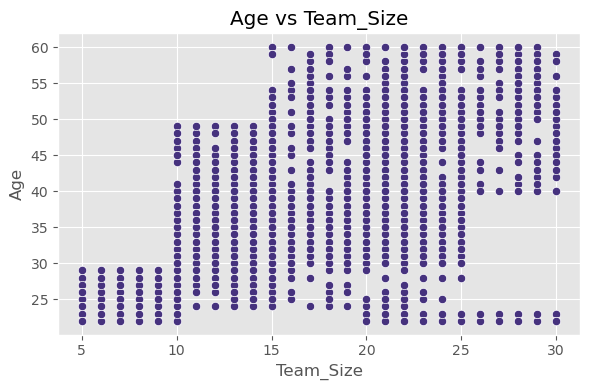

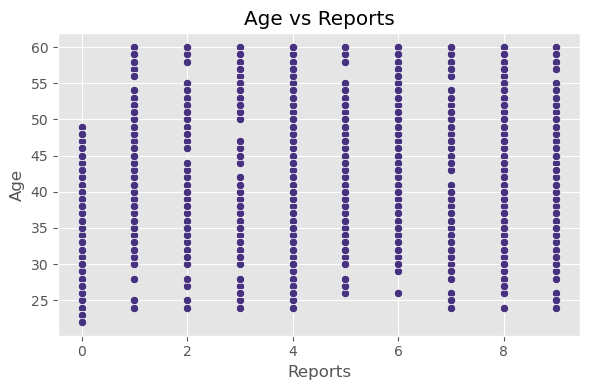

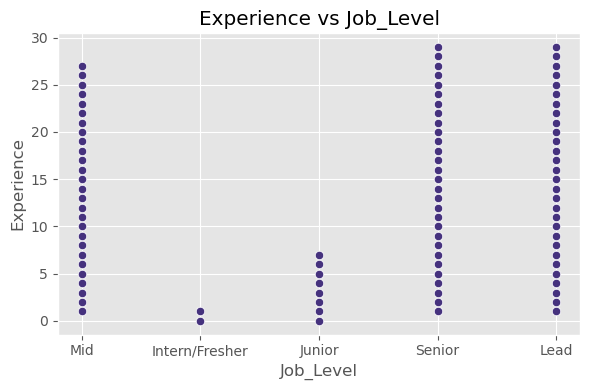

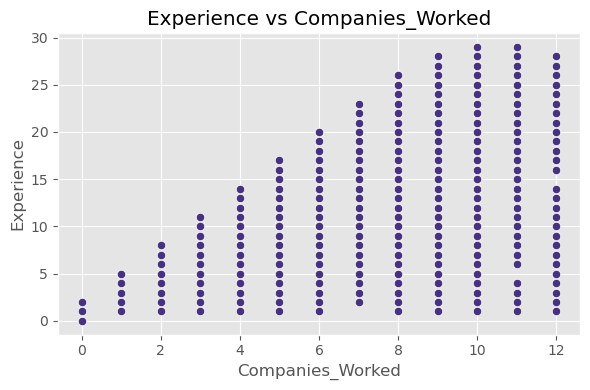

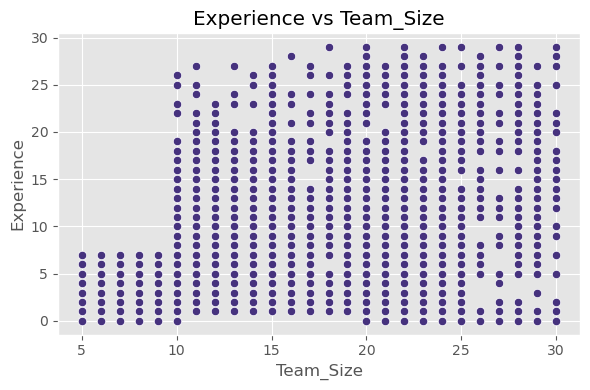

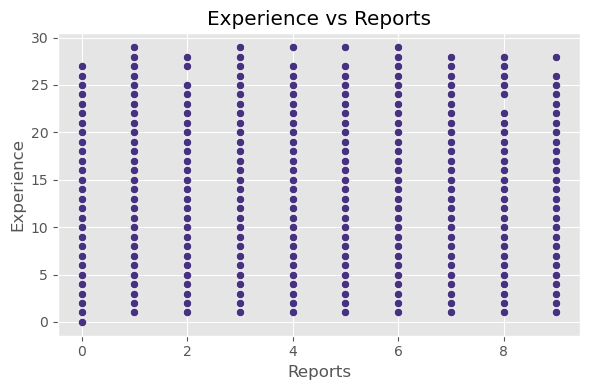

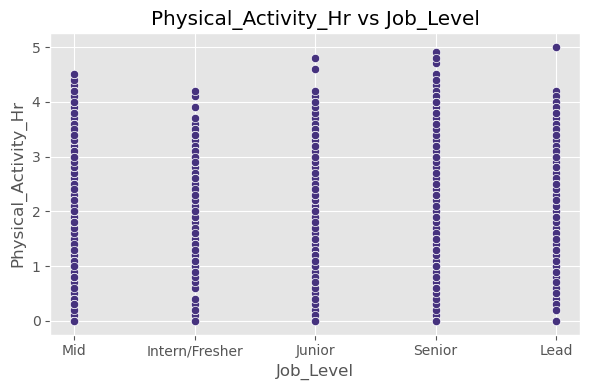

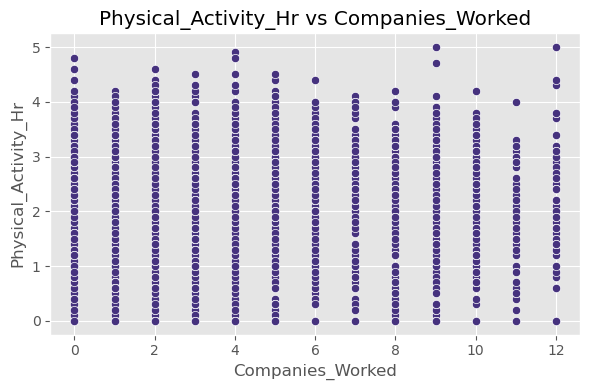

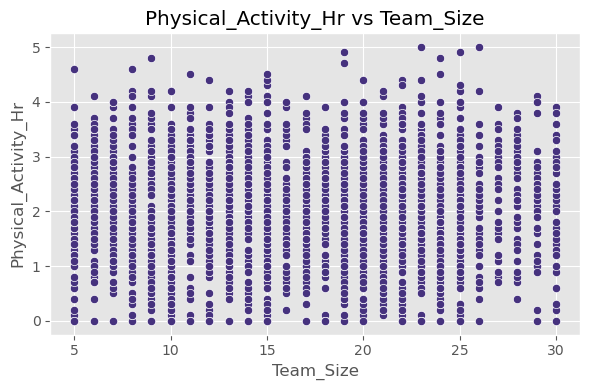

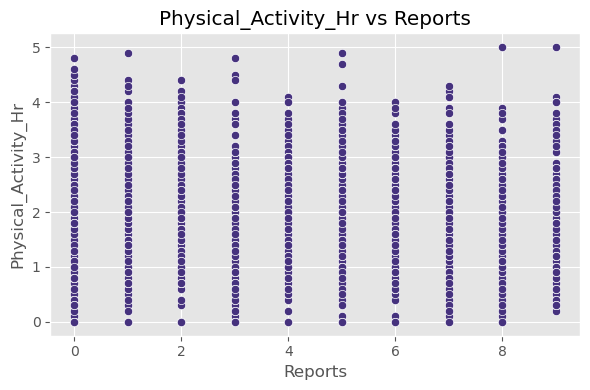

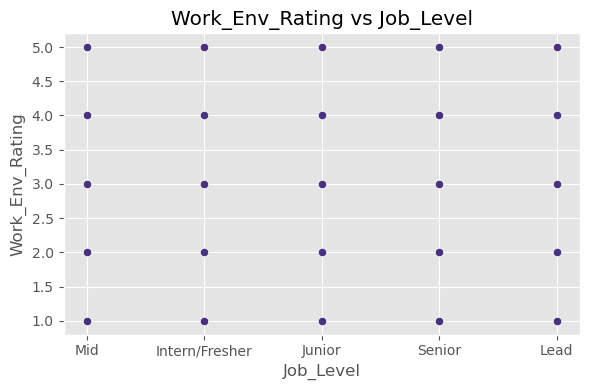

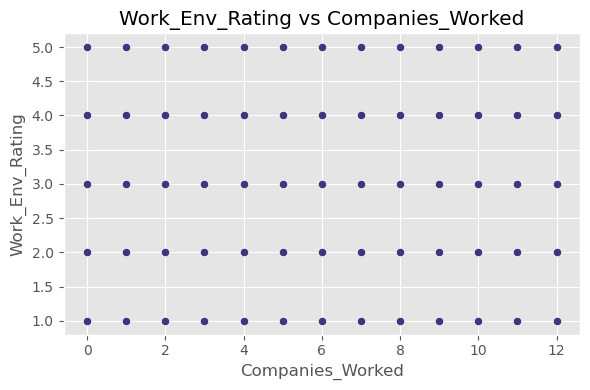

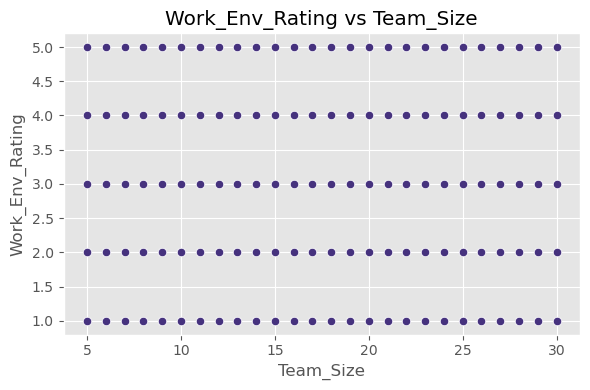

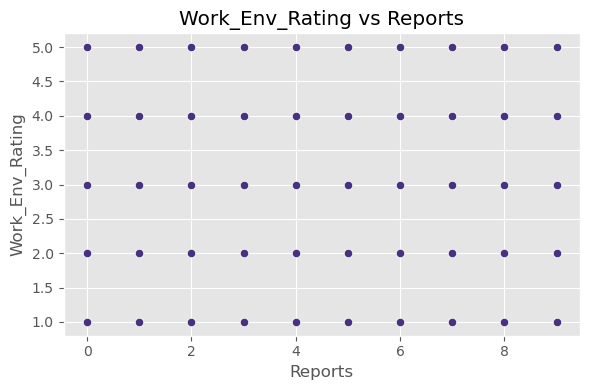

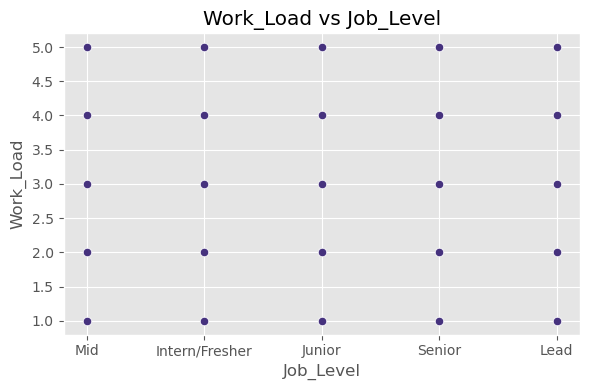

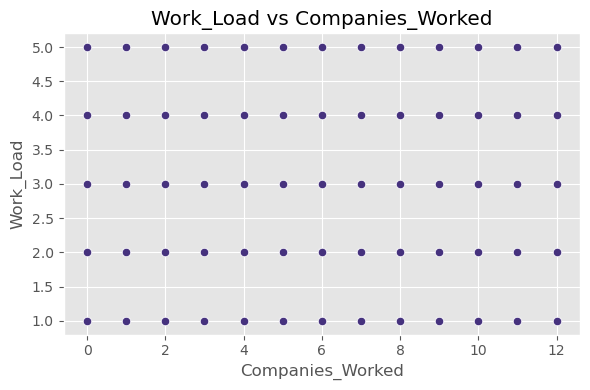

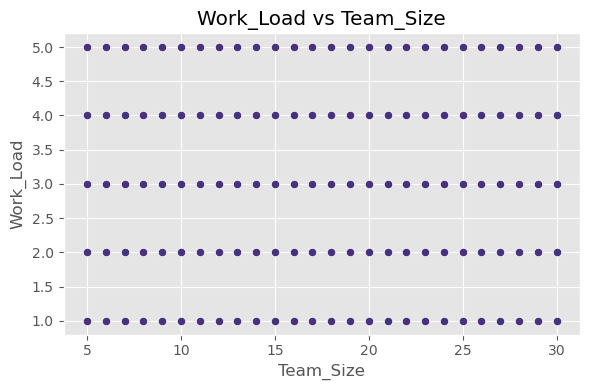

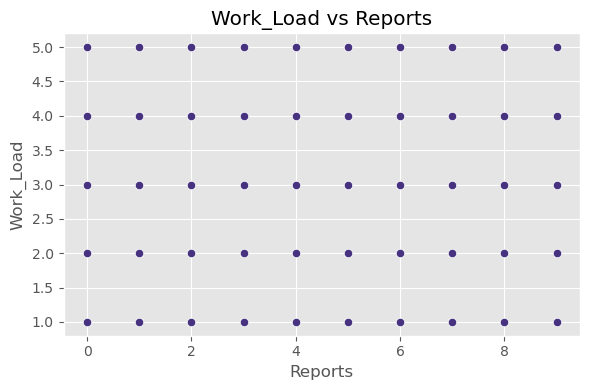

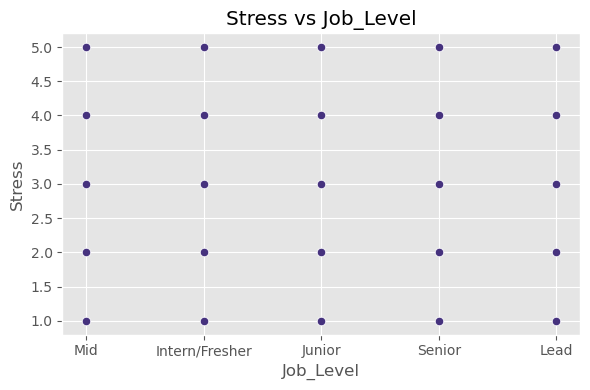

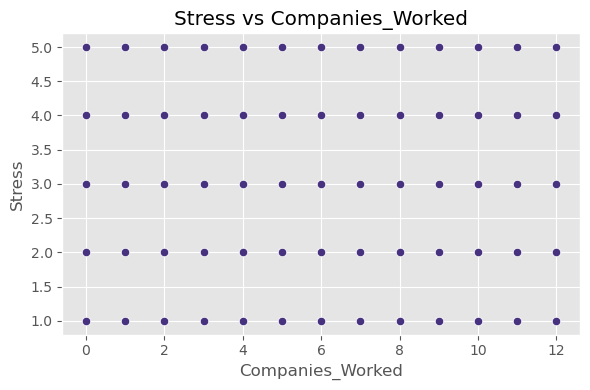

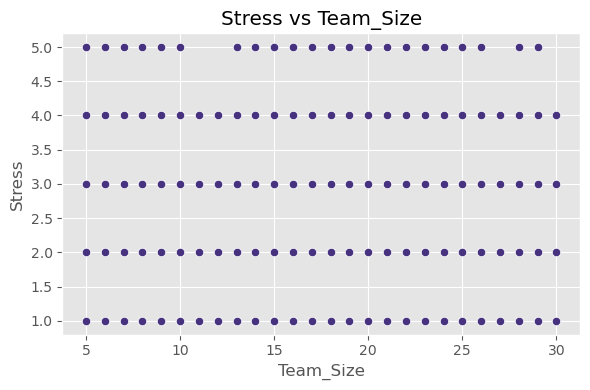

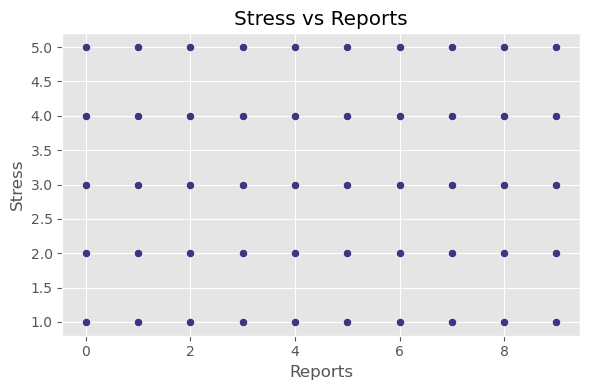

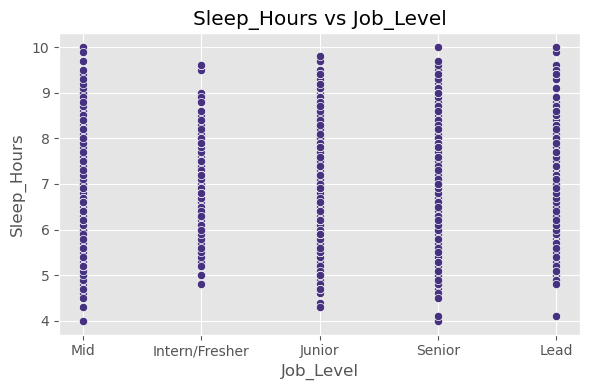

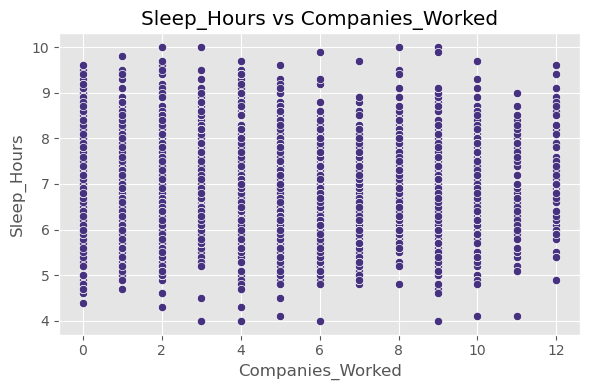

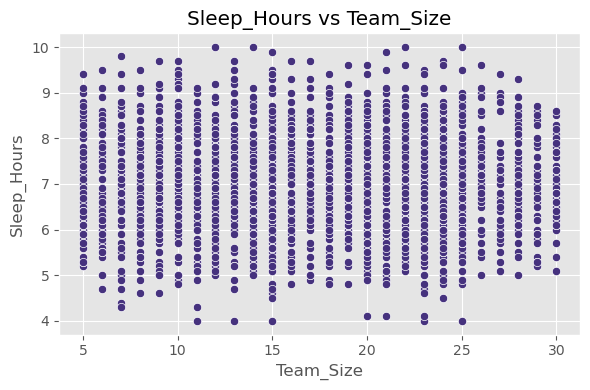

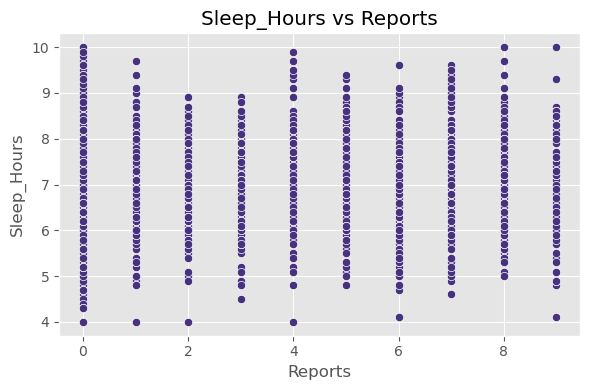

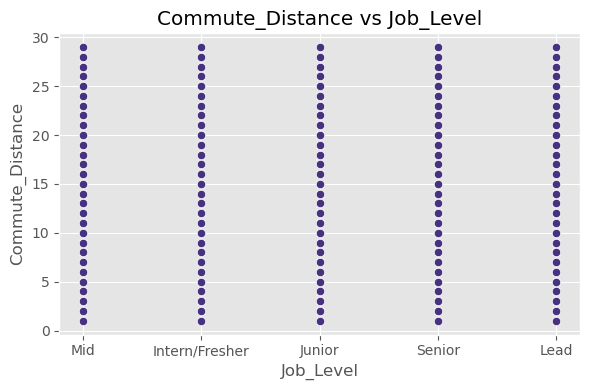

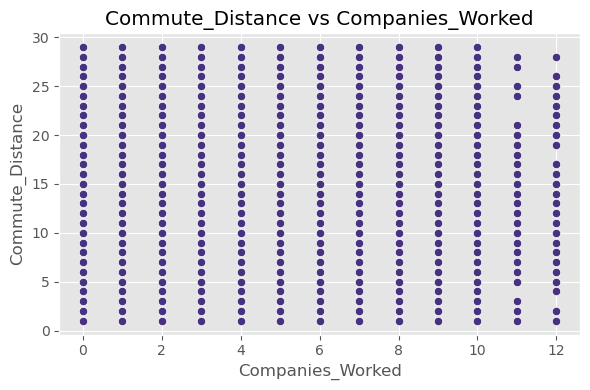

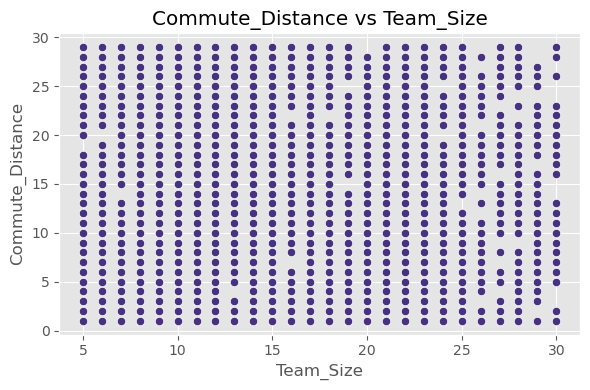

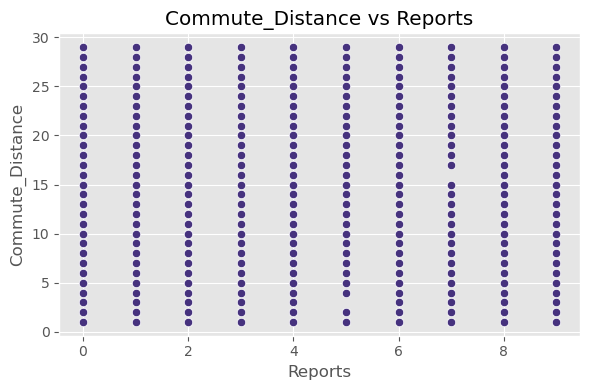

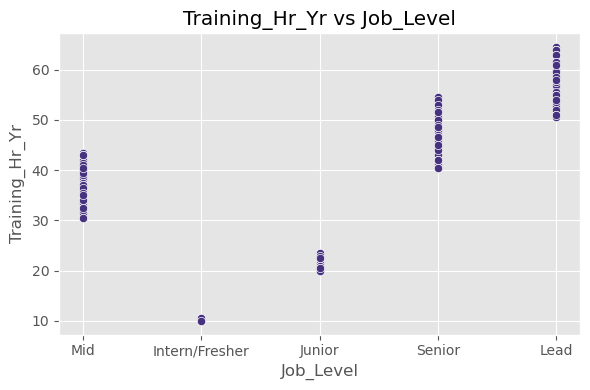

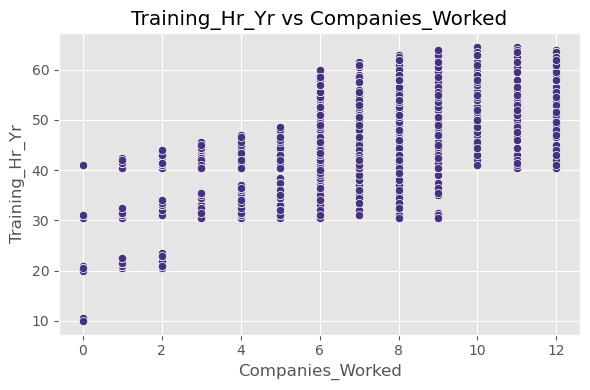

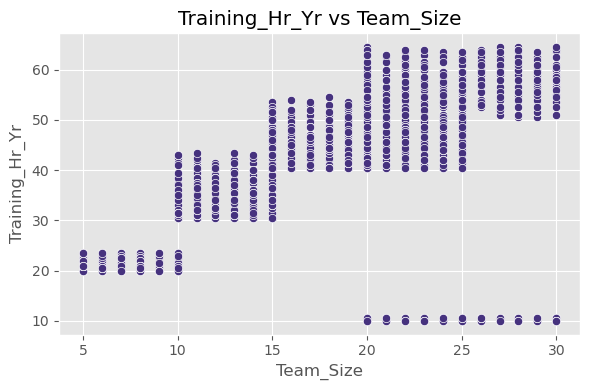

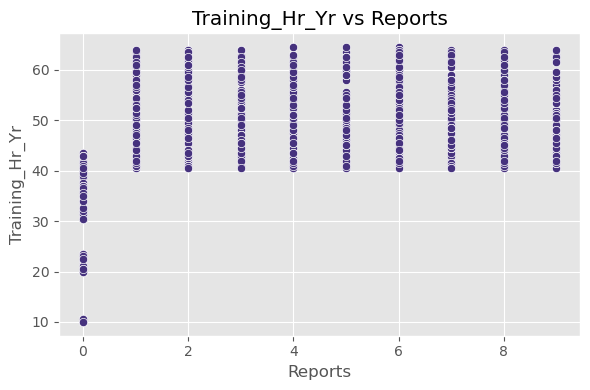

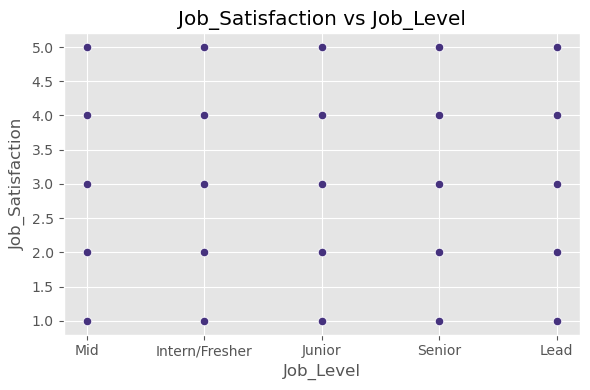

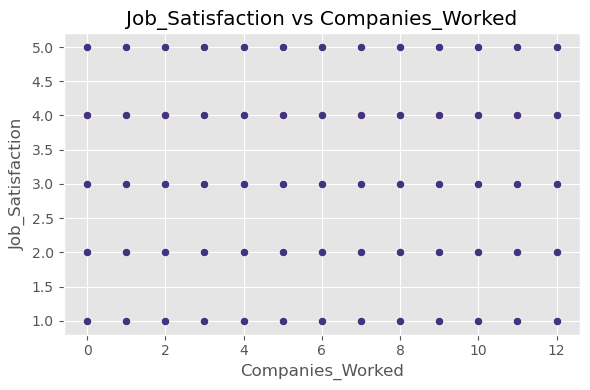

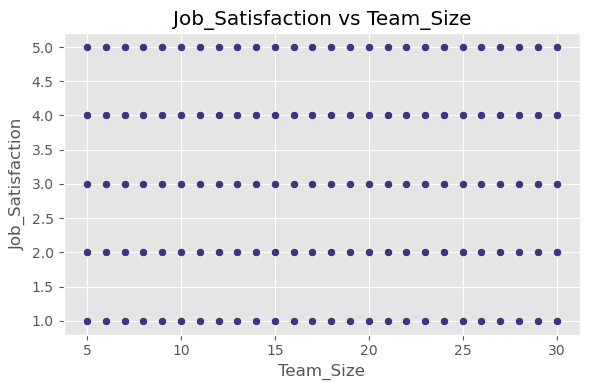

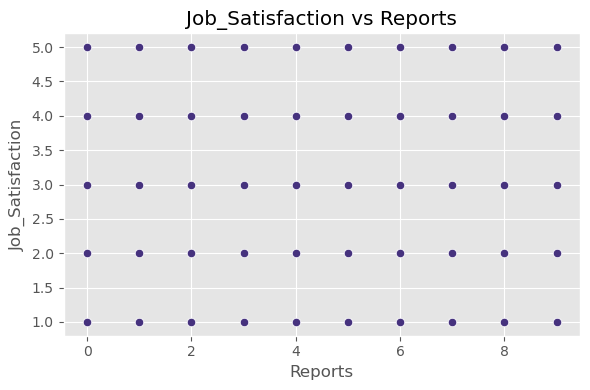

In [382]:
continuous_cols = ["Age", "Experience", "Physical_Activity_Hr", "Work_Env_Rating",
                   "Work_Load", "Stress", "Sleep_Hours", "Commute_Distance",
                   "Training_Hr_Yr", "Job_Satisfaction"]

count_cols = ["Job_Level", "Companies_Worked", "Team_Size", "Reports"]

for cont in continuous_cols:
    for count in count_cols:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=count, y=cont, data=df)
        plt.title(f'{cont} vs {count}')
        plt.tight_layout()
        plt.show()


In [ ]:
continous = ["Age", "Experience", "Physical_Activity_Hr", "Work_Env_Rating", "Work_Load", "Stress", "Sleep_Hours", "Commute_Distance", "Training_Hr_Yr", "Job_Satisfaction"]
count = ["Job_Level", "Companies_Worked", "Team_Size", "Reports"]
categorical = ["Gender", "Marital_Status", "Department", "Employement_Type", "Commute_Mode","Edu_Level", "Overtime"]

In [383]:
import itertools

In [384]:
count_cols = ['Job_Level', 'Companies_Worked', 'Team_Size', 'Reports']

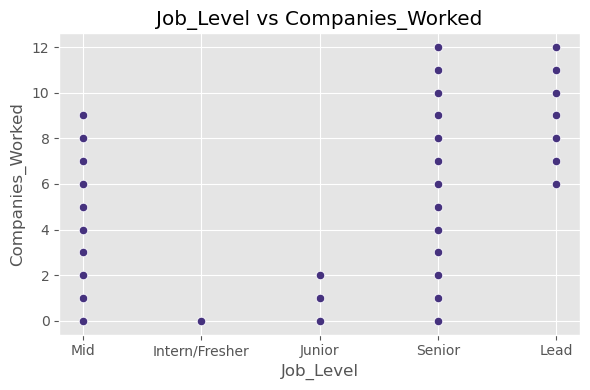

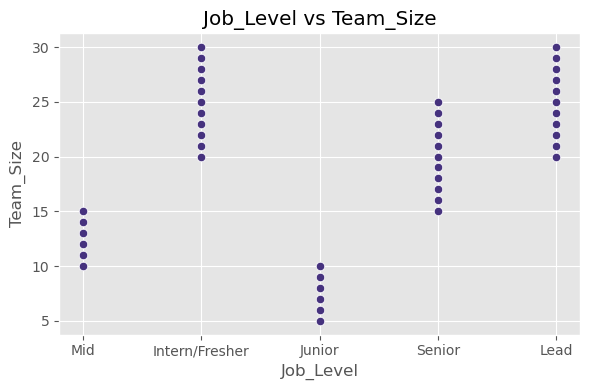

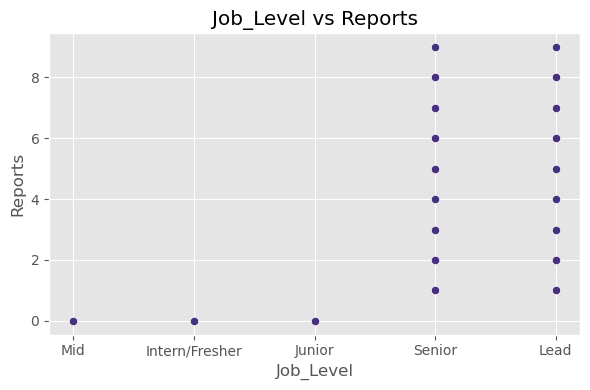

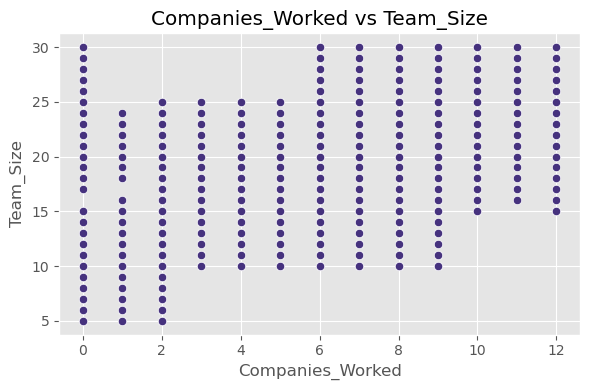

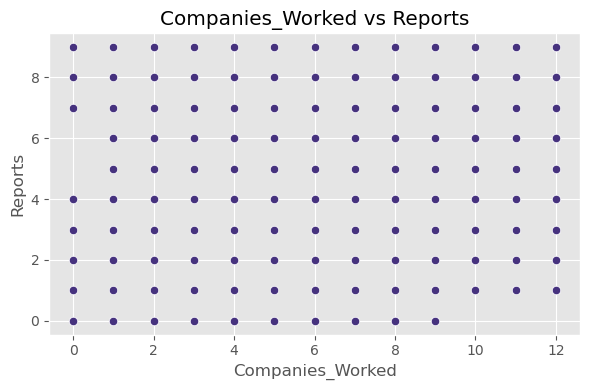

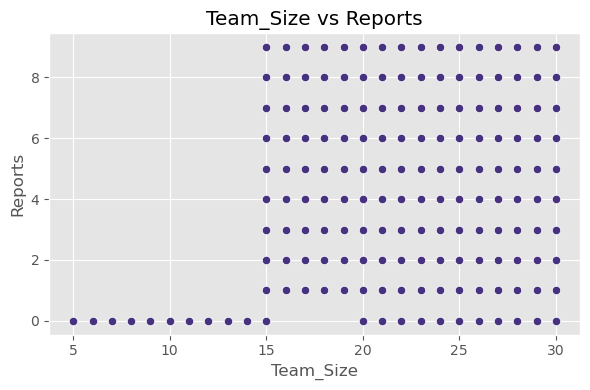

In [385]:
count_pairs = list(itertools.combinations(count_cols, 2))
for x, y in count_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'{x} vs {y}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### *Multivariate analysis*

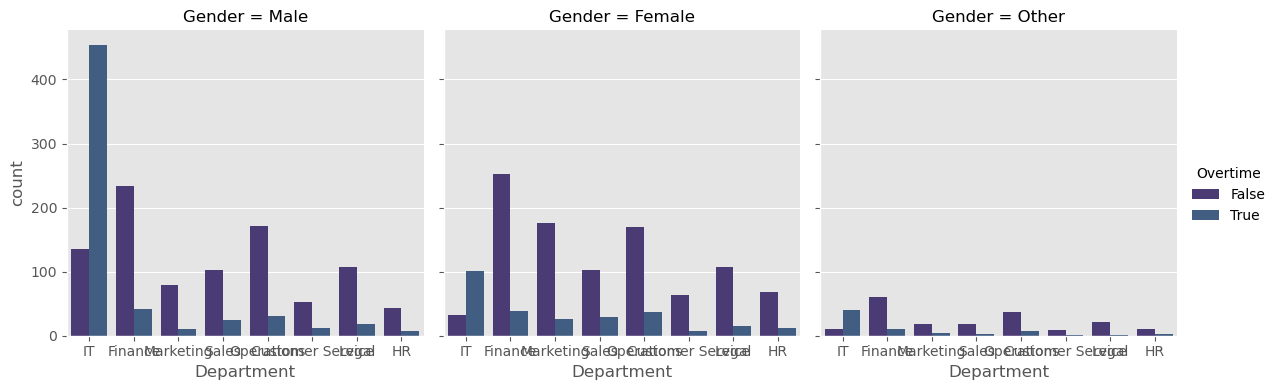

In [393]:
# 173

# How does Overtime vary across Department and Gender?
sns.catplot(x='Department', hue='Overtime', col='Gender',
            kind='count', data=df, height=4, aspect=1)

- The IT department has the highest number of male employees, with a majority working overtime.
- Female employees are more evenly spread across departments, with significantly fewer working overtime.
- Employees identifying as "Other" are underrepresented across all departments, with minimal overtime involvement.

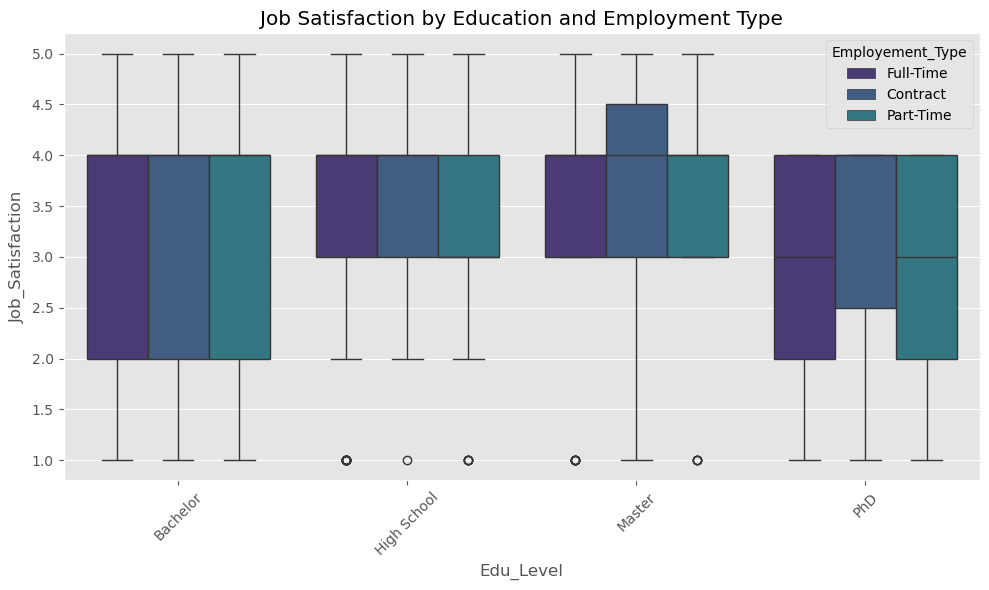

In [395]:
# 174

# How does Job_Satisfaction vary across Edu_Level and Employement_Type?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Edu_Level', y='Job_Satisfaction', hue='Employement_Type', data=df)
plt.title('Job Satisfaction by Education and Employment Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Master’s degree holders generally report the highest job satisfaction, especially those on contract or full-time roles.
- PhD holders show the widest variability in satisfaction, with many reporting lower satisfaction, regardless of employment type.
- Job satisfaction levels for Bachelor's and High School graduates are similar across employment types, with a median around 3–4.

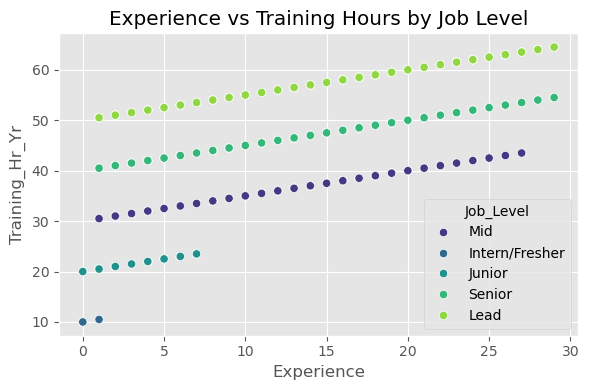

In [397]:
# 175

# What’s the relationship between Experience and Training_Hr_Yr, based on Job_Level?
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Experience', y='Training_Hr_Yr', hue='Job_Level', palette='viridis')
plt.title('Experience vs Training Hours by Job Level')
plt.tight_layout()
plt.show()

- Training hours increase with experience across all job levels, indicating continuous learning over time.
- Lead and Senior employees receive the highest training hours, showing a strong focus on upskilling at higher levels.
- Interns/Freshers receive the least training, and their training hours plateau early, reflecting limited time in early-stage roles.

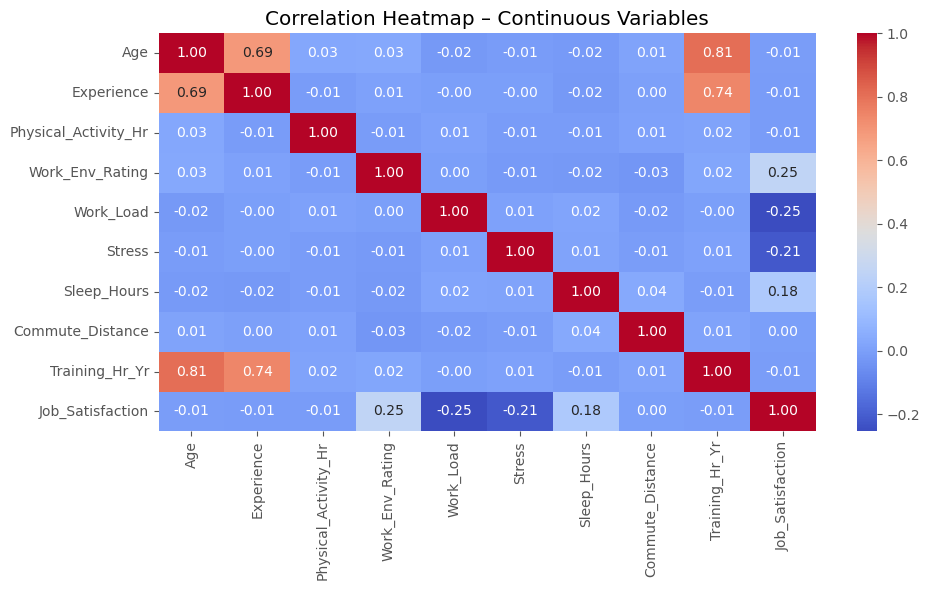

In [399]:
# 176

# Which numerical features are most correlated with Stress and Job_Satisfaction?
cont_cols = ['Age', 'Experience', 'Physical_Activity_Hr', 'Work_Env_Rating', 
             'Work_Load', 'Stress', 'Sleep_Hours', 'Commute_Distance', 
             'Training_Hr_Yr', 'Job_Satisfaction']

plt.figure(figsize=(10, 6))
sns.heatmap(df[cont_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap – Continuous Variables')
plt.tight_layout()
plt.show()

- Age and Training Hours (0.81), and Experience and Training Hours (0.74) have strong positive correlations, indicating that more experienced employees receive more training
- Job Satisfaction shows the strongest positive correlation with Work Environment Rating (0.25) and a negative correlation with Work Load (-0.25) and Stress (-0.21).
- Most other variables show weak or no significant correlation with Job Satisfaction or each other, suggesting multiple independent influences.

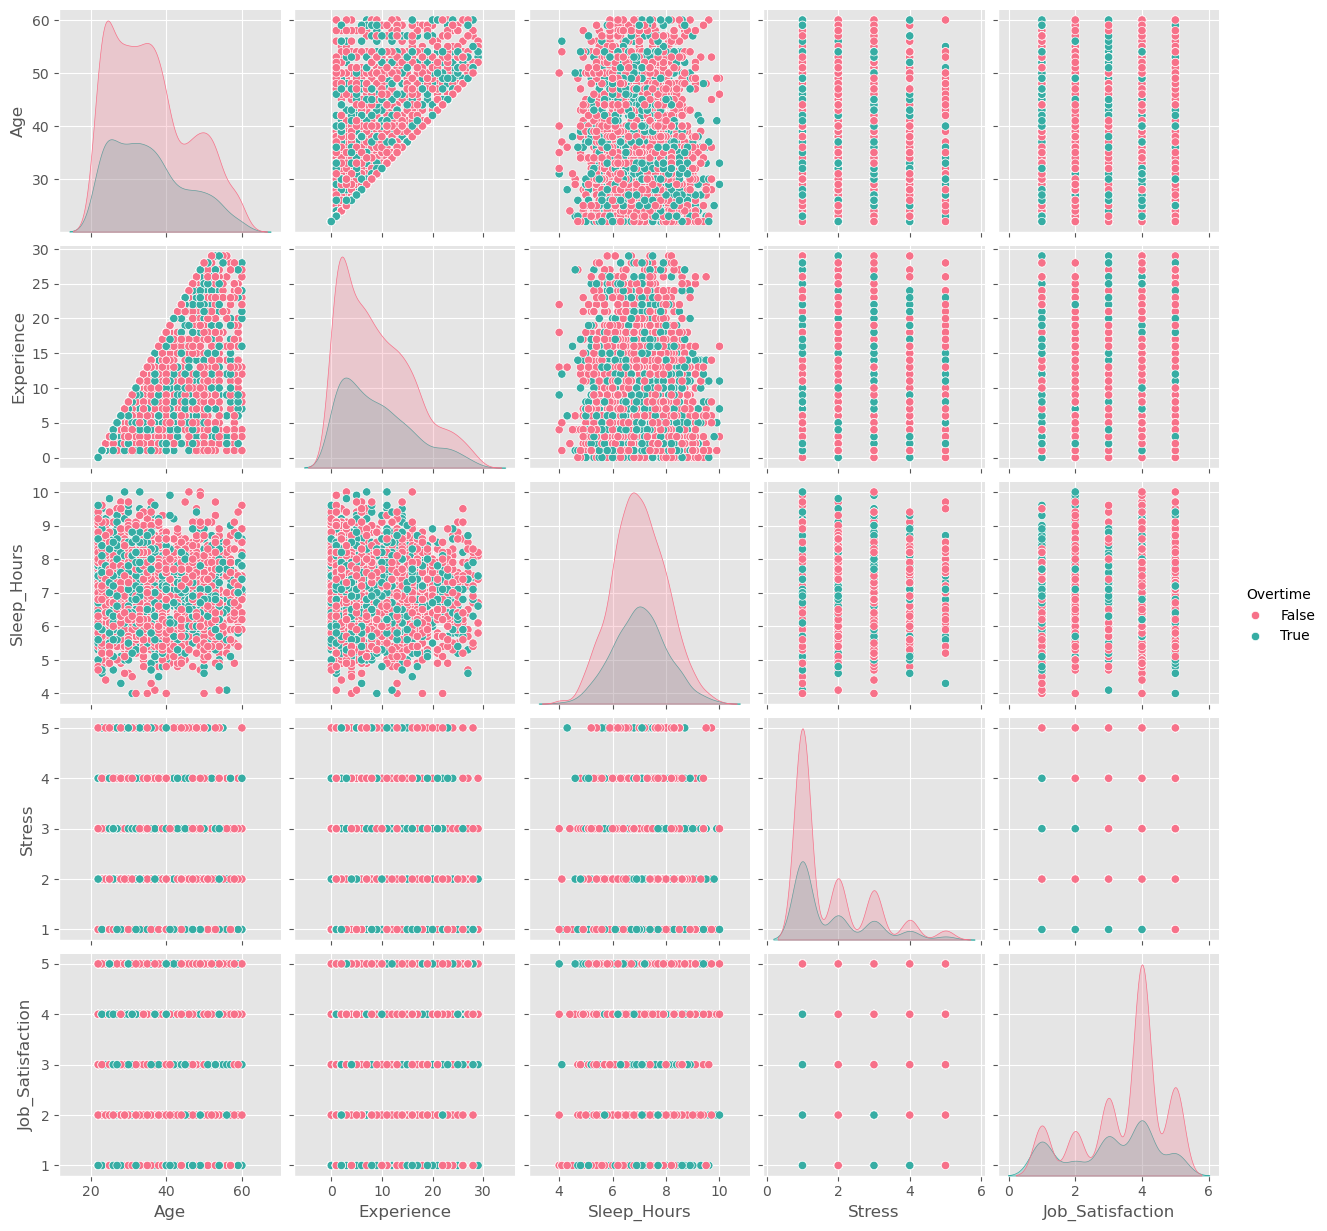

In [401]:
# 177

# What overall patterns exist among numerical variables, and do they differ by Overtime?
selected = ['Age', 'Experience', 'Sleep_Hours', 'Stress', 'Job_Satisfaction', 'Overtime']
sns.pairplot(df[selected], hue='Overtime', diag_kind='kde', palette='husl')
plt.show()

- Employees doing overtime (green dots) tend to have slightly higher stress levels and lower sleep hours compared to those who don’t.
- Age and Experience show a strong positive linear relationship, as expected.
- Job Satisfaction appears evenly spread across stress and sleep levels, suggesting no strong direct visual relationship in this subset alone.

## Key findings from the analysis

1. **Job Satisfaction Influencers**
   - Positively correlated with Work Environment Rating and Sleep Hours.
   - Negatively impacted by Work Load and Stress.
   - Employees with higher education (e.g., Masters) show relatively higher satisfaction.
   - PhD holders and overtime workers appear more stressed with lower satisfaction.

2. Training and Experience
   - Training hours increase with job level and experience, but training alone doesn’t strongly influence satisfaction.
   - Junior staff receive the least training and may feel underprepared.

3. Overtime Impact
   - Overtime workers tend to sleep less and report higher stress, both of which correlate negatively with job satisfaction.
   - No clear satisfaction advantage seen for those working overtime.
     
4. Age and Experience
   - Older and more experienced employees are not necessarily more satisfied, suggesting tenure doesn't guarantee engagement.

### Sujjestions

1. Reduce mandatory overtime and encourage better work-hour policies.
2. Promote adequate rest and sleep, possibly through wellness programs.
3. Focus on team culture, ergonomics, and psychological safety to boost Work Environment Rating.
4. Implement workload management systems and provide mental health support.
5. Regularly monitor departments with high stress and attrition rates.
6. Offer more skill-building and career progression opportunities for junior and mid-level employees.
7. Align training with job satisfaction outcomes, not just tenure or level.
8. Perform departmental breakdowns of job satisfaction to identify localized issues
9. Deploy targeted interventions in departments with the highest dissatisfaction.

# Author - *Niranjan*